# 7506 - Trabajo práctico 1


##### Librerías

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
import scipy as sc
from sklearn.ensemble import IsolationForest
import sklearn as sk
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
#import dtreeviz.trees as dtreeviz
import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('datasets/properati_argentina_2021.csv')
df = complete_dataset.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [9]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

## Descripción de las columnas
- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


## Filtrado inicial del Dataset
Como trabajaremos con un universo acotado de propiedades, haremos una selección inicial de las publicaciones que nos interesa analizar:

Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento.

Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.

A continuación, consideraremos solo las que esten cotizadas en dolares.

Y finalmente, tomamos solo las que sean ventas

In [10]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

place_l2              place_l3 property_currency property_type  \
25      Capital Federal                   NaN               USD          Casa   
42      Capital Federal                  Boca               USD  Departamento   
43      Capital Federal                  Boca               USD  Departamento   
49      Capital Federal                  Once               USD  Departamento   
51      Capital Federal                 Boedo               USD            PH   
...                 ...                   ...               ...           ...   
460072  Capital Federal      Villa del Parque               USD  Departamento   
460073  Capital Federal      Villa del Parque               USD  Departamento   
460074  Capital Federal      Villa del Parque               USD  Departamento   
460075  Capital Federal      Villa del Parque               USD  Departamento   
460090  Capital Federal  Centro / Microcentro               USD  Departamento   

       operation  
25         Venta  
42         Venta  
43         Venta  
49         Venta  
51         Venta  
...          ...  
460072     Venta  
460073     Venta  
460074     Venta  
460075     Venta  
460090     Venta  

[94249 rows x 5 columns]

A partir de aquí trabajaremos con el dataset filtrado (`ds_filtrado`)

Analizando los tipos de dato de los campos:
- Hay 3 campos de fecha, evaluaremos más adelante como tratarlos.
- Tenemos latitud y longitd en su formato correcto
- Hay una variable place_l6 que no debería ser un número, también analizaremos a que se debe.
- La cantidad de habitaciones (rooms y bedrooms) quizás debería tener valores enteros.
- El precio tiene un tipo correcto

## Exploración Inicial

### Tipos de variable

In [11]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

In [12]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

### Fechas


In [13]:
ds_train[["start_date", "end_date", "created_on"]].isna().sum()

start_date    0
end_date      0
created_on    0
dtype: int64

In [14]:
ds_train["start_date"].value_counts()

2021-12-16    3707
2021-02-13    1715
2021-11-03     823
2021-08-03     672
2021-04-10     651
              ... 
2021-12-26      13
2021-01-02      11
2021-12-19       9
2021-10-24       8
2021-11-27       1
Name: start_date, Length: 365, dtype: int64

In [15]:
ds_train["end_date"].value_counts()

2021-06-05    10239
2022-01-27     7460
2022-02-09     6078
9999-12-31     4004
2021-03-01     1500
              ...  
2022-08-30        1
2021-01-04        1
2022-09-12        1
2022-01-24        1
2022-03-22        1
Name: end_date, Length: 602, dtype: int64

In [16]:
ds_train[ds_train.created_on != ds_train.start_date].shape

(0, 20)

Podemos ver que la columnas created_on y start_date siempre son iguales, descartaremos una de ellas más adelante.

In [17]:
ds_train["created_on"].value_counts()

2021-12-16    3707
2021-02-13    1715
2021-11-03     823
2021-08-03     672
2021-04-10     651
              ... 
2021-12-26      13
2021-01-02      11
2021-12-19       9
2021-10-24       8
2021-11-27       1
Name: created_on, Length: 365, dtype: int64

Hay un valor extraño en end_date, la fecha 9999-12-31, hay 285 apariciones de esta fecha

In [18]:
ds_train[ds_train.end_date == '9999-12-31']['start_date'].value_counts()

2021-02-09    111
2021-06-24    101
2021-06-30     59
2021-02-23     59
2021-02-17     56
             ... 
2021-12-13      1
2021-05-18      1
2021-05-11      1
2021-05-29      1
2021-04-02      1
Name: start_date, Length: 282, dtype: int64

Considerando que todas las fechas son de 2021, y que el dato que falta es el del fin de la publicación (es decir, la casa esta publicada) y a fines de preservar estos datos, traeremos a consideración la duración promedio de cada publicación, calcularemos ese promedio dejando fuera los 285 casos que presentan la fecha inválida.

Tomaremos para el cálculo las fechas convertidas a datetime.

In [19]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71395
mean     74 days 12:53:44.494712515
std      84 days 06:03:18.849720074
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

El promedio de la duración de las publicaciones es casi de 75 días, asumiremos que las publicaciones con la fecha invalida duraron lo mismo que el promedio y tomaremos como fecha final la fecha de inicio + 75 días.

In [20]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

111540    2022-04-20
167194    2021-06-05
398794    2021-03-01
233796    2021-04-16
303005    2021-09-20
             ...    
378238    2021-03-26
257084    2022-02-20
96778     2021-07-03
355464    2021-04-15
271492    2022-05-28
Name: end_date, Length: 75399, dtype: object

Finalmente, como todos los valores son formatos válidos de fecha, podemos convertir sin problemas.

### Conversion tipo de dato

In [21]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

## Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda

In [22]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74558.000000        66642.00000            71538.000000   
mean              2.821790            2.01319              111.397593   
std               1.421899            1.13486             1079.472018   
min               1.000000           -1.00000               10.000000   
quartile 1        2.000000            1.00000               45.000000   
median            3.000000            2.00000               65.000000   
quartile 3        4.000000            3.00000              104.000000   
max              40.000000           70.00000           137000.000000   
mode              3.000000            1.00000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72724.000000  72397.000000  72397.000000   
mean                       86.431852    -34.591453    -58.449708   
std                       751.878522      0.184049      0.288711   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.615917    -58.466522   
median                     58.000000    -34.595818    -58.439074   
quartile 3                 88.000000    -34.577413    -58.408917   
max                    123000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.264991e+05  
std           3.246245e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.439000e+05  
quartile 3    2.350000e+05  
max           2.140000e+07  
mode          1.100000e+05

## Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [23]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

La tabla muestra varias cosas:
- Hay 75399 propiedades habiendo filtrado solo las de Capital Federal, Venta y USD
- Hay 64617 departamentos, 7436 PHs y 3346 casas
- Hay 11547 propiedades en Palermo
- El id de la propiedad es único y no representa nada útil para nuestro procesamiento. Parecería pasar algo similar con el título, lo analizaremos en más detalle más adelante

## Análisis gráfico de las distribuciones de las variables

#### Distribución de fechas 

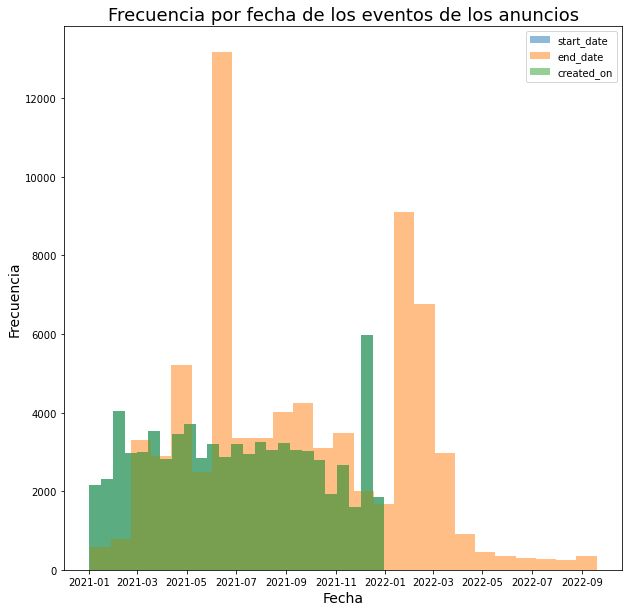

In [24]:

plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')


En este grafico se puede apreciar la distribución de las variables que hacen referencia a las fechas de creacion, alta y baja de los anuncios. Podemos ver que la distribución de las fechas de creación coincide con la distribución de las fechas de alta del anuncio, lo cual tiene sentido que así sea ya que la fecha de creación del anuncio es la primer versión del anuncio en ser dada de alta. 

###  Distribución de barrios
Primero vemos la cantidad de apariciones de los barrios por anuncio en la siguiente tabla:

In [25]:
ds_train['place_l3'].value_counts()

Palermo                 11439
Belgrano                 7140
Caballito                5761
Recoleta                 4952
Villa Urquiza            3723
Almagro                  3246
Nuñez                    2805
Villa Crespo             2546
Flores                   2506
Barrio Norte             2355
Balvanera                2052
Colegiales               1564
Villa Devoto             1524
Saavedra                 1512
Villa del Parque         1465
Puerto Madero            1199
San Telmo                1118
San Nicolás              1028
San Cristobal            1018
Retiro                   1002
Boedo                    1000
Barracas                  998
Floresta                  951
Monserrat                 910
Parque Chacabuco          857
Villa Pueyrredón          847
Coghlan                   784
Villa Luro                582
Chacarita                 576
Mataderos                 572
Villa Ortuzar             529
Liniers                   522
Parque Patricios          511
Villa Luga

Como podemos observar, hay demasiados barrios con pocas apariciones, por lo que nos centraremos en visualizar los primeras 25 barrios que mas aparecen. Agrupando al resto en una nueva categoria llamada "Otras".

In [26]:
top25 = ds_train['place_l3'].value_counts().head(25)

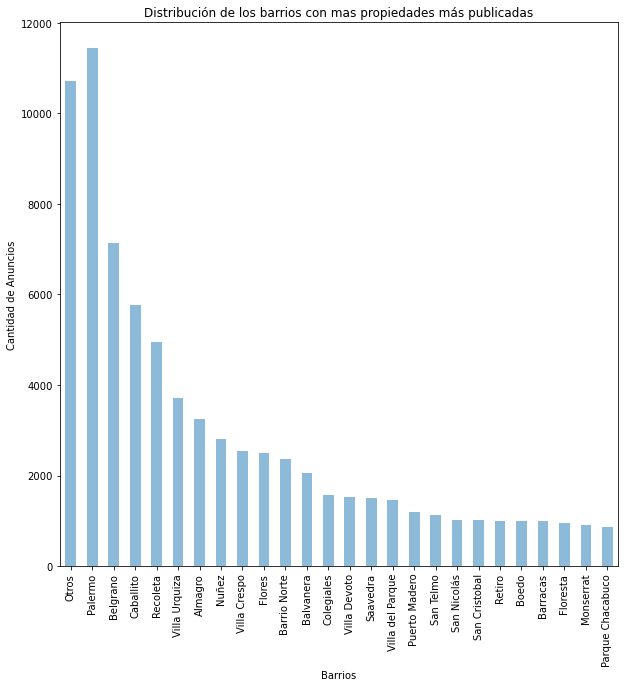

In [27]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

El barrio de Palermo es la que tiene mas propiedades publicadas

### Distribución de tipos de propiedad

Para analizar la distribucion de la variable property_type vamos a agrupar las apariciones en un grafico de barras por tipo de propiedad

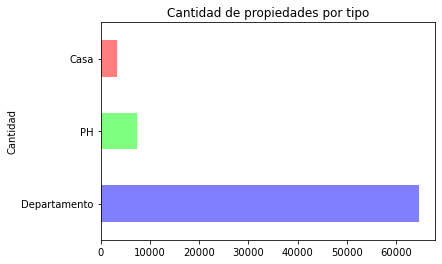

In [28]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

A simple vista se puede ver que la mayoria de publicaciones son de departamentos por una amplia diferencia

### Distribución de latitud y longitud
Para analizar la longitud y latitud vamos a utilizar un grafico de a pares ya que nos aporta más información sobre su distribución, pudiendo visualizar la localización de la propiedad. Adicionalmente se distinguirá por el tipo de propiedad.

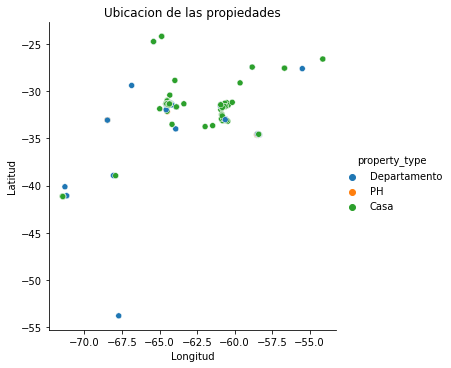

In [29]:
sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

Podemos ver que la mayoria de propiedades publicadas se encuentran concentradas en un área en particular, donde mayormente son de tipo Casa. Y al alejarse se ven departamentos distanciados entre sí.

### Distribución de habitaciones y baños

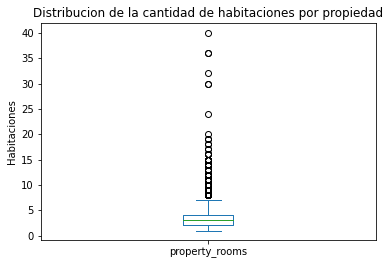

In [30]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

Podemos ver que hay una gran cantidad de outliers, siendo 40 el que mas se aleja, para visualizar mejor la distribucion del boxplot veremos un nuevo grafico sin considerar los outliers.

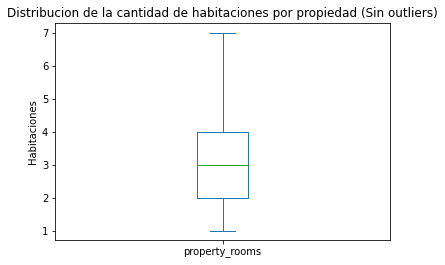

In [31]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

Ahora si podemos visualizar mejor los valores de la mediana, q3, q1 y los bigotes. Que toman la siguiente cantidad de habitaciones:

*   Bigotes: 1 y 7.
*   Cuartil 1: 2
*   Mediana: 3.
*   Cuartil 3: 4.





Hacemos el mismo procedimiento ver la distribución de la cantidad de baños por propiedad

<AxesSubplot:title={'center':'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

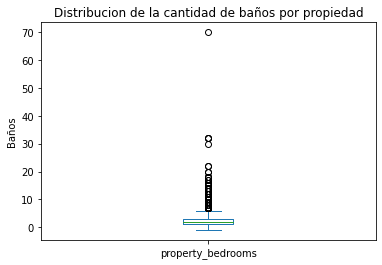

In [32]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")

Vemos que esta vez hay mas distancia entre el outlier mas alejado y el resto de outliers.

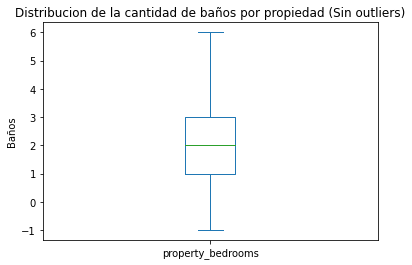

In [33]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

En este caso toman los siguientes valores:

*   Bigotes: -1 y 6.
*   Cuartil 1: 1.
*   Mediana: 2.
*   Cuartil 3: 3.


### Distribución de precio

Para analizar la distribución del precio, como es un tipo de variable continua y cada observación puede tomar un valor en un rango muy grande, optamos por hacer una agrupación por rangos de precios, obteniendo una categoria por cada rango.
Vamos a considerar la mediana para establecer los limites entre cada grupo, consideramos que es un buen valor para dividir al conjunto en partes ya que no se ve afectado drasticamente por outliers (como si sucede con la media).

In [34]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143900.0


<AxesSubplot:title={'center':'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

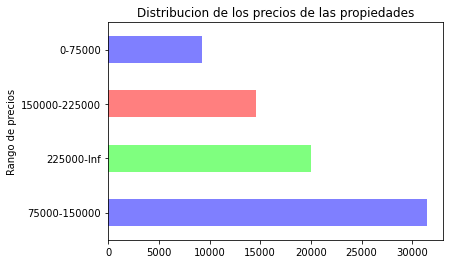

In [35]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

Podemos ver que la mayoria de propiedades estan dentro del rango de 75000 y 150000 USD.

### Distribución de superficie total y cubierta

Utilizaremos un violin plot para cada variable. 

<AxesSubplot:>

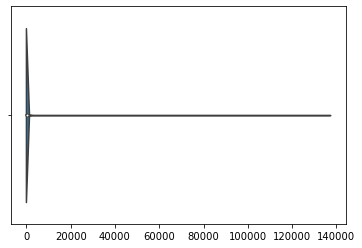

In [36]:
sns.violinplot(ds_train.property_surface_total.values)

A simple vista no esta muy claro el gráfico por la cantidad de outliers que hay, por lo que dejaremos de lado la mayoria de outliers para interpretarlo mas en detalle.

<AxesSubplot:>

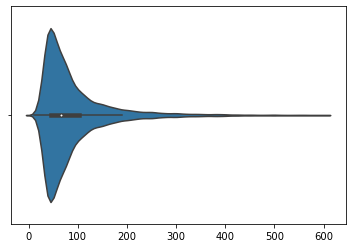

In [37]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

Podemos ver que entre 0 y 100 se encuentra la mayor densidad

Hacemos el mismo procedimiento para visualizar la distribución de la superficie cubierta de la propiedad

<AxesSubplot:>

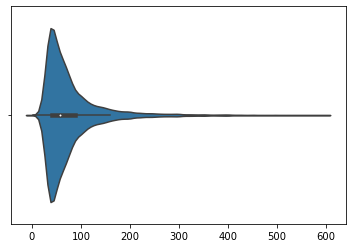

In [38]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

Se nota que el grafico de property_surface_total es similar al de property_surface_covered, teniendo el segundo una densidad levemente menor. 

## Correlación entre variables

A continuación analizaremos la correlación entre las variables cuantitativas, primero visualizando la distribución a pares entre estas.

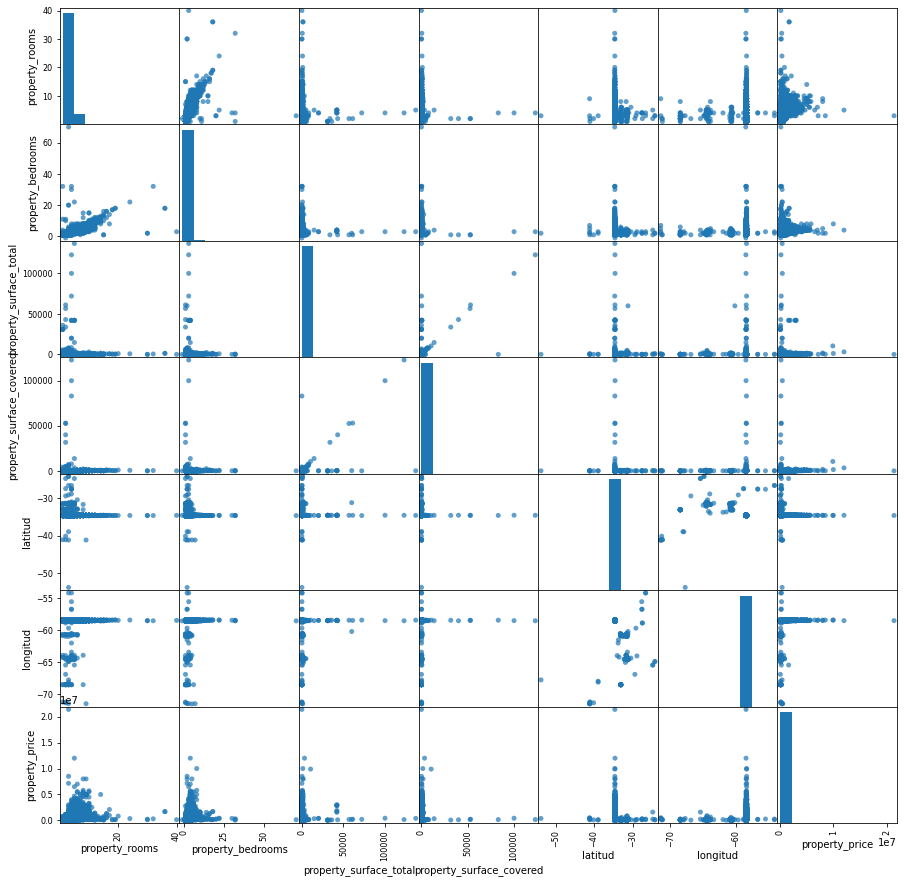

In [39]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

Si bien a simple vista no esta muy claro que variables están correlacionadas entre sí, podemos suponer que puede llegar a haber relación entre property_rooms y property_bedrooms, property_surface_total y property_surface_covered, property_price y property_rooms, property_price y property_bedrooms. Las cuales tiene sentido que pudiesen tener algún tipo de relación.

Además podemos considerar en menor medida que haya una relación entre longitud y latitud (cosa que no necesariamente tendría que ser así)




Analizaremos la correlación lineal entre variables por medio de la medición del coeficiente de Pearson

In [40]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.863752   
property_bedrooms               0.863752           1.000000   
property_surface_total          0.063332           0.062923   
property_surface_covered        0.070081           0.066959   
latitud                         0.006444           0.001997   
longitud                       -0.010840          -0.011229   
property_price                  0.483999           0.419981   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.063332                  0.070081   
property_bedrooms                       0.062923                  0.066959   
property_surface_total                  1.000000                  0.601378   
property_surface_covered                0.601378                  1.000000   
latitud                                 0.027102                  0.004329   
longitud                               -0.016024                 -0.002211   
property_price                          0.083028                  0.074702   

                           latitud  longitud  property_price  
property_rooms            0.006444 -0.010840        0.483999  
property_bedrooms         0.001997 -0.011229        0.419981  
property_surface_total    0.027102 -0.016024        0.083028  
property_surface_covered  0.004329 -0.002211        0.074702  
latitud                   1.000000 -0.246450        0.016678  
longitud                 -0.246450  1.000000        0.021648  
property_price            0.016678  0.021648        1.000000

Haremos un heatmap que nos permite visualizar mejor la correlación

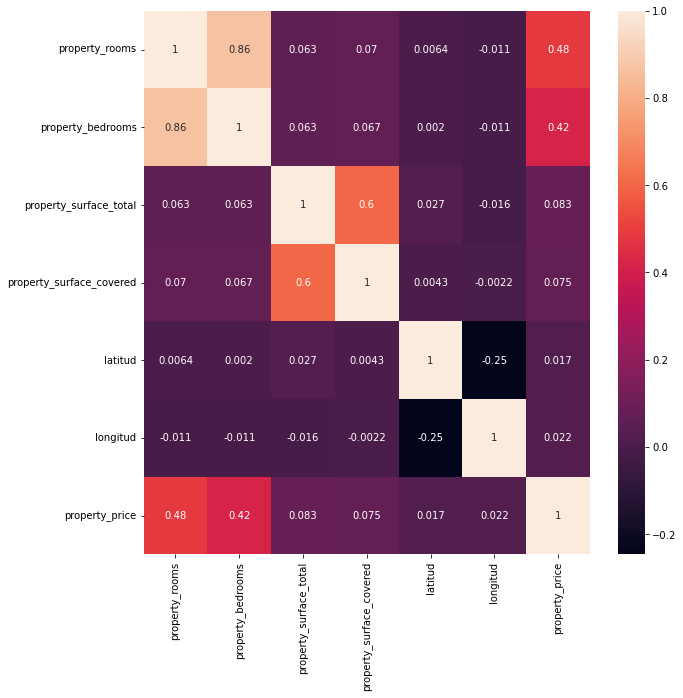

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

Luego de calcular el coeficiente de Pearson donde los que resultan cercanos a 1 indican una gran correlación entre sí, los que tienden a 0 tienen poca correlación y los cercanos a -1 presentan una notable correlación negativa.

Veremos si las variables que parecían relacionarse anteriormente realmente lo hacen:


In [42]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.86
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.48
Entre property_surface_total y property_surface_covered:0.6
Entre longitud y latitud:-0.25


Podemos sacar las siguientes conclusiones sobre las variables que parecian relacionarse:


*   Hay mucha relación entre la cantidad de habitaciones y ambientes.
*   Hay tambien bastante relación entre la superficie total y superficie cubierta de la propiedad.
*   Casi no hay relación entre el precio y la cantidad de habitaciones.
*   Casi no hay relación entre el precio y la cantidad de ambientes.
*   No hay relación entre la latitud y la longitud.





## Análisis de valores faltantes

Ahora analizaremos los datos faltantes del dataset.

### Porcentaje de valores faltantes por columna



id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.981485
longitud                      3.981485
place_l2                      0.000000
place_l3                      0.446956
place_l4                     96.135227
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.115399
property_bedrooms            11.614212
property_surface_total        5.120758
property_surface_covered      3.547792
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


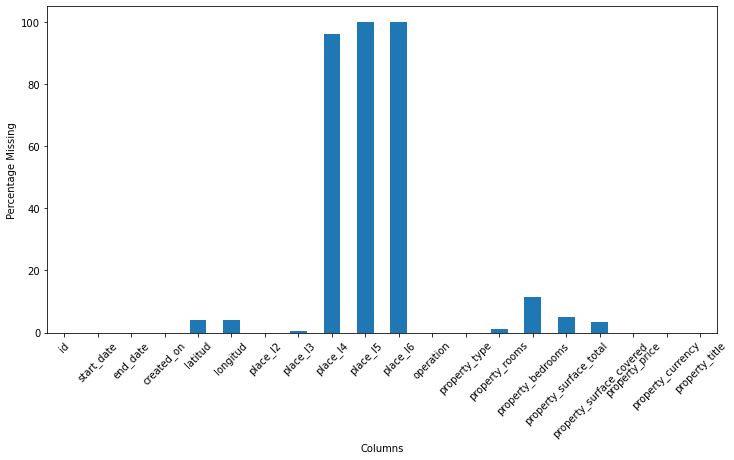

In [43]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

A simple vista podemos ver que las columnas place_l4,place_l5 y place_l6 practicamente no tienen datos, procederemos a eliminarlas.

### Porcentaje de datos faltantes por fila

<AxesSubplot:>

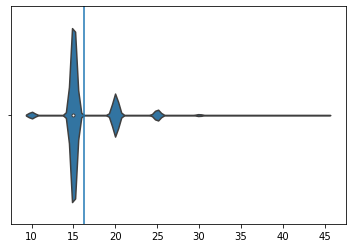

In [44]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

Analizaremos nuevamente el porcentaje por fila luego de trabajar con las columnas

### Procesado de columnas

Descartaremos la columna id debido a que no es relevante para nuestro análisis. No podemos usar un dato uníco porque no representa ninguna característica relevante.

In [45]:
ds_train['id'].head()

111540    EVfGYQs2brb9gmtGnPiecA==
167194    tSlWj8phl1kcX1IXRGj//g==
398794    AngC3iBNNDkz1nr17EyImg==
233796    rPQc/mdlEjobdWNkHrZAjw==
303005    c16Khtl1v+T2JL3WGyqZag==
Name: id, dtype: object

Como mencionamos anteriormente, evaluaremos descartar place_l4 por la cantidad de valores faltantes que hay.

In [46]:
ds_train['place_l4'].value_counts()

Palermo Hollywood    1248
Palermo Chico         873
Palermo Soho          652
Palermo Viejo         141
Name: place_l4, dtype: int64

In [47]:
ds_train['place_l2'].value_counts()

Capital Federal    75399
Name: place_l2, dtype: int64

In [48]:
ds_train['property_currency'].value_counts()

USD    75399
Name: property_currency, dtype: int64

In [49]:
ds_train['operation'].value_counts()

Venta    75399
Name: operation, dtype: int64

Como place_l4 tiene pocas observaciones y todas corresponden al barrio de Palermo, descartaremos esta columna.
Además, como mencionamos más arriba, la columna created_on siempre es igual a la columna start_date, por lo que también la descartaremos.
Por otro lado, como filtramos solo las propiedades de CABA eliminaremos la columna place_l2 ya que tiene un único valor. Por el mismo motivo eliminaremos la columna property_currency y la columna property_operation.

In [50]:
row_missing_data = ds_train.T.isna().sum() * 100 / column_count
row_missing_data.value_counts()

15.0    56977
20.0    12471
25.0     3287
10.0     1935
30.0      556
40.0       89
35.0       83
45.0        1
dtype: int64

In [51]:
dataset_perc = row_missing_data.value_counts() * 100 / ds_train.shape[0]
print(f"La cantidad de faltantes segun porcentaje representan\n{dataset_perc}")

La cantidad de faltantes segun porcentaje representan
15.0    75.567315
20.0    16.540007
25.0     4.359474
10.0     2.566347
30.0     0.737410
40.0     0.118039
35.0     0.110081
45.0     0.001326
dtype: float64


Ahora que elegimos las columnas deseadas, veremos nuevamente los porcentajes por columna para preparar algunas imputaciones

In [52]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.981485
longitud                      3.981485
place_l2                      0.000000
place_l3                      0.446956
place_l4                     96.135227
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.115399
property_bedrooms            11.614212
property_surface_total        5.120758
property_surface_covered      3.547792
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


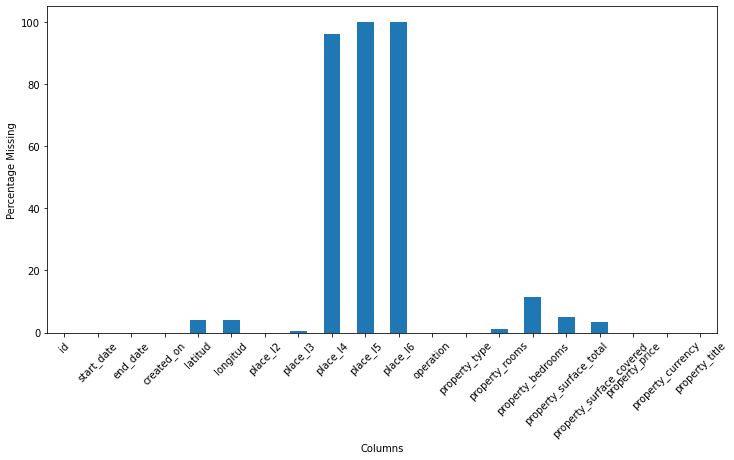

In [53]:
plot_missing_by_column(ds_train)

Eliminaremos las columnas mencionadas anteriormente. Luego, haremos algunas imputaciones sobre los datos faltantes para reparar algunos.


In [54]:
## Train

ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
              inplace=True, axis=1)

## Test
ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
             inplace=True, axis=1)

## Reparacion de datos faltantes

Ahora analizaremos columna a columna como podemos reparar esos datos.

### Pre Imputacion de latitud y longitud

latitud    3.981485
dtype: float64


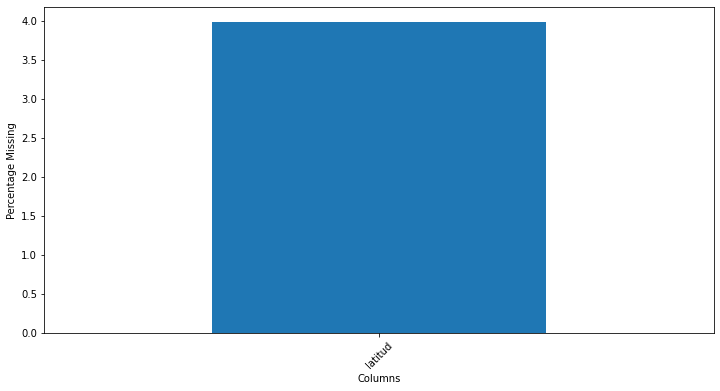

In [55]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.981485
dtype: float64


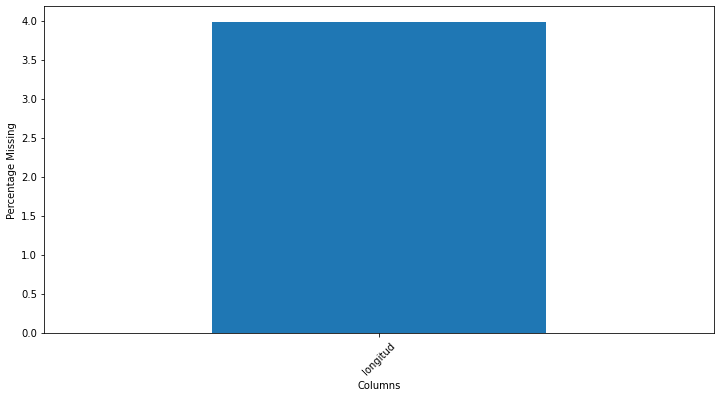

In [56]:
plot_missing_by_column(ds_train[['longitud']])

Vemos que de las coordenadas faltantes, siempre que falta una falta la otra también. No hay casos donde solo falte 1 de las 2 coordenadas.

In [57]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [58]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [59]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.664%
Los datos faltantes en la columna place_l3 para test representan el 4.121%


Para reconstruir los datos faltantes nos vamos a basar en el barrio marcado por 'place_l3' calculando la latitud y longitud media de cada uno y asignarle esos datos.

In [60]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

Vemos que los datos restantes ahora mismo son aquellos que tampoco tienen asignado un barrio. Dichos datos son irreparables, ya que no tenemos ninguna información respecto a la ubicación.

In [61]:
ds_train[ds_train.latitud.isna()]

id start_date   end_date  latitud  longitud  \
309867  2oiyp4YLGap4pyz/JrKC3A== 2021-09-01 2021-11-04      NaN       NaN   
318752  kSB4D67fcBa7uQqz5FRKZw== 2021-03-17 2021-06-05      NaN       NaN   
79650   1DQLwAOa+obiAO8Gio08AA== 2021-08-17 2021-11-04      NaN       NaN   
101456  pYxy/6HZGMBjHgbngmG70Q== 2021-05-28 2021-06-05      NaN       NaN   
445804  BZF7xcpA0wDZYDkuTkn/kA== 2021-01-14 2021-11-04      NaN       NaN   
...                          ...        ...        ...      ...       ...   
119175  iBAE80MSUHIX96PwAFleUA== 2021-03-25 2021-11-04      NaN       NaN   
363969  p6PDh9UYBzTc/nWB1Ye2Xw== 2021-04-10 2021-04-13      NaN       NaN   
251806  tC1oqOOm/XEraWtI3riChA== 2021-06-18 2021-06-18      NaN       NaN   
447263  a8bAY8SHmXE6yDuJ267Sug== 2021-05-22 2021-06-05      NaN       NaN   
25588   7usJZ7GPEzhPIFyuSPrb8Q== 2021-06-24 2022-08-12      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
309867      NaN  Departamento             2.0                NaN   
318752      NaN  Departamento             2.0                1.0   
79650       NaN            PH             3.0                NaN   
101456      NaN          Casa             NaN                6.0   
445804      NaN            PH             4.0                NaN   
...         ...           ...             ...                ...   
119175      NaN  Departamento             1.0                NaN   
363969      NaN          Casa             NaN                1.0   
251806      NaN          Casa             5.0                4.0   
447263      NaN  Departamento             2.0                1.0   
25588       NaN  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
309867                     NaN                      40.0         84900.0   
318752                    36.0                      36.0         75000.0   
79650                    150.0                     150.0        250000.0   
101456                  2000.0                     374.0        700000.0   
445804                   120.0                     166.0        195000.0   
...                        ...                       ...             ...   
119175                     NaN                      23.0         53000.0   
363969                   300.0                     300.0        330000.0   
251806                   160.0                     150.0        210000.0   
447263                    78.0                      52.0        150000.0   
25588                     79.0                      79.0        190000.0   

                                           property_title  
309867  Departamento en Venta Caba / Buenos Aires (B11...  
318752                  ALQUILER 2 AMBIENTES EN EL CENTRO  
79650         PH en Venta Caba / Buenos Aires (D038 1565)  
101456                     ESPECTACULAR CASA EN IBARLUCEA  
445804        PH en Venta CABA / Buenos Aires (D038 1520)  
...                                                   ...  
119175  Departamento en Venta CABA / Buenos Aires (D03...  
363969  Venta de local con casa zona de Exlatacion de ...  
251806        Casa con excelente vista en Costa Esmeralda  
447263     Edificio Ceibos a Estrenar,2 ambientes 1 BAÑO   
25588                               Departamento - Centro  

[140 rows x 13 columns]

In [62]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
39238   3BcwF2I3NzKXZRjhFa46Vw==        NaT      NaT      NaN       NaN   
120615  W15IVdCCvZ80j38hC7Y4Dw==        NaT      NaT      NaN       NaN   
119233  RXiEnxNZYAZm8tEhsv6sxQ==        NaT      NaT      NaN       NaN   
441481  HaLzJ47x5J7a+LN0if6Jug==        NaT      NaT      NaN       NaN   
37652   MhTztkJUDyhN71Dj5dzhXw==        NaT      NaT      NaN       NaN   
169691  /HjGljAcks2boe1uclUdBg==        NaT      NaT      NaN       NaN   
113348  xSgDIxq5cTDtkRJUFK0wsg==        NaT      NaT      NaN       NaN   
318737  /GQgeYB366orgPmlswOlew==        NaT      NaT      NaN       NaN   
101428  gF45Up7vyzAOFVs11JkikQ==        NaT      NaT      NaN       NaN   
161698  GhIxeNGs5rOvxRVwOhqxfA==        NaT      NaT      NaN       NaN   
83547   HMcd5R2BH3ZwFht+Xr31fA==        NaT      NaT      NaN       NaN   
69056   bYR88SCJgxobwY62vy40KQ==        NaT      NaT      NaN       NaN   
31871   BKX/oZw0f3iowrtswwdbMA==        NaT      NaT      NaN       NaN   
435772  ohO8N8/AFg1axmBbwwGkuw==        NaT      NaT      NaN       NaN   
299216  3YXrUTUsKAzutpSbOuezfg==        NaT      NaT      NaN       NaN   
143123  m281LUJMceK6Z3pN9+h3cg==        NaT      NaT      NaN       NaN   
324195  yZbN/7naQCAKZfRIbH9lqw==        NaT      NaT      NaN       NaN   
458696  UxrImoZVU0nEah53uM/NSg==        NaT      NaT      NaN       NaN   
25      CyZu6IaZgmQYGk8jmPajCg==        NaT      NaT      NaN       NaN   
435764  6xJbFM++5tur6sP49ajkvQ==        NaT      NaT      NaN       NaN   
313804  +pYkycxlnUpcKI6YfV68KQ==        NaT      NaT      NaN       NaN   
142639  Rz0b5avJ+Y05s1qSNFVmsw==        NaT      NaT      NaN       NaN   
286971  Ofh+oK3y43KJLYsPg0uj4w==        NaT      NaT      NaN       NaN   
371921  34/PRStI7EmJbD6zSjBAYw==        NaT      NaT      NaN       NaN   
459199  oYcjmcAXiY+MSWKw0iU28Q==        NaT      NaT      NaN       NaN   
97667   B7DF6p55ymZ7udgcXdgv2g==        NaT      NaT      NaN       NaN   
381106  VhrNggUdh3Gz+4z9iX4nlw==        NaT      NaT      NaN       NaN   
343265  ivCufxbxoTGNCsW8IF72Iw==        NaT      NaT      NaN       NaN   
458690  uzOE5TSle78c4dgqiJ8hYg==        NaT      NaT      NaN       NaN   
314306  bFGH2U1OERyQvUia3CD5gg==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
39238       NaN  Departamento             4.0                3.0   
120615      NaN  Departamento             3.0                2.0   
119233      NaN            PH             2.0                NaN   
441481      NaN  Departamento             2.0                2.0   
37652       NaN          Casa             NaN                4.0   
169691      NaN  Departamento             3.0                NaN   
113348      NaN  Departamento             4.0                3.0   
318737      NaN  Departamento             1.0                NaN   
101428      NaN          Casa             NaN                2.0   
161698      NaN  Departamento             3.0                2.0   
83547       NaN  Departamento             NaN                3.0   
69056       NaN  Departamento             1.0                NaN   
31871       NaN  Departamento             NaN                2.0   
435772      NaN  Departamento             2.0                1.0   
299216      NaN            PH             3.0                2.0   
143123      NaN  Departamento             2.0                NaN   
324195      NaN  Departamento             3.0                NaN   
458696      NaN          Casa             NaN                2.0   
25          NaN          Casa             4.0                3.0   
435764      NaN  Departamento             3.0                NaN   
313804      NaN          Casa             6.0                NaN   
142639      NaN          Casa             5.0                NaN   
286971      NaN  Departamento             2.0                NaN   
371921      NaN          Casa             4.0                3.0   
4591

In [63]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0019%
El porcentaje de valores a eliminar en test corresponden a un 0.0016%


In [64]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

### Post Imputacion de latitud y longitud

latitud    0.0
dtype: float64


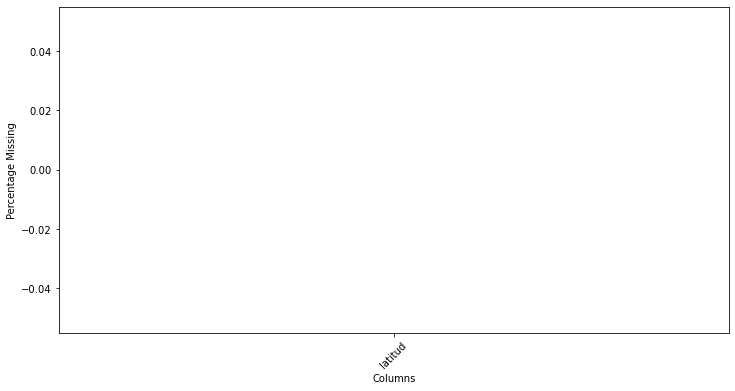

In [65]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


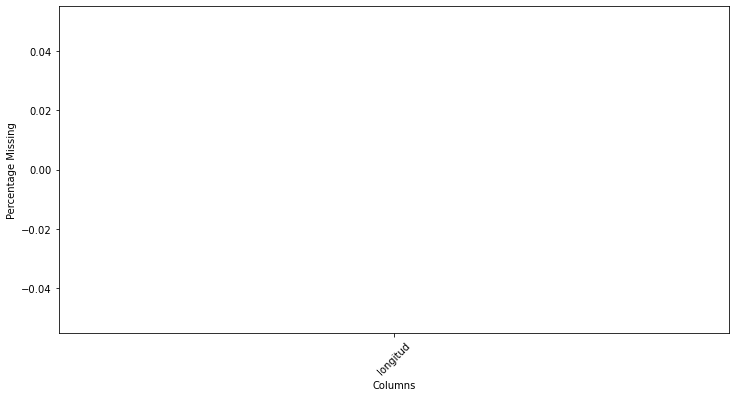

In [66]:
plot_missing_by_column(ds_train[['longitud']])

### Pre imputación de ambientes

property_rooms    1.085584
dtype: float64


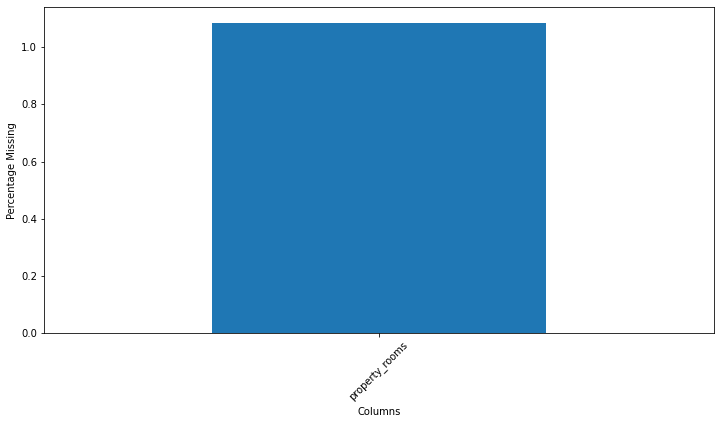

In [67]:
plot_missing_by_column(ds_train[['property_rooms']])

#### Reparacion de ambientes faltantes en base al titulo de la propiedad

In [68]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")


In [69]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 817
cantidad de ambientes faltantes post reparacion: 643
cantidad inicial de ambientes a reparar: 197
cantidad de ambientes faltantes post reparacion: 191


### Post Imputacion de ambientes

property_rooms    0.854383
dtype: float64


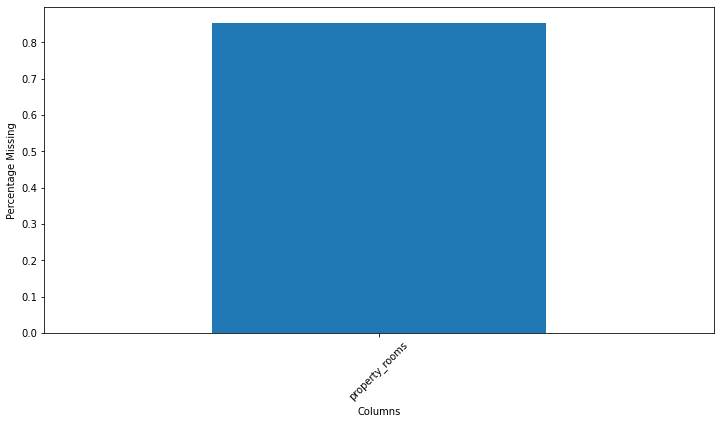

In [70]:
plot_missing_by_column(ds_train[['property_rooms']])

Como las que quedan sin datos son pocas observaciones, las eliminaremos

In [71]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


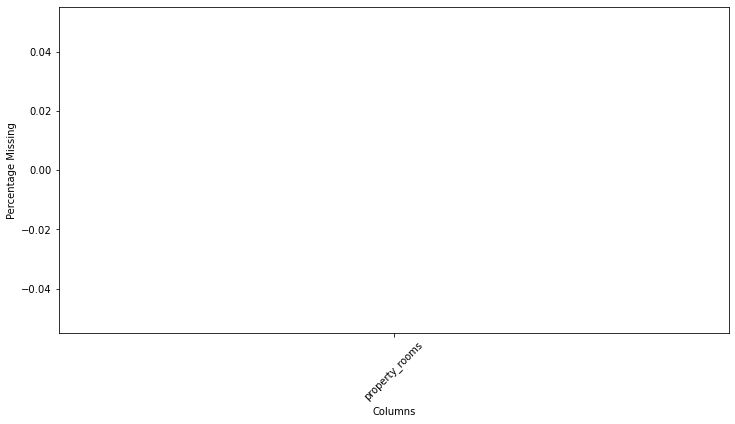

In [72]:
plot_missing_by_column(ds_train[['property_rooms']])

### Pre Imputacion de Habitaciones

property_bedrooms    11.234856
dtype: float64


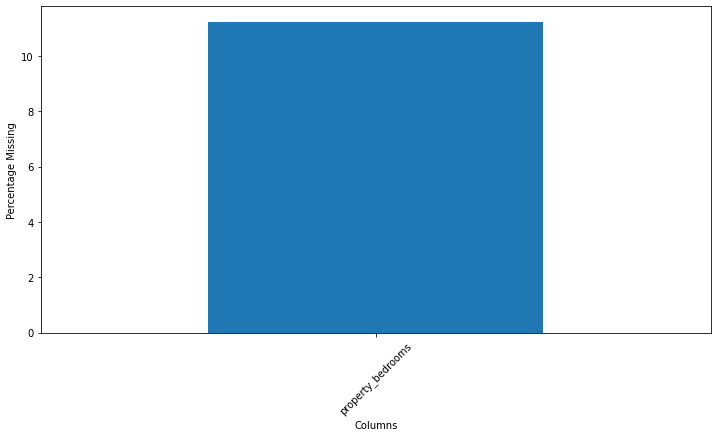

In [73]:
plot_missing_by_column(ds_train[['property_bedrooms']])

#### Reparacion de habitaciones faltantes en base a los ambientes

In [74]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas



El total de habitaciones en train es: 74616
El total de habitaciones invalidas es: 137. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18629
El total de habitaciones invalidas es: 26. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
130208  aDyZI32jYV/LuQdSHQRAOQ==        NaT      NaT -34.604930 -58.440416   
389699  /D5DqZYM2nZ/7R9a/Ty+Gw==        NaT      NaT -34.606923 -58.404533   
48332   /VjUSHWTdfV9lkqkj+SFvA==        NaT      NaT -34.613200 -58.471100   
368740  tIUJMVCv8Zy+EW5bUGeV3Q==        NaT      NaT -34.638036 -58.374872   
54021   hGQM/Ul+C0II9otOEBQnsA==        NaT      NaT -34.605454 -58.506832   
115478  iCWwiz2RVAkocqGsdwEv3Q==        NaT      NaT -34.613261 -58.361513   
42461   EWmnI2HGg+MQoutv1acR/Q==        NaT      NaT -34.614298 -58.427139   
443898  oj7pM0UnMdxUrnbcWlN6DQ==        NaT      NaT -34.562809 -58.476758   
115479  UpWmRfbiee9zaj0DBbsKRw==        NaT      NaT -34.613261 -58.361513   
6355    PZJRORTIAvMTvI3A+FLDUQ==        NaT      NaT -34.577180 -58.451264   
304227  KnJPz4T2aLzhbWY8pjenWg==        NaT      NaT -34.568785 -58.457129   
446099  HUuHPfUR7mXKFC4jFkiELA==        NaT      NaT -34.581909 -58.424620   
323765  axwZ6U4+1RIdVT+eKpht9w==        NaT      NaT -34.605374 -58.365343   
115502  tNDmYqYiETKsquAIP857XA==        NaT      NaT -34.613261 -58.361513   
115177  a24+VxYEvhf2tdK0lpeYvQ==        NaT      NaT -34.620586 -58.439740   
325449  LZhr2owtQ83MiDi55T7vfA==        NaT      NaT -34.598801 -58.436084   
314524  zQLIDasZzzC/Mrns3r4TLw==        NaT      NaT -34.567787 -58.448913   
120845  4tv+arT+v45pAwx5zNpzWQ==        NaT      NaT -34.608618 -58.440001   
63013   q5mE4qv6OxYNWlMis+Mwig==        NaT      NaT -34.650211 -58.503437   
337149  cMA0xBBQnANFa/wNTQtZcw==        NaT      NaT -34.607400 -58.421933   
115504  qsmPAKJ9brIGa8jbUAtQ1Q==        NaT      NaT -34.613261 -58.361513   
36421   VoyodCc8rftOZHr4TeYcpw==        NaT      NaT -34.576061 -58.421289   
345928  YtZ92HeeTOj5vzYY05L7Cw==        NaT      NaT -34.577375 -58.413314   
24299   SugFYyOJDWDw9e7NLIgTQA==        NaT      NaT -34.547964 -58.465092   
354668  +SPkA/Y4DHEHf+HIppYFKg==        NaT      NaT -34.611905 -58.382384   
126403  ETzg09MPRQDliI9p8PzeBg==        NaT      NaT -34.564988 -58.444710   

                   place_l3 property_type  property_rooms  property_bedrooms  \
130208         Villa Crespo          Casa             5.0                8.0   
389699                 Once  Departamento             1.0                2.0   
48332   Villa General Mitre            PH             3.0                4.0   
368740             Barracas  Departamento             1.0                2.0   
54021          Villa Devoto  Departamento             4.0                5.0   
115478        Puerto Madero  Departamento             3.0                4.0   
42461               Almagro  Departamento             3.0                4.0   
443898             Congreso  Departamento             1.0                2.0   
115479        Puerto Madero  Departamento             3.0                4.0   
6355             Colegiales  Departamento             6.0                8.0   
304227             Belgrano  Departamento             1.0                5.0   
446099              Palermo  Departamento             3.0                4.0   
323765            San Telmo  Departamento             1.0                2.0   
115502        Puerto Madero  Departamento             3.0                4.0   
115177            Caballito  Departamento             2.0                3.0   
325449         Villa Crespo          Casa             5.0                7.0   
314524             Belgrano  Departamento             3.0                4.0   
120845            Caballito  Departamento             3.0                4.0   
63013             Mataderos  Departamento             1.0                2.0   
337149              Almagro  Departamento             3.0               20.0   
115504        Puerto Madero  Departamento             3.0                4.0   
36421               Palermo  Departamento             3.0               20.0   
345928              Palermo  Departamento             5.0                6.0   
242

Si tomamos en cuenta que 128 (train) y 35 (test) de los valores (0% aproximado) tienen mas habitaciones que ambientes, podriamos pensar en imputar los datos faltantes elimanando estas filas y haciendo que los valores que sean NAN, ahora sean habitaciones = ambientes - 1

In [75]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55806. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13887. Constituyen al 74% de los datos


Las habitaciones que son Ambientes - 1 son: 55797. Constituyen al 74% de los datos. Como notamos que es un valor muy representativo del dataset, optamos por imputar los datos faltantes como mencionamos antes, es decir, los ambientes que no esten vacios y que tengan habitaciones vacias, ahora tendran habitaciones = ambientes -1.

In [76]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8383
Valor inicial de habitaciones faltantes en el ds de test: 2144


In [77]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [78]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

### Post Imputacion de habitaciones

property_bedrooms    0.0
dtype: float64


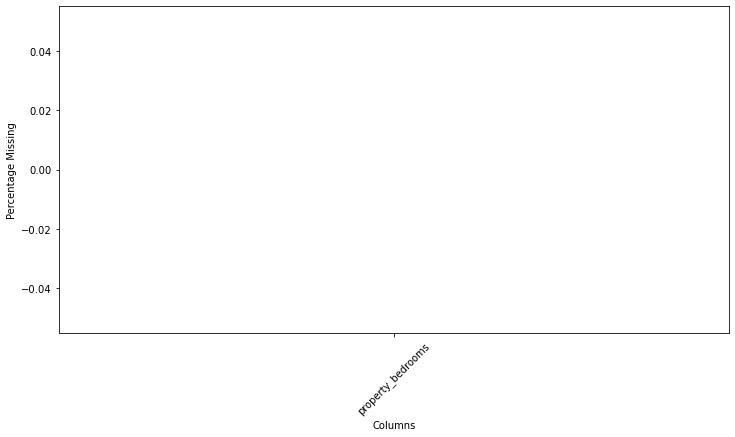

In [79]:
plot_missing_by_column(ds_train[['property_bedrooms']])

### Pre Imputación de Superficie total

property_surface_total    4.901094
dtype: float64


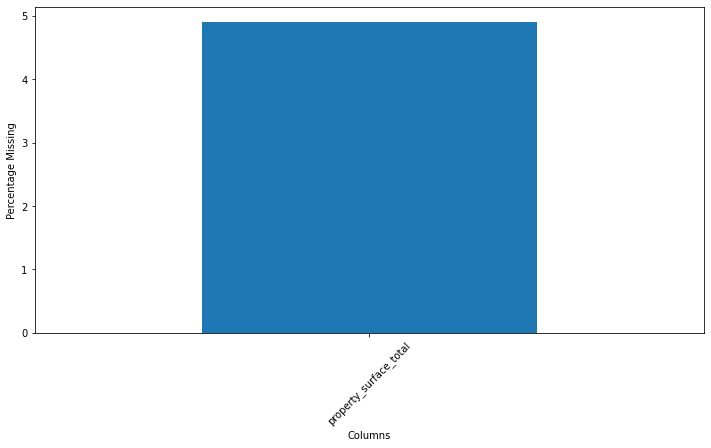

In [80]:
plot_missing_by_column(ds_train[['property_surface_total']])

Como a simple vista muchos registros tienen superficie cubierta, veremos en cuantos faltan ambos datos

In [81]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

#### Reparación de datos faltantes en superficie cubierta

Como todos los datos tienen la superficie cubierta, repararemos estos datos tomando ese valor como superficie total

In [82]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

### Post Imputación de Superficie total

property_surface_total    0.0
dtype: float64


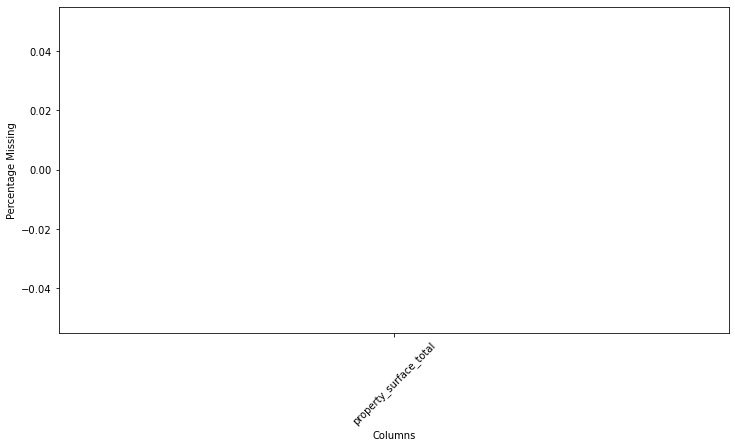

In [83]:
plot_missing_by_column(ds_train[['property_surface_total']])

### Pre Imputación de superficie cubierta

In [84]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date   end_date    latitud   longitud  \
135564  zYzMP/1Aqy3lQoYiDIP4qw== 2021-04-06 2021-04-15 -34.611004 -58.361275   
88340   aBlldrx4ZjE5mrYmuFv+FA== 2021-05-14 2021-06-05 -34.635444 -58.409702   
31964   CONalyuUz9WMaJEEUFHgPQ== 2021-05-17 2021-06-05 -34.575931 -58.407348   
246934  5RSeBqTHTR0kQdQiP1jZ2w== 2021-10-08 2022-03-06 -34.625597 -58.373323   
280280  SobI8LsXoXCpPnBm9R5iHg== 2021-07-12 2021-09-21 -34.581200 -58.476927   
...                          ...        ...        ...        ...        ...   
221431  pwusNl/T92KLfVd/1bZ2dA== 2021-06-30 2021-12-17 -34.592576 -58.408402   
179691  OgUhq2nj8jg8WFYZMVeBuQ== 2021-02-02 2021-02-04 -34.547964 -58.465092   
157365  DnudppWMsQqRZYqMvbf4Cw== 2021-02-17 2021-11-19 -34.590794 -58.446803   
32408   J0oJTCThKN+4JA6aUtGCbg== 2021-12-04 2022-01-13 -34.589272 -58.407453   
271492  lwjLesYKLNrvh7gibvVxxA== 2021-06-19 2022-05-28 -34.578900 -58.397956   

                place_l3 property_type  property_rooms  property_bedrooms  \
135564     Puerto Madero  Departamento             3.0                2.0   
88340   Parque Patricios            PH             4.0                3.0   
31964            Palermo  Departamento             2.0                1.0   
246934         San Telmo  Departamento             2.0                1.0   
280280       Parque Chas          Casa             3.0                2.0   
...                  ...           ...             ...                ...   
221431           Palermo  Departamento             4.0                3.0   
179691             Nuñez  Departamento             3.0                2.0   
157365         Chacarita  Departamento             1.0                1.0   
32408            Palermo  Departamento             1.0                1.0   
271492           Palermo          Casa            10.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
135564                    80.0                       NaN        529000.0   
88340                    107.0                       NaN        120000.0   
31964                     48.0                       NaN        200000.0   
246934                    81.0                       NaN        107000.0   
280280                   113.0                       NaN        250000.0   
...                        ...                       ...             ...   
221431                   128.0                       NaN        260000.0   
179691                   152.0                       NaN        290000.0   
157365                    43.0                       NaN        110000.0   
32408                     34.0                       NaN         85000.0   
271492                   517.0                       NaN       3250000.0   

                                           property_title  
135564                     Departamento - Capital Federal  
88340     PH dos plantas a refaccionar - Parque Patricios  
31964               EXCELENTE DEPTO 2 AMB - PALERMO CHICO  
246934  Departamento 81 m2 - San Telmo 2 Amb, Terracit...  
280280   Casa en esquina sobre lote propio. Gran terraza.  
...                                                   ...  
221431                             Departamento - Palermo  
179691             Gran terraza y departamento! Visitalo!  
157365                           Departamento - Chacarita  
32408                              Departamento - Palermo  
271492  Casa espectacular con terraza, pileta y parril...  

[2602 rows x 13 columns]

property_surface_covered    3.487188
dtype: float64


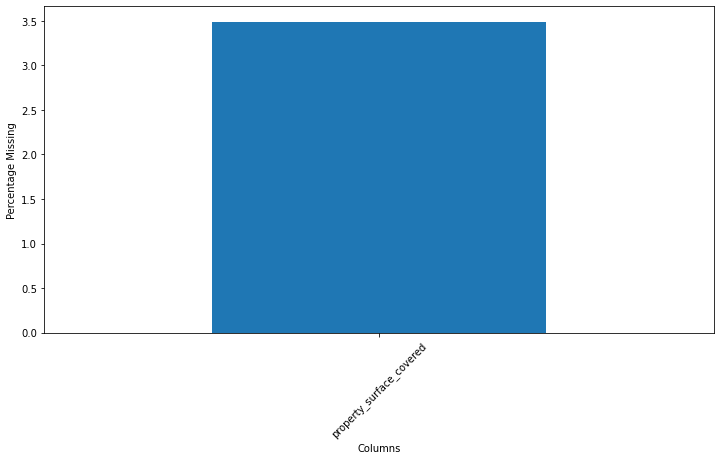

In [85]:
plot_missing_by_column(ds_train[['property_surface_covered']])

##### Reparación de datos faltantes en Superficie cubierta

Como tenemos 2672 registros nulos para la superficie cubierta, imputaremos de la misma forma los registros que son Departamentos porque su superficie total suele ser muy cercana a la cubierta

In [86]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2343
PH               179
Casa              80
Name: property_type, dtype: int64

In [87]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [88]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 259


In [89]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 661


Los 262 registros restantes de train los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

Los 651 registros restantes de test tambien los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

In [90]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

Volvemos a evaluar el porcentaje de datos faltantes

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.211144
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


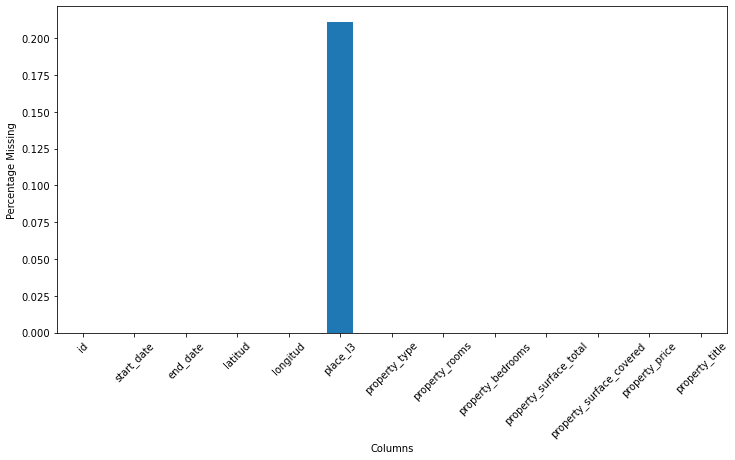

In [91]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

## Grafico de los barrios de CABA

In [92]:
# Proceso el archivo de los barrios de CABA
barrios = gpd.read_file('./barrios.geojson')
barrios.head()

BARRIO  COMUNA    PERIMETRO          AREA  OBJETO  \
0         CHACARITA    15.0  7724.852955  3.115707e+06  BARRIO   
1          PATERNAL    15.0  7087.513295  2.229829e+06  BARRIO   
2      VILLA CRESPO    15.0  8131.857075  3.615978e+06  BARRIO   
3  VILLA DEL PARQUE    11.0  7705.389797  3.399596e+06  BARRIO   
4           ALMAGRO     5.0  8537.901368  4.050752e+06  BARRIO   

                                            geometry  
0  MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...  
1  MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...  
2  MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...  
3  MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...  
4  MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...

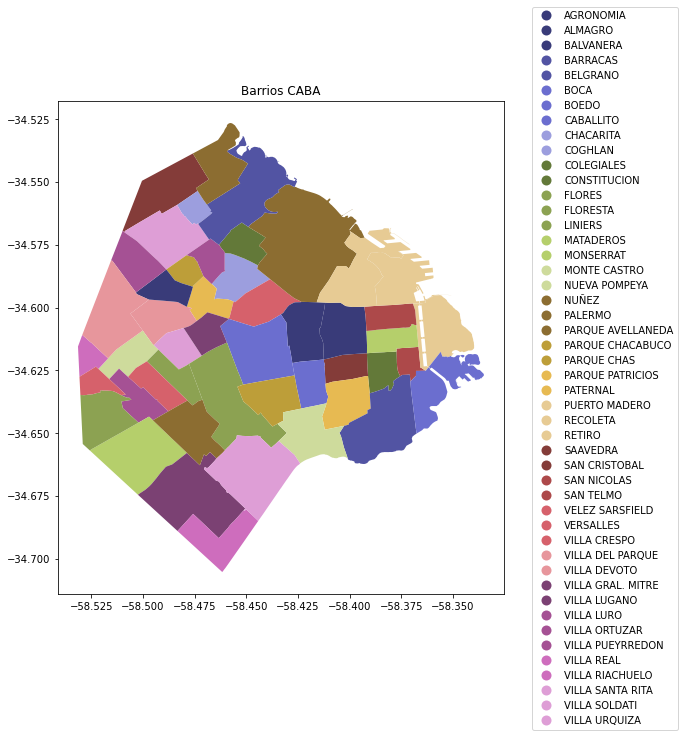

In [93]:
# Realizo el grafico de los barrios de CABA
fig, ax = plt.subplots(figsize=(8, 10))
barrios.plot(column='BARRIO', categorical=True, legend=True, ax=ax, cmap='tab20b')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4, 1.2))

ax.set(title='Barrios CABA')
plt.show()

## Analisis de Valores Atipicos

### Univariados

#### Metodo IQR

In [94]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()


In [95]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max

In [96]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

##### Ambientes

cantidad de datos del ds: 74357
outliers encontrados para los property_rooms: 1184
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


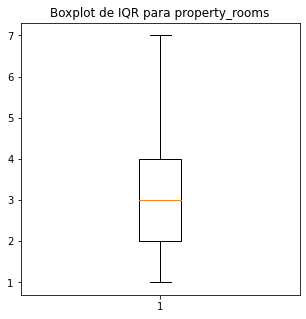

In [97]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

Tomaremos 7 como límite superior y 0 como límite inferior ya que no tiene sentido que haya cantidad de habitaciones negativas.

In [98]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")



Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 596. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 133. Constituyen al 0% de los datos


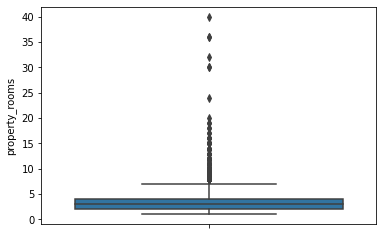

In [99]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Eliminamos los ambientes que son > 7 ya que rompen la media y representan solamente a un porcentaje minúsculo del dataset (1% sobre el 100% del ds).

In [100]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


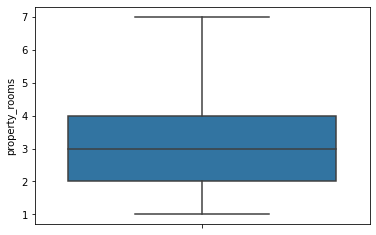

In [101]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Habitaciones

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


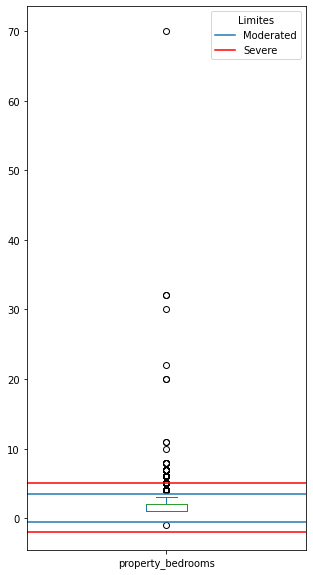

In [102]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73761
outliers encontrados para los property_bedrooms: 4306
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


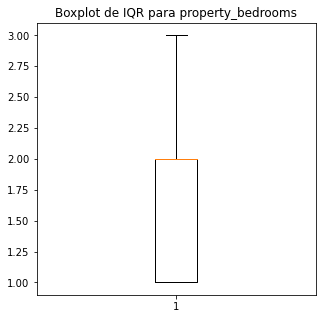

In [103]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [104]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")


Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 26. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 8. Constituyen al 0% de los datos


###### Eliminaremos una observacion en particular que fue detectada como outlier ya que dice tener -1 habitaciones. Este valor no tiene ningun sentido logico en nuestro domino de problema.


In [105]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar:                               id start_date   end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg== 2021-01-07 2021-03-18 -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en train
filas a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en test


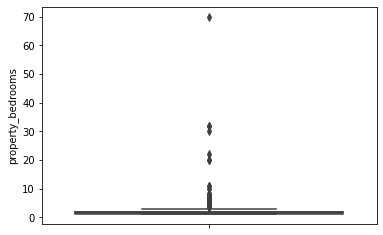

In [106]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

###### Cuando analizamos los valores atipicos detectados notamos que algunas observaciones eran mayores a los ambientes, esto no es posible en nuestro dominio de problema. Por ende, procederemos a eliminarlos. Podemos hacer esto ya que estos valores representan un valor minusculo del dataset.

In [107]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_bedrooms])}")

Ejemplos: 


14

In [108]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 26 registros en train
Se han eliminado: 8 registros en test


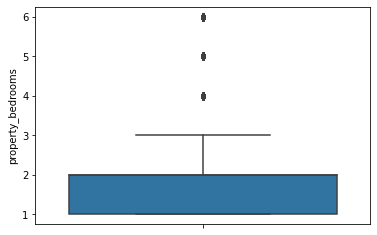

In [109]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

##### Superficie Total

cantidad de datos del ds: 73734
outliers encontrados para los property_surface_total: 5861
hay 7% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


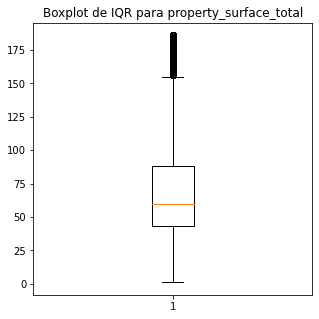

In [110]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

Elegimos tomar como outlier a viviendas que tengan una superifice menor a 18 ya que, en base a los documentos que leimos, este es el minimo necesario para que una persona viva en una vivienda. 18 m2 minimo. Observar los links adjuntos:

https://observatoriociudad.org/microdepartamentos-y-codigo-de-edificacion/

http://ssplan.buenosaires.gob.ar/webfiles/100_preguntas/ce_art_3_8_1_1_1_areas_y_lados_minimos_de_locales_de_vivienda_individual_y_colectiva.pdf

###### Eliminaremos las viviendas que tienen menos de 18 m2 de superficie

In [111]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 70 registros en train
Se han eliminado: 25 registros en test


In [112]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [113]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")


Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5533. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1390. Constituyen al 7% de los datos


Visualizamos nuevamente el box-plot para entender que valores tienen las nuevas observaciones atipicas y ver si debemos seguir eliminando

Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


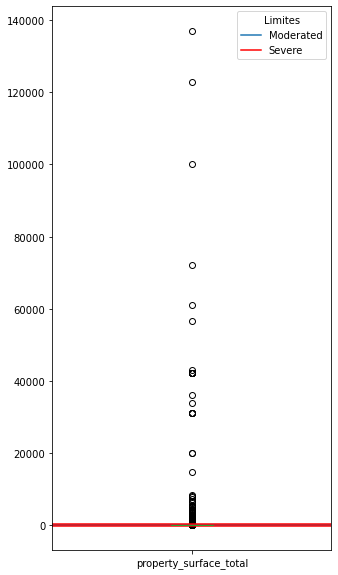

In [114]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

Como tenemos outliers muy altos, el boxplot no se aprecia. Tomaremos solo los outliers severos para un primer análisis

0-272       3227
272-500     2010
500-750      190
1000-inf      86
750-1000      20
Name: property_surface_total, dtype: int64


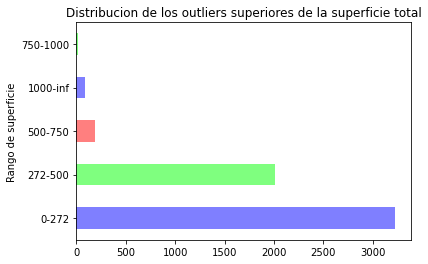

In [115]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [116]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")

Si bien la mediana de la superficite total es 220.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [117]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers superiores de sup total en train son: 296. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 296. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


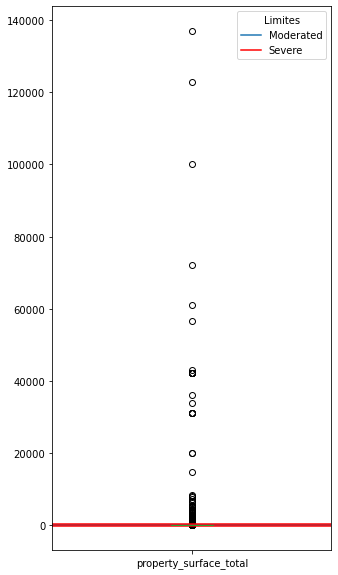

In [118]:
boxplot_with_outliers(ds_train, 'property_surface_total')

###### Procederemos a eliminar las superifices mayores a 500m^2

In [119]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 296 registros en train
Se han eliminado: 72 registros en test


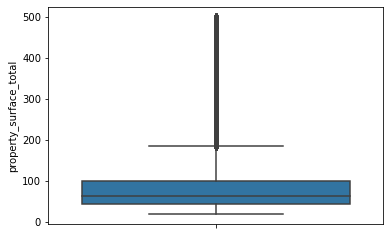

In [120]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

##### Superficie cubierta

cantidad de datos del ds: 73368
outliers encontrados para los property_surface_covered: 5749
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


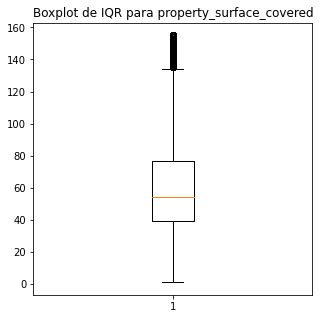

In [121]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [122]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5655. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1424. Constituyen al 8% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


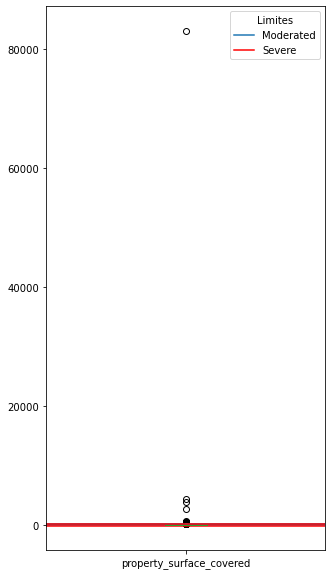

In [123]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Como hay algunas observacion demasiado anómalas, las excluímos para ver mejor

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


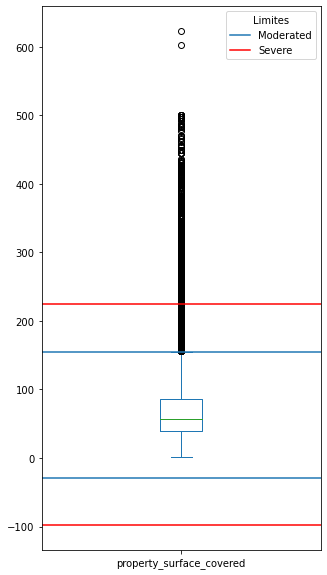

In [124]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3168
224-500     2275
500-750       62
1000-inf      19
750-1000       9
Name: property_surface_covered, dtype: int64


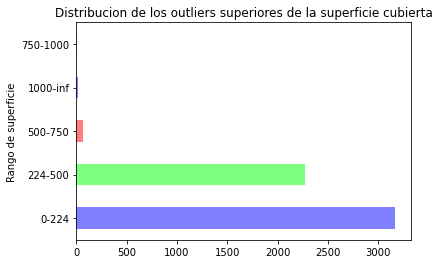

In [125]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

Inspeccionaremos los datos que se encuentran entre 224 y 500 $m^2$ de superficie cubierta

###### Como decidimos tomar como maximo valor de superificie total 500m^2, ese tambien va a ser nuestro maximo limite para la superificie cubierta para mantener la coherencia y el sentido en nuestro dominio. Procederemos a eliminar los valores que se encuentren por arriba. 

In [126]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 6 registros en train
Se han eliminado: 1 registros en test


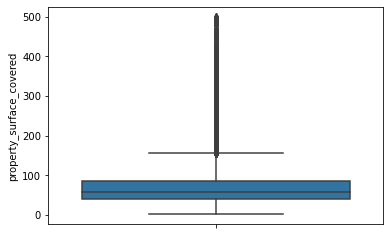

In [127]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

##### Latitud y longitud

cantidad de datos del ds: 73362
outliers encontrados para los latitud: 405
hay 0% de outliers de latitud sobre el ds
limit sup: -34.52022840065, limite inf: -34.67251773225


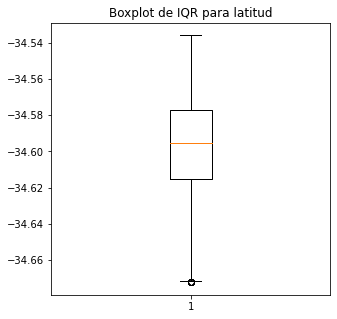

In [128]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73362
outliers encontrados para los longitud: 82
hay 0% de outliers de longitud sobre el ds
limit sup: -58.3247517, limite inf: -58.5498861


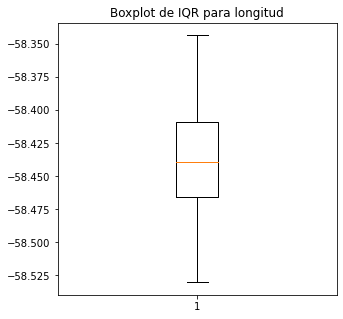

In [129]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

Los datos de latitud y longitud son dificiles de analizar por medio del rango intercuartil dado que los datos representan variaciones muy pequeñas y no son faciles de imaginar sin una ubicación en el mapa. Haremos este análisis más adelante.

In [130]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73288. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 74. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17707. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 22. Constituyen al 0% de los datos


#### Metodo Z score

In [131]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

Analisis de outliers con el metodo zscore para los ambientes

##### Ambientes

In [132]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para el caso de la variable Rooms

In [133]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 530. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 530. Constituyen al 2% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos


Aunque Zscore haya encontrado outliers, no consideramos que haya algun motivo valido para borrar estos datos. Por otro lado, corrimos Zscore modificado y despues de haber borrado los outliers por el metodo de IQR, no detecto ningun outlier. Proseguiremos sin borrar mas nada para rooms

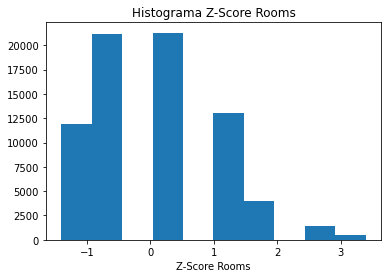

In [134]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

##### Habitaciones

In [135]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [136]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 646.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 646.Constituyen al 3% de los datos


id start_date   end_date    latitud   longitud  \
434905  q04gjvuiMZJQj+7X9e156w== 2021-08-25 2021-09-17 -34.598315 -58.447165   
67356   gMwMB0THqAyXnB3V+7MoqQ== 2021-08-02 2021-10-08 -34.601528 -58.425274   
271168  5ngfDx6EPiIw6lHKeMtl5Q== 2021-07-13 2021-07-17 -34.612324 -58.404356   
304245  WXz2pi1YIwA03HsXCDujgg== 2021-04-15 2021-04-30 -34.562479 -58.454001   
24504   DvGjYOb6ug2sWqy8NGXVSw== 2021-05-03 2021-06-05 -34.566206 -58.444766   
...                          ...        ...        ...        ...        ...   
196866  F6r22adsdlojU7cpXFVT1w== 2021-07-10 2021-08-05 -34.617743 -58.462173   
98636   fbkHJSzstPUbAVU5a4yrUw== 2021-02-19 2021-04-15 -34.637484 -58.460145   
114642  Wp7uojpeBF6gsygB4sE+Vw== 2021-12-07 2022-01-27 -34.536092 -58.467201   
336451  FlzfC9jJJq01vtNEXDc7XQ== 2021-07-21 2022-02-09 -34.601997 -58.383625   
225287  bIzBNE7gCXhwUftv44Rxzw== 2021-09-14 2022-01-27 -34.651411 -58.473591   

                 place_l3 property_type  property_rooms  property_bedrooms  \
434905       Villa Crespo            PH             6.0                5.0   
67356             Almagro  Departamento             7.0                6.0   
271168          Balvanera            PH             6.0                5.0   
304245           Belgrano  Departamento             6.0                5.0   
24504            Belgrano  Departamento             7.0                5.0   
...                   ...           ...             ...                ...   
196866             Flores          Casa             7.0                5.0   
98636    Parque Chacabuco          Casa             7.0                6.0   
114642              Nuñez          Casa             6.0                6.0   
336451        San Nicolás  Departamento             4.0                6.0   
225287  Parque Avellaneda          Casa             7.0                6.0   

        property_surface_total  property_surface_covered  property_price  \
434905                   140.0                     140.0        260000.0   
67356                    129.0                     129.0        250000.0   
271168                   310.0                     120.0        133000.0   
304245                   270.0                     240.0        720000.0   
24504                    350.0                     310.0       1700000.0   
...                        ...                       ...             ...   
196866                   306.0                     206.0        475000.0   
98636                    257.0                     226.0        205000.0   
114642                   240.0                     215.0        449000.0   
336451                   284.0                     284.0        560000.0   
225287                   257.0                     257.0        270000.0   

                                           property_title  z_property_bedrooms  
434905                 PH entrada independiente y terraza             3.303106  
67356                              Departamento - Almagro             4.354958  
271168     OPORTUNIDAD 2 PHS, Local y Terraza. Balvanera!             3.303106  
304245  Venta-Departamento -6 ambientes -Belgrano- 2 D...             3.303106  
24504                  11 de Septiembre  - Torre Aisenson             3.303106  
...                                                   ...                  ...  
196866  Fabulosa Casa de 306m2 en 2 plantas c/patio y ...             3.303106  
98636                                   Casa - Flores Sur             4.354958  
114642              CASA 6 AMBIENTES - NUÑEZ C/2 COCHERAS             4.354958  
336451  DEPTO LIBERTAD 500 #OPORTUNIDAD# 282 M2#4 COCH...             4.354958  
225287                 7 AMBIENTES O MAS | MEDINA al 1800             4.354958  

[646 rows x 14 columns]

In [137]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

Mismo caso que para los rooms, al haber borrado los outliers de bedrooms por el metodo IQR notamos que al correr Zscore modificado ya no hay outliers aunque Zscore si detecta algunos. No los eliminaremos porque tras analizar el dataset resultante no vemos ningun valor extraño en nuestro dominio.

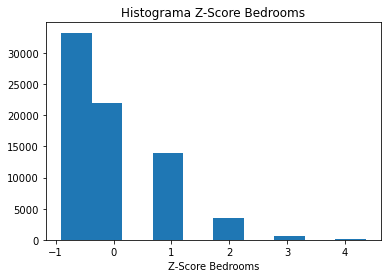

In [138]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

##### Superficie Total

In [139]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [140]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1799. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1799. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
7572    Ttm4g6wK/MyzY1k28uVVXQ== 2021-02-09 2021-07-06 -34.565616 -58.442047   
146122  ZxgLLwcw9EqRl6fM5k2/PA== 2021-08-30 2021-09-27 -34.610497 -58.360296   
271168  5ngfDx6EPiIw6lHKeMtl5Q== 2021-07-13 2021-07-17 -34.612324 -58.404356   
306529  z1zgrZ1Tll1zq3Z7wHX3fg== 2021-03-04 2021-03-12 -34.587805 -58.388887   
127707  v8BZQXSOC4h2QkeD2Z1gmg== 2021-10-05 2021-10-30 -34.612236 -58.484130   

                place_l3 property_type  property_rooms  property_bedrooms  \
7572            Belgrano  Departamento             6.0                4.0   
146122     Puerto Madero  Departamento             4.0                3.0   
271168         Balvanera            PH             6.0                5.0   
306529          Recoleta  Departamento             5.0                3.0   
127707  Villa Santa Rita            PH             5.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
7572                     289.0                     289.0        840000.0   
146122                   334.0                     334.0       3100000.0   
271168                   310.0                     120.0        133000.0   
306529                   335.0                     335.0       1900000.0   
127707                   306.0                     175.0        295000.0   

                                           property_title  \
7572    Depto en Torre - 6 amb - 290 m2 - 2 coch - Pis...   
146122  Venta Departamento Puerto Madero Renoir II 335...   
271168     OPORTUNIDAD 2 PHS, Local y Terraza. Balvanera!   
306529  VENTA piso ALTO en torre M.R.Alvarez!!  sobre ...   
127707         VENTA PH CON COCHERA TERRAZA PATIO QUINCHO   

        z_property_surface_total  
7572                    3.098962  
146122                  3.784853  
271168                  3.419045  
306529                  3.800096  
127707                  3.358077

In [141]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore como outliers son aquellas viviendas que tienen mas de 200 m^2 pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

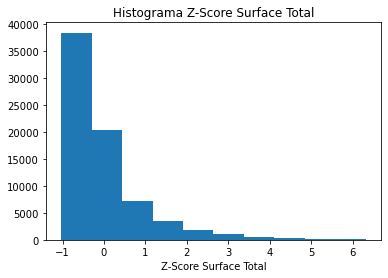

In [142]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

##### Superficie Cubierta

In [143]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [144]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1747. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1747. Constituyen al 9% de los datos


id start_date                      end_date  \
7572    Ttm4g6wK/MyzY1k28uVVXQ== 2021-02-09 2021-07-06 00:00:00.000000000   
146122  ZxgLLwcw9EqRl6fM5k2/PA== 2021-08-30 2021-09-27 00:00:00.000000000   
306529  z1zgrZ1Tll1zq3Z7wHX3fg== 2021-03-04 2021-03-12 00:00:00.000000000   
24504   DvGjYOb6ug2sWqy8NGXVSw== 2021-05-03 2021-06-05 00:00:00.000000000   
107980  054vuQryM25eXVKyoLypsw== 2021-07-16 2021-09-28 12:53:44.494712515   
...                          ...        ...                           ...   
225287  bIzBNE7gCXhwUftv44Rxzw== 2021-09-14 2022-01-27 00:00:00.000000000   
377936  fEcjPO27S/th3+QFvJuF6A== 2021-03-16 2021-06-05 00:00:00.000000000   
145415  plJnT5JxUBgO1nx1UAdw3g== 2021-08-30 2022-01-27 00:00:00.000000000   
181097  Z0i6u5oa2tdMYS9rvk2zDw== 2021-08-06 2022-02-24 00:00:00.000000000   
34505   4sVQHl4DXJCiHU0a1+G/Dg== 2021-02-08 2021-03-16 00:00:00.000000000   

          latitud   longitud           place_l3 property_type  property_rooms  \
7572   -34.565616 -58.442047           Belgrano  Departamento             6.0   
146122 -34.610497 -58.360296      Puerto Madero  Departamento             4.0   
306529 -34.587805 -58.388887           Recoleta  Departamento             5.0   
24504  -34.566206 -58.444766           Belgrano  Departamento             7.0   
107980 -34.555736 -58.441375           Belgrano          Casa             4.0   
...           ...        ...                ...           ...             ...   
225287 -34.651411 -58.473591  Parque Avellaneda          Casa             7.0   
377936 -34.589790 -58.383653           Recoleta  Departamento             5.0   
145415 -34.565317 -58.500107      Villa Urquiza          Casa             5.0   
181097 -34.617229 -58.492236           Floresta          Casa             5.0   
34505  -34.549231 -58.482091           Saavedra          Casa             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
7572                  4.0                   289.0                     289.0   
146122                3.0                   334.0                     334.0   
306529                3.0                   335.0                     335.0   
24504                 5.0                   350.0                     310.0   
107980                3.0                   490.0                     450.0   
...                   ...                     ...                       ...   
225287                6.0                   257.0                     257.0   
377936                4.0                   255.0                     250.0   
145415                3.0                   300.0                     300.0   
181097                4.0                   450.0                     450.0   
34505                 4.0                   300.0                     250.0   

        property_price                                     property_title  \
7572          840000.0  Depto en Torre - 6 amb - 290 m2 - 2 coch - Pis...   
146122       3100000.0  Venta Departamento Puerto Madero Renoir II 335...   
306529       1900000.0  VENTA piso ALTO en torre M.R.Alvarez!!  sobre ...   
24504        1700000.0                 11 de Septiembre  - Torre Aisenson   
107980       2500000.0  VENTA Casa  Lote 14x60 Sucre al 1000 - MODERNA...   
...                ...                                                ...   
225287        270000.0                 7 AMBIENTES O MAS | MEDINA al 1800   
377936       1100000.0  Piso único - 4 Dormitorios y 2 cocheras - Abso...   
145415        750000.0                       CASA 2 PLANTAS VILLA URQUIZA   
181097        550000.0                              Casa - Floresta Norte   
34505         550000.0       Casa 3/4 Dormitorios Play Gym Atelier Garage   

        z_property_surface_covered  
7572                      3.855403  
146122                    4.664254  
306529                    4.682228  
24504                     4.232866  
107980                    6.749292  
...                            ...  

In [145]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

Los outliers encontrados por Zscore son los valores que decidimos mantener. Se encuentran en el rango de > 200m^2 y < 500m^2. No eliminaremos nada. 

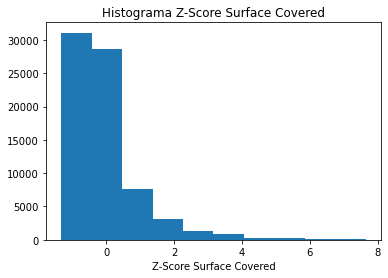

In [146]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

##### Latitud y Longitud

In [147]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [148]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 75. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 75. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
165717  9zJj0+ZbfAJK8Mt7P3jY2g== 2021-04-30 2021-05-24 -31.423033 -64.455957   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
190818  ErdmPyZQKoiOKda/Fp821A== 2021-11-01 2022-01-27 -31.361980 -64.340089   
102602  bYfttqSqZLfrjJGdlnQWUg== 2021-05-28 2021-06-05 -32.960197 -60.631355   
...                          ...        ...        ...        ...        ...   
190878  j+MfbNnRH6GO2I7e6hoBaQ== 2021-11-01 2022-01-27 -31.363175 -64.341195   
393091  Ve3P4+jsLB/c9cIZQ2VaQQ== 2021-02-13 2021-03-18 -33.081030 -68.468140   
32726   +FDpBzP4FF/KqX+qnnnbgA== 2021-02-08 2021-04-06 -33.060356 -68.479394   
232780  h53LQcerdkVflydy+Ycpag== 2021-03-20 2021-04-16 -33.081030 -68.468140   
102594  3Ev2cyd+v7SL0HgAq4h6eA== 2021-05-28 2021-06-05 -33.030773 -60.627277   

       place_l3 property_type  property_rooms  property_bedrooms  \
226093      NaN  Departamento             2.0                1.0   
165717      NaN          Casa             5.0                2.0   
107791      NaN          Casa             4.0                3.0   
190818      NaN          Casa             3.0                2.0   
102602      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
190878      NaN          Casa             3.0                2.0   
393091      NaN            PH             3.0                2.0   
32726       NaN            PH             2.0                1.0   
232780      NaN  Departamento             1.0                1.0   
102594      NaN  Departamento             5.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
226093                    51.0                      51.0         85000.0   
165717                   450.0                     450.0        420000.0   
107791                   180.0                     160.0        154000.0   
190818                   111.0                      98.0         69000.0   
102602                    60.0                      60.0         80000.0   
...                        ...                       ...             ...   
190878                   130.0                      87.0         50000.0   
393091                    44.0                      37.0         85000.0   
32726                     49.0                      49.0         57000.0   
232780                    42.0                      37.0         57900.0   
102594                   430.0                     430.0         73000.0   

                                           property_title  z_latitud  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  10.331398  
165717                 Casa de 3 Dorm. Barrio TIERRA ALTA  21.656407  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz   5.674829  
190818           Dúplex en Altos de la Calera - La Calera  22.073436  
102602              Departamento de 1 dormitorio en venta  11.156753  
...                                                   ...        ...  
190878             OPORTUNIDAD DUPLEX EN B° LOS PRADOS II  22.065272  
393091           RETASADO VENTA PH 3 AMB PATIO SAN MARTIN  10.331398  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA  10.472612  
232780  HERMOSO MONO A ESTRENAR,  AMENITIES, OPORTUNID...  10.331398  
102594                                 OPORTUNIDAD VENTA   10.674679  

[75 rows x 14 columns]

In [149]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 7. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 7. Constituyen al 0% de los datos


id start_date                      end_date  \
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 12:53:44.494712515   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
324200 -38.940227 -68.073865      NaN  Departamento             3.0   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
155333 -41.164123 -71.415420      NaN          Casa             3.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   
457631 -53.788624 -67.718089      NaN  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
106297                1.0                    53.0                      53.0   
324200                2.0                    55.0                      55.0   
105792                1.0                    53.0                      53.0   
155333                2.0                    70.0                      70.0   
10486                 3.0                   100.0                     100.0   
106288                1.0                    44.0                      44.0   
457631                2.0                   121.0                     100.0   

        property_price                                     property_title  \
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
324200        120000.0  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
155333        380000.0  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...   
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   
457631        375000.0                Depto 3 ambientes Arboris Las Lomas   

         z_latitud  
106297  -44.349254  
324200  -29.690066  
105792  -44.339332  
155333  -44.880473  
10486   -44.878440  
106288  -37.828624  
457631 -131.112595

Comprarandolo con los valores de lat/long del gráfico de CABA, podemos ver que los datos corresponden a valores que no están dentro del rango. Procederemos a eliminarlos en base al zscore.

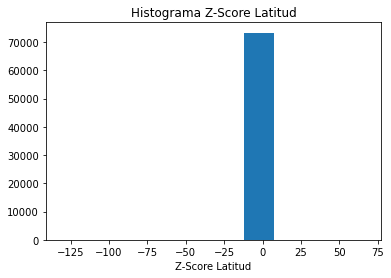

In [150]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [151]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
111540  EVfGYQs2brb9gmtGnPiecA== 2021-10-19 2022-04-20 -34.569243 -58.487512   
167194  tSlWj8phl1kcX1IXRGj//g== 2021-04-30 2021-06-05 -34.581909 -58.424620   
398794  AngC3iBNNDkz1nr17EyImg== 2021-02-13 2021-03-01 -34.612366 -58.443922   
233796  rPQc/mdlEjobdWNkHrZAjw== 2021-03-20 2021-04-16 -34.572798 -58.484835   
303005  c16Khtl1v+T2JL3WGyqZag== 2021-08-26 2021-09-20 -34.594763 -58.390187   

             place_l3 property_type  property_rooms  property_bedrooms  \
111540  Villa Urquiza  Departamento             2.0                1.0   
167194        Palermo  Departamento             3.0                2.0   
398794      Caballito  Departamento             4.0                3.0   
233796  Villa Urquiza  Departamento             3.0                2.0   
303005       Recoleta  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
111540                    45.0                      40.0        164000.0   
167194                   138.0                     129.0        550000.0   
398794                   127.0                     122.0        489000.0   
233796                    72.0                      67.0        180000.0   
303005                    41.0                      41.0        180000.0   

                                           property_title  z_latitud  
111540                       Departamento - Villa Urquiza   0.166102  
167194                       Departamento - Palermo Chico   0.079586  
398794         Torre Pileta Tenis Gym Amenities Caballito  -0.128451  
233796  VENTA DEPTO 3 AMB BALCON ,AMENITIES VILLA URQUIZA   0.141817  
303005  VENTA IQ RECOLETA  monoamb 41,80 m2 al cfte A ...  -0.008210

In [152]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 5. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 5. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   

       place_l3 property_type  property_rooms  property_bedrooms  \
134196      NaN          Casa             4.0                2.0   
241662      NaN          Casa             4.0                3.0   
234893      NaN  Departamento             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
220851      NaN          Casa             4.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
134196                   105.0                     105.0        200000.0   
241662                   230.0                     200.0        255000.0   
234893                    98.0                      88.0        269000.0   
405382                   205.0                     102.0        125000.0   
220851                   105.0                     105.0        190000.0   

                                           property_title  z_longitud  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.335410  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   17.942299  
234893  Venta departamento 4 amb Vicente Lopez con cochea   12.270432  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   17.942299  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.335410

In [153]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 75. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 75. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
165717  9zJj0+ZbfAJK8Mt7P3jY2g== 2021-04-30 2021-05-24 -31.423033 -64.455957   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
190818  ErdmPyZQKoiOKda/Fp821A== 2021-11-01 2022-01-27 -31.361980 -64.340089   
102602  bYfttqSqZLfrjJGdlnQWUg== 2021-05-28 2021-06-05 -32.960197 -60.631355   
...                          ...        ...        ...        ...        ...   
393091  Ve3P4+jsLB/c9cIZQ2VaQQ== 2021-02-13 2021-03-18 -33.081030 -68.468140   
32726   +FDpBzP4FF/KqX+qnnnbgA== 2021-02-08 2021-04-06 -33.060356 -68.479394   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 -53.788624 -67.718089   
232780  h53LQcerdkVflydy+Ycpag== 2021-03-20 2021-04-16 -33.081030 -68.468140   
102594  3Ev2cyd+v7SL0HgAq4h6eA== 2021-05-28 2021-06-05 -33.030773 -60.627277   

       place_l3 property_type  property_rooms  property_bedrooms  \
226093      NaN  Departamento             2.0                1.0   
165717      NaN          Casa             5.0                2.0   
107791      NaN          Casa             4.0                3.0   
190818      NaN          Casa             3.0                2.0   
102602      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
393091      NaN            PH             3.0                2.0   
32726       NaN            PH             2.0                1.0   
457631      NaN  Departamento             3.0                2.0   
232780      NaN  Departamento             1.0                1.0   
102594      NaN  Departamento             5.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
226093                    51.0                      51.0         85000.0   
165717                   450.0                     450.0        420000.0   
107791                   180.0                     160.0        154000.0   
190818                   111.0                      98.0         69000.0   
102602                    60.0                      60.0         80000.0   
...                        ...                       ...             ...   
393091                    44.0                      37.0         85000.0   
32726                     49.0                      49.0         57000.0   
457631                   121.0                     100.0        375000.0   
232780                    42.0                      37.0         57900.0   
102594                   430.0                     430.0         73000.0   

                                           property_title  z_longitud  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  -41.708125  
165717                 Casa de 3 Dorm. Barrio TIERRA ALTA  -25.012515  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz  -14.652423  
190818           Dúplex en Altos de la Calera - La Calera  -24.530361  
102602              Departamento de 1 dormitorio en venta   -9.097469  
...                                                   ...         ...  
393091           RETASADO VENTA PH 3 AMB PATIO SAN MARTIN  -41.708125  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA  -41.754955  
457631                Depto 3 ambientes Arboris Las Lomas  -38.586991  
232780  HERMOSO MONO A ESTRENAR,  AMENITIES, OPORTUNID...  -41.708125  
102594                                 OPORTUNIDAD VENTA    -9.080502  

[75 rows x 14 columns]

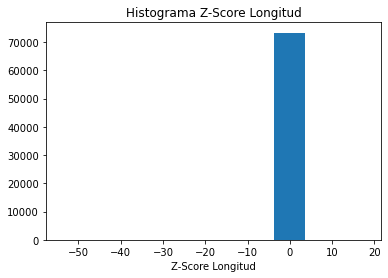

In [154]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

#### Metodo Z Score modificado

In [155]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

##### Ambientes

In [156]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para la variable Rooms en el zscore modificado

In [157]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [158]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

Notamos que despues de haber borrado los outliers por el metodo de IQR para rooms, no se detectan outliers por este metodo. Lo mas seguro es que hayan sido outliers compartidos, al borrarlos por un metodo la interseccion nos da vacio.

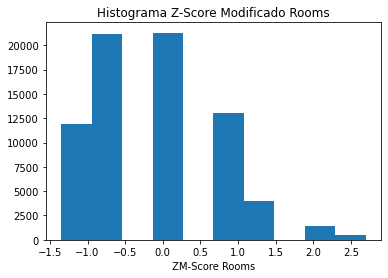

In [159]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

##### Habitaciones

In [160]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [161]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [162]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

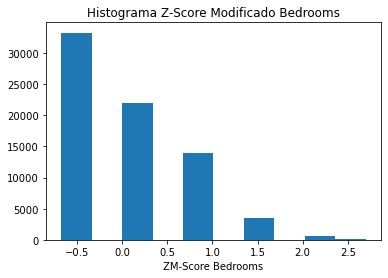

In [163]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

##### Superficie Total

In [164]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
111540  EVfGYQs2brb9gmtGnPiecA== 2021-10-19 2022-04-20 -34.569243 -58.487512   
167194  tSlWj8phl1kcX1IXRGj//g== 2021-04-30 2021-06-05 -34.581909 -58.424620   
398794  AngC3iBNNDkz1nr17EyImg== 2021-02-13 2021-03-01 -34.612366 -58.443922   
233796  rPQc/mdlEjobdWNkHrZAjw== 2021-03-20 2021-04-16 -34.572798 -58.484835   
303005  c16Khtl1v+T2JL3WGyqZag== 2021-08-26 2021-09-20 -34.594763 -58.390187   

             place_l3 property_type  property_rooms  property_bedrooms  \
111540  Villa Urquiza  Departamento             2.0                1.0   
167194        Palermo  Departamento             3.0                2.0   
398794      Caballito  Departamento             4.0                3.0   
233796  Villa Urquiza  Departamento             3.0                2.0   
303005       Recoleta  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
111540                    45.0                      40.0        164000.0   
167194                   138.0                     129.0        550000.0   
398794                   127.0                     122.0        489000.0   
233796                    72.0                      67.0        180000.0   
303005                    41.0                      41.0        180000.0   

                                           property_title  \
111540                       Departamento - Villa Urquiza   
167194                       Departamento - Palermo Chico   
398794         Torre Pileta Tenis Gym Amenities Caballito   
233796  VENTA DEPTO 3 AMB BALCON ,AMENITIES VILLA URQUIZA   
303005  VENTA IQ RECOLETA  monoamb 41,80 m2 al cfte A ...   

        zm_property_surface_total  
111540                  -0.533979  
167194                   2.079708  
398794                   1.770562  
233796                   0.224833  
303005                  -0.646396

Verificamos si se cumple la regla de oro para la variable sup total en el zscore modificado

In [165]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5444. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5444. Constituyen al 30% de los datos


id start_date   end_date    latitud   longitud  \
268145  T95t1OAcXT38Do7opJ7fOQ== 2021-07-09 2022-03-27 -34.611337 -58.473928   
170184  zq4GtijUBnRu6lXM3mmzwQ== 2021-07-28 2021-09-15 -34.562508 -58.449326   
7572    Ttm4g6wK/MyzY1k28uVVXQ== 2021-02-09 2021-07-06 -34.565616 -58.442047   
316622  19isXwrXahJisQl1e3jMpQ== 2021-09-29 2021-10-07 -34.566417 -58.447284   
403873  qJavtyjVvh8n2gAjMlowyw== 2021-08-13 2022-02-09 -34.551056 -58.488670   
...                          ...        ...        ...        ...        ...   
34505   4sVQHl4DXJCiHU0a1+G/Dg== 2021-02-08 2021-03-16 -34.549231 -58.482091   
200152  z6DGRVG1kPoN8T2StRP9MA== 2021-08-09 2021-09-29 -34.547964 -58.465092   
115511  KGeMhOETMop3WDjk8t+CTQ== 2021-12-07 2022-01-27 -34.586185 -58.468335   
192207  mRiaG4JziAe3+sM0hdEyKw== 2021-01-08 2021-01-09 -34.568959 -58.505912   
355464  /o+kdETSZGpSOI8IUbFTVQ== 2021-03-31 2021-04-15 -34.580723 -58.404424   

             place_l3 property_type  property_rooms  property_bedrooms  \
268145       Paternal  Departamento             4.0                3.0   
170184       Belgrano  Departamento             5.0                3.0   
7572         Belgrano  Departamento             6.0                4.0   
316622       Belgrano  Departamento             5.0                4.0   
403873       Saavedra          Casa             4.0                3.0   
...               ...           ...             ...                ...   
34505        Saavedra          Casa             7.0                4.0   
200152          Nuñez          Casa             4.0                3.0   
115511  Villa Ortuzar            PH             5.0                3.0   
192207  Villa Urquiza            PH             4.0                3.0   
355464        Palermo  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
268145                   206.0                     131.0        225000.0   
170184                   190.0                     185.0        550000.0   
7572                     289.0                     289.0        840000.0   
316622                   215.0                     184.0        549000.0   
403873                   234.0                     114.0        199000.0   
...                        ...                       ...             ...   
34505                    300.0                     250.0        550000.0   
200152                   249.0                     136.0        467000.0   
115511                   225.0                     159.0        295000.0   
192207                   215.0                     165.0        220000.0   
355464                   210.0                     210.0       1100000.0   

                                           property_title  \
268145  4 Ambientes con dep. y gran patio · Super lumi...   
170184  F VENTA TORRE EMBLEMATICA - 5 AMB CON DEPEND -...   
7572    Depto en Torre - 6 amb - 290 m2 - 2 coch - Pis...   
316622  Departamento - Belgrano Chico- Piso 5 Ambiente...   
403873                   VENDE CASA LOTE PROPIO 8.66 X 17   
...                                                   ...   
34505        Casa 3/4 Dormitorios Play Gym Atelier Garage   
200152  Venta- Casa  - 4 ambientes- Núñez- Terraza- pa...   
115511      EMPRENDIMIENTO PH 5 AMBIENTES - VILLA ARTUZAR   
192207   PH Venta 4 ambientes c/ escritorio Villa Urquiza   
355464  Libertador y Ocampo semipiso exclusivo al fren...   

        zm_property_surface_total  
268145                   3.990792  
170184                   3.541125  
7572                     6.323437  
316622                   4.243729  
403873                   4.777708  
...                           ...  
34505                    6.632583  
200152                   5.199271  
115511                   4.524771  
192207                   4.243729  
355464                   4.103208  

[5444 rows x 14 columns]

In [166]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore Modificado, asi como tambien el Zscore, son aquellas viviendas que tienen mas de 200 m^2 y menos de 500m^2pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

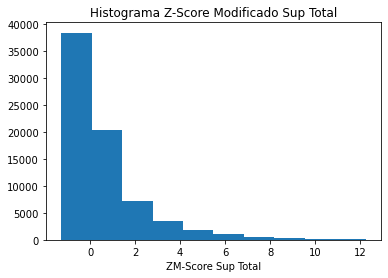

In [167]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

##### Superficie Cubierta

In [168]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

Verificamos si se cumple la regla de oro para la variable sup cubierta en el zscore modificado

In [169]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date                      end_date  \
459986  Pxz0dKZgWiL7odLclgK/vA== 2021-01-05 2021-03-20 12:53:44.494712515   
170184  zq4GtijUBnRu6lXM3mmzwQ== 2021-07-28 2021-09-15 00:00:00.000000000   
7572    Ttm4g6wK/MyzY1k28uVVXQ== 2021-02-09 2021-07-06 00:00:00.000000000   
316622  19isXwrXahJisQl1e3jMpQ== 2021-09-29 2021-10-07 00:00:00.000000000   
387017  4ydnPtLL837bZnwhSpAPAA== 2021-03-30 2021-04-15 00:00:00.000000000   
...                          ...        ...                           ...   
145415  plJnT5JxUBgO1nx1UAdw3g== 2021-08-30 2022-01-27 00:00:00.000000000   
181097  Z0i6u5oa2tdMYS9rvk2zDw== 2021-08-06 2022-02-24 00:00:00.000000000   
34505   4sVQHl4DXJCiHU0a1+G/Dg== 2021-02-08 2021-03-16 00:00:00.000000000   
192207  mRiaG4JziAe3+sM0hdEyKw== 2021-01-08 2021-01-09 00:00:00.000000000   
355464  /o+kdETSZGpSOI8IUbFTVQ== 2021-03-31 2021-04-15 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
459986 -34.613000 -58.362117  Puerto Madero  Departamento             3.0   
170184 -34.562508 -58.449326       Belgrano  Departamento             5.0   
7572   -34.565616 -58.442047       Belgrano  Departamento             6.0   
316622 -34.566417 -58.447284       Belgrano  Departamento             5.0   
387017 -34.623626 -58.479191       Floresta          Casa             4.0   
...           ...        ...            ...           ...             ...   
145415 -34.565317 -58.500107  Villa Urquiza          Casa             5.0   
181097 -34.617229 -58.492236       Floresta          Casa             5.0   
34505  -34.549231 -58.482091       Saavedra          Casa             7.0   
192207 -34.568959 -58.505912  Villa Urquiza            PH             4.0   
355464 -34.580723 -58.404424        Palermo  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
459986                2.0                   176.0                     163.0   
170184                3.0                   190.0                     185.0   
7572                  4.0                   289.0                     289.0   
316622                4.0                   215.0                     184.0   
387017                2.0                   180.0                     180.0   
...                   ...                     ...                       ...   
145415                3.0                   300.0                     300.0   
181097                4.0                   450.0                     450.0   
34505                 4.0                   300.0                     250.0   
192207                3.0                   215.0                     165.0   
355464                4.0                   210.0                     210.0   

        property_price                                     property_title  \
459986        790000.0             Departamento en venta en Puerto Madero   
170184        550000.0  F VENTA TORRE EMBLEMATICA - 5 AMB CON DEPEND -...   
7572          840000.0  Depto en Torre - 6 amb - 290 m2 - 2 coch - Pis...   
316622        549000.0  Departamento - Belgrano Chico- Piso 5 Ambiente...   
387017        470000.0                                    Casa - Floresta   
...                ...                                                ...   
145415        750000.0                       CASA 2 PLANTAS VILLA URQUIZA   
181097        550000.0                              Casa - Floresta Norte   
34505         550000.0       Casa 3/4 Dormitorios Play Gym Atelier Garage   
192207        220000.0   PH Venta 4 ambientes c/ escritorio Villa Urquiza   
355464       1100000.0  Libertador y Ocampo semipiso exclusivo al fren...   

        zm_property_surface_covered  
459986                     3.574850  
170184                     4.316800  
7572                       7.824200  
316622                     4.283075  
387017                     4.148175  
...                             ...  
145415                     8.195175  
18

In [170]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

Mismo caso que el explicado para Zscore, Zscore modificado esta tomando como outliers a las superificies cubiertas que estan entre 200 y 500 m^2, nosotros optamos por mantener este valor ya nos parece valido, no eliminaremos nada.

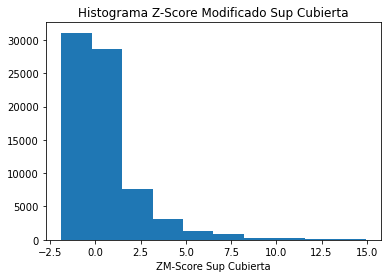

In [171]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

##### Latitud y longitud

In [172]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

Verificamos si se cumple la regla de oro para la variable latitud en el zscore modificado

In [173]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
165717  9zJj0+ZbfAJK8Mt7P3jY2g== 2021-04-30 2021-05-24 -31.423033 -64.455957   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
190818  ErdmPyZQKoiOKda/Fp821A== 2021-11-01 2022-01-27 -31.361980 -64.340089   
102602  bYfttqSqZLfrjJGdlnQWUg== 2021-05-28 2021-06-05 -32.960197 -60.631355   
...                          ...        ...        ...        ...        ...   
190878  j+MfbNnRH6GO2I7e6hoBaQ== 2021-11-01 2022-01-27 -31.363175 -64.341195   
393091  Ve3P4+jsLB/c9cIZQ2VaQQ== 2021-02-13 2021-03-18 -33.081030 -68.468140   
32726   +FDpBzP4FF/KqX+qnnnbgA== 2021-02-08 2021-04-06 -33.060356 -68.479394   
232780  h53LQcerdkVflydy+Ycpag== 2021-03-20 2021-04-16 -33.081030 -68.468140   
102594  3Ev2cyd+v7SL0HgAq4h6eA== 2021-05-28 2021-06-05 -33.030773 -60.627277   

       place_l3 property_type  property_rooms  property_bedrooms  \
226093      NaN  Departamento             2.0                1.0   
165717      NaN          Casa             5.0                2.0   
107791      NaN          Casa             4.0                3.0   
190818      NaN          Casa             3.0                2.0   
102602      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
190878      NaN          Casa             3.0                2.0   
393091      NaN            PH             3.0                2.0   
32726       NaN            PH             2.0                1.0   
232780      NaN  Departamento             1.0                1.0   
102594      NaN  Departamento             5.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
226093                    51.0                      51.0         85000.0   
165717                   450.0                     450.0        420000.0   
107791                   180.0                     160.0        154000.0   
190818                   111.0                      98.0         69000.0   
102602                    60.0                      60.0         80000.0   
...                        ...                       ...             ...   
190878                   130.0                      87.0         50000.0   
393091                    44.0                      37.0         85000.0   
32726                     49.0                      49.0         57000.0   
232780                    42.0                      37.0         57900.0   
102594                   430.0                     430.0         73000.0   

                                           property_title  zm_latitud  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...   53.645059  
165717                 Casa de 3 Dorm. Barrio TIERRA ALTA  112.379984  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz   29.494685  
190818           Dúplex en Altos de la Calera - La Calera  114.542822  
102602              Departamento de 1 dormitorio en venta   57.925603  
...                                                   ...         ...  
190878             OPORTUNIDAD DUPLEX EN B° LOS PRADOS II  114.500482  
393091           RETASADO VENTA PH 3 AMB PATIO SAN MARTIN   53.645059  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA   54.377440  
232780  HERMOSO MONO A ESTRENAR,  AMENITIES, OPORTUNID...   53.645059  
102594                                 OPORTUNIDAD VENTA    55.425418  

[75 rows x 14 columns]

In [174]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 14. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 14. Constituyen al 0% de los datos


id start_date                      end_date  \
270589  tQfZpYXLoOwWd990nrLpBg== 2021-07-13 2021-10-16 00:00:00.000000000   
171545  2IMMhWMUVZd6htI0Xo9m8Q== 2021-04-19 2021-06-05 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
351916  BKk+pz+G7Tajvr6LE+9UZw== 2021-06-25 2021-07-17 00:00:00.000000000   
208451  r5h8YGMTL3OG6u8wekYDWg== 2021-02-01 2021-05-02 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 12:53:44.494712515   
411779  jt4VEm3y2Ktb573eFDHQUw== 2021-03-02 2021-03-12 00:00:00.000000000   
271609  pMxqmA1WxzslUoiQPG4qFg== 2021-06-19 2021-07-05 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   

          latitud   longitud         place_l3 property_type  property_rooms  \
270589 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
171545 -34.694322 -58.469549     Villa Lugano            PH             3.0   
106297 -41.086352 -71.185720              NaN  Departamento             2.0   
351916 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
208451 -34.694366 -58.468208     Villa Lugano  Departamento             2.0   
324200 -38.940227 -68.073865              NaN  Departamento             3.0   
105792 -41.084900 -71.187159              NaN  Departamento             1.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
155333 -41.164123 -71.415420              NaN          Casa             3.0   
10486  -41.163826 -71.438923              NaN          Casa             4.0   
411779 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
271609 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
106288 -40.131723 -71.299436              NaN  Departamento             2.0   
457631 -53.788624 -67.718089              NaN  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
270589                2.0                    70.0                      50.0   
171545                2.0                    70.0                      70.0   
106297                1.0                    53.0                      53.0   
351916                1.0                    72.0                      72.0   
208451                1.0                    74.0                      42.0   
324200                2.0                    55.0                      55.0   
105792                1.0                    53.0                      53.0   
250707                3.0                    91.0                      79.0   
155333                2.0                    70.0                      70.0   
10486                 3.0                   100.0                     100.0   
411779                3.0                    91.0                      79.0   
271609                2.0                    70.0                      50.0   
106288                1.0                    44.0                      44.0   
457631                2.0                   121.0                     100.0   

        property_price                                     property_title  \
270589         69000.0                                Casa - Villa Lugano   
171545        229000.0                                  PH - Villa Lugano   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
351916        149000.0  Casa LUG 2 Ambientes amplios-  IDEAL CONSTRUCT...   
208451        118000.0  Se vende departamento 2 ambientes con patio y ...   
324200        120000.0  DEPTO 2 DORM EN 

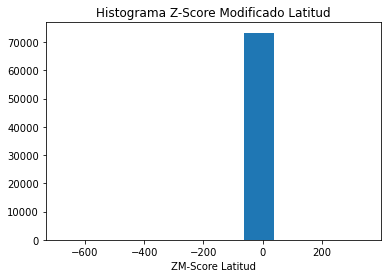

In [175]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [176]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

Verificamos si se cumple la regla de oro para la variable longitud en el zscore modificado

In [177]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   

       place_l3 property_type  property_rooms  property_bedrooms  \
134196      NaN          Casa             4.0                2.0   
241662      NaN          Casa             4.0                3.0   
234893      NaN  Departamento             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
220851      NaN          Casa             4.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
134196                   105.0                     105.0        200000.0   
241662                   230.0                     200.0        255000.0   
234893                    98.0                      88.0        269000.0   
405382                   205.0                     102.0        125000.0   
220851                   105.0                     105.0        190000.0   

                                           property_title  zm_longitud  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.364453  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.841223  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.967486  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   103.841223  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.364453

In [178]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 77. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 77. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
165717  9zJj0+ZbfAJK8Mt7P3jY2g== 2021-04-30 2021-05-24 -31.423033 -64.455957   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
190818  ErdmPyZQKoiOKda/Fp821A== 2021-11-01 2022-01-27 -31.361980 -64.340089   
102602  bYfttqSqZLfrjJGdlnQWUg== 2021-05-28 2021-06-05 -32.960197 -60.631355   
...                          ...        ...        ...        ...        ...   
393091  Ve3P4+jsLB/c9cIZQ2VaQQ== 2021-02-13 2021-03-18 -33.081030 -68.468140   
32726   +FDpBzP4FF/KqX+qnnnbgA== 2021-02-08 2021-04-06 -33.060356 -68.479394   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 -53.788624 -67.718089   
232780  h53LQcerdkVflydy+Ycpag== 2021-03-20 2021-04-16 -33.081030 -68.468140   
102594  3Ev2cyd+v7SL0HgAq4h6eA== 2021-05-28 2021-06-05 -33.030773 -60.627277   

       place_l3 property_type  property_rooms  property_bedrooms  \
226093      NaN  Departamento             2.0                1.0   
165717      NaN          Casa             5.0                2.0   
107791      NaN          Casa             4.0                3.0   
190818      NaN          Casa             3.0                2.0   
102602      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
393091      NaN            PH             3.0                2.0   
32726       NaN            PH             2.0                1.0   
457631      NaN  Departamento             3.0                2.0   
232780      NaN  Departamento             1.0                1.0   
102594      NaN  Departamento             5.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
226093                    51.0                      51.0         85000.0   
165717                   450.0                     450.0        420000.0   
107791                   180.0                     160.0        154000.0   
190818                   111.0                      98.0         69000.0   
102602                    60.0                      60.0         80000.0   
...                        ...                       ...             ...   
393091                    44.0                      37.0         85000.0   
32726                     49.0                      49.0         57000.0   
457631                   121.0                     100.0        375000.0   
232780                    42.0                      37.0         57900.0   
102594                   430.0                     430.0         73000.0   

                                           property_title  zm_longitud  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  -241.888369  
165717                 Casa de 3 Dorm. Barrio TIERRA ALTA  -145.121809  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz   -85.075455  
190818           Dúplex en Altos de la Calera - La Calera  -142.327278  
102602              Departamento de 1 dormitorio en venta   -52.879338  
...                                                   ...          ...  
393091           RETASADO VENTA PH 3 AMB PATIO SAN MARTIN  -241.888369  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA  -242.159795  
457631                Depto 3 ambientes Arboris Las Lomas  -223.798500  
232780  HERMOSO MONO A ESTRENAR,  AMENITIES, OPORTUNID...  -241.888369  
102594                                 OPORTUNIDAD VENTA    -52.780998  

[77 rows x 14 columns]

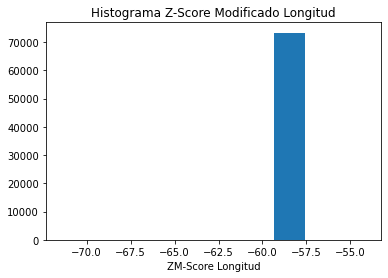

In [179]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

### Multivariados

#### Clustering - Mahalanobis

In [180]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X


In [181]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [182]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

##### Analisis entre ambientes y habitaciones de valores atipicos

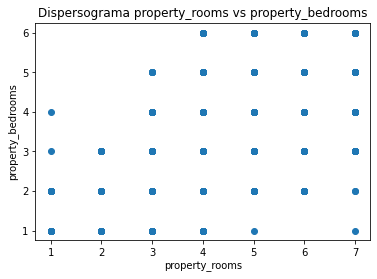

In [183]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

Parecerían exisitir algunas observaciones anómalas. Vamos a calcular la distancia de mahalanobis para cada observación.

In [184]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
111540             2.0                1.0     1.133362
167194             3.0                2.0     0.039697
398794             4.0                3.0     1.490150
233796             3.0                2.0     0.039697
303005             1.0                1.0     3.101349

Tenemos que seleccionar un valor umbral para definir qué observaciones podrían ser anómalas según la distancia de mahalanobis.

<AxesSubplot:ylabel='mahalanobis'>

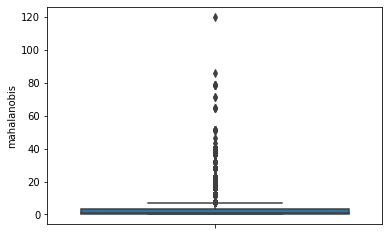

In [185]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

Seleccionamos 35 como valor umbral

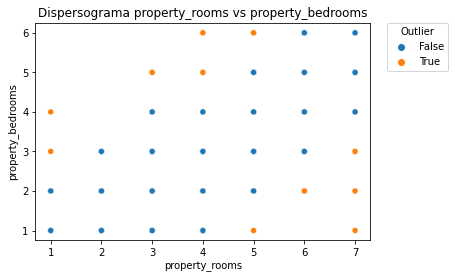

Los outliers para mahalanobis con un umbral de 35 son: 153. Constituyen el 0% de los datos


In [186]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot:ylabel='mahalanobis'>

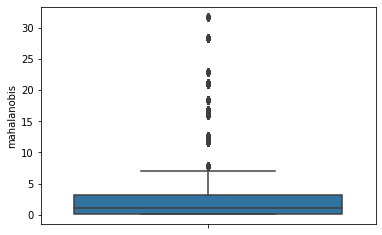

In [187]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [188]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
366235             7.0                3.0    36.617606
150144             3.0                5.0    64.554802
29406              4.0                5.0    38.464986
413697             7.0                3.0    36.617606
411229             7.0                1.0   119.983692
...                ...                ...          ...
415478             7.0                3.0    36.617606
306546             7.0                3.0    36.617606
434199             7.0                3.0    36.617606
173884             7.0                3.0    36.617606
336451             4.0                6.0    78.859951

[153 rows x 3 columns]

Como podemos observar en el scatter plot, quedan bien marcados los outliers que en nuestro dominio de problema no tienen ningun sentido.
Por ejemplo, tener 7 ambientes y 1 habitacion...
Procederemos a eliminar estos outliers.

###### Eliminamos dichas observaciones

In [189]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 153 registros en train
Se han eliminado: 32 registros en test


Dispersograma sin los outliers mencionados


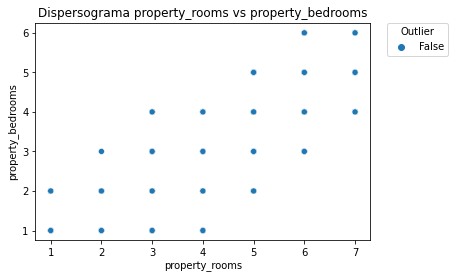

In [190]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

##### Analisis entre superficie total y superificie cubierta de valores atipicos

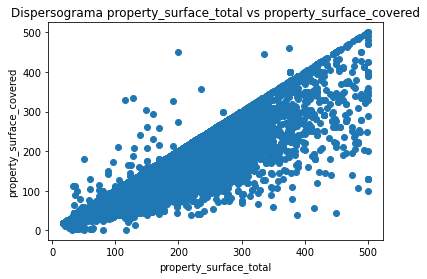

In [191]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [192]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
111540                    45.0                      40.0     0.388408
167194                   138.0                     129.0     1.081247
398794                   127.0                     122.0     1.000693
233796                    72.0                      67.0     0.080514
303005                    41.0                      41.0     0.476115

<AxesSubplot:ylabel='mahalanobis'>

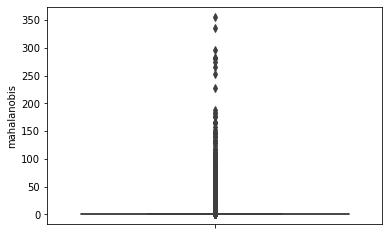

In [193]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [194]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [195]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
310407                   388.0                      38.0   265.752916
121279                   500.0                     130.0   281.277841
45540                    420.0                     120.0   182.160509
97055                    500.0                     130.0   281.277841
138208                   500.0                     100.0   336.149065
430838                   350.0                      60.0   177.527173
445383                   500.0                     130.0   281.277841
97083                    500.0                     130.0   281.277841
61175                    500.0                     200.0   175.012675
104592                   200.0                     450.0   252.225072
32735                    485.0                     108.0   295.970022
393711                   414.0                      56.0   274.733914
52066                    380.0                      80.0   187.381294
387598                   475.0                     140.0   227.146225
450430                   442.0                     140.0   182.509279
52468                    450.0                      45.0   356.081454

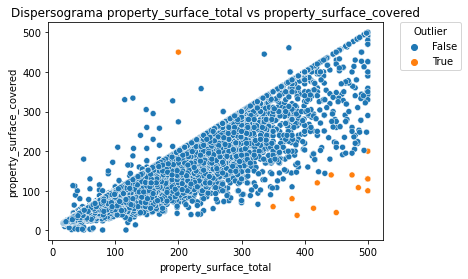

In [196]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

###### Como podemos observar, con mahalanobis pudimos detectar dos escenarios de outliers. Son outliers aquellas viviendas que tengan una superificie cubierta > superificie total Y son outliers tambien aquellas viviendas que tengan una brecha importante entre la superificie total y la cubierta. Por ejemplo: $380 m^2$ de total VS $80 m^2$ de cubierta. Procederemos a eliminarlos.

In [197]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 16 registros en train
Se han eliminado: 2 registros en test


Dispersograma sin los outliers mencionados


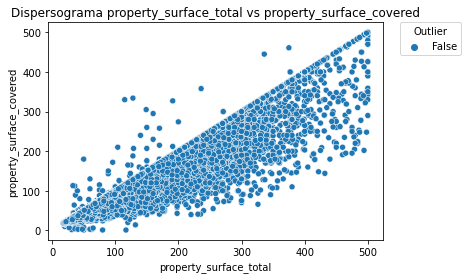

In [198]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

##### Analisis entre latitud y logitud de valores atipicos

In [199]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')


In [200]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 1.0025452732303124


latitud   longitud   mahalanobis
292653 -34.687852 -58.471449      1.067755
436685 -34.678140 -58.491288      1.045042
226093 -33.081030 -68.468140   2346.986683
165717 -31.423033 -64.455957    784.695282
174545 -34.688188 -58.480641      1.153172
...           ...        ...           ...
32726  -33.060356 -68.479394   2344.653411
324512 -34.693145 -58.470972      1.172297
457631 -53.788624 -67.718089  49962.364385
232780 -33.081030 -68.468140   2346.986683
102594 -33.030773 -60.627277    147.580904

[230 rows x 3 columns]

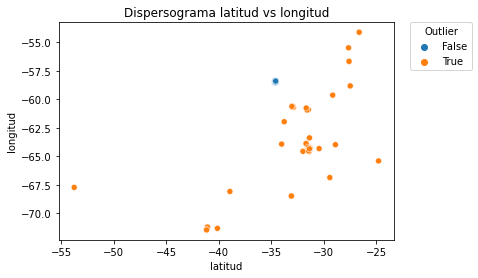

El grafico muestra 230 outliers
El mínimo según el umbral es de: 1.0025452732303124


In [201]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


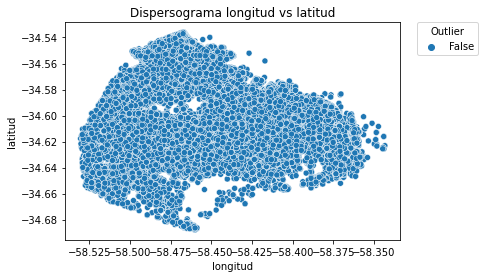

In [202]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

A simple vista se nota como el dispersograma cambió mucho y ahora se parece un poco a CABA. Notar además que tomamos como umbral 1 y sin embargo el valor mínimo de la distancia de estos outliers era de 106.

Como estos 1684 outliers tienen valores demasiado alejados del dataset, procederemos a borrarlos

In [203]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 230 registros en train
Se han eliminado: 27 registros en test


Ahora que eliminamos los outliers de latitud y longitud, eliminaremos los datos nulos de place_l3.

In [204]:
ds_train.place_l3.isna().sum()

43

In [205]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

#### Analisis entre superficie total y precio

In [206]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    72920.000000
mean         1.403003
std         18.924221
min          0.000067
25%          0.137790
50%          0.351854
75%          0.631180
max       4860.216220
Name: mahalanobis, dtype: float64

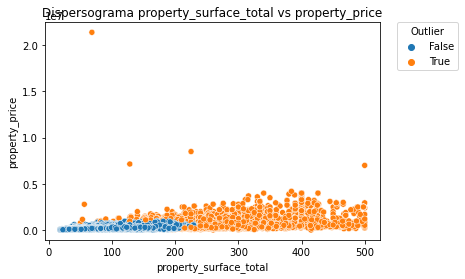

El grafico muestra 3903 outliers
El mínimo según el umbral es de: 5.00138997980581
Los outliers representan un 5.352441031267142%


In [207]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot:ylabel='mahalanobis'>

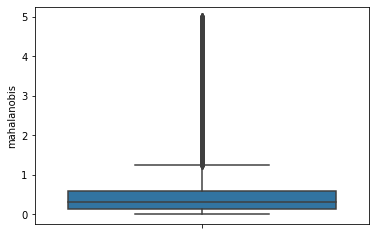

In [208]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

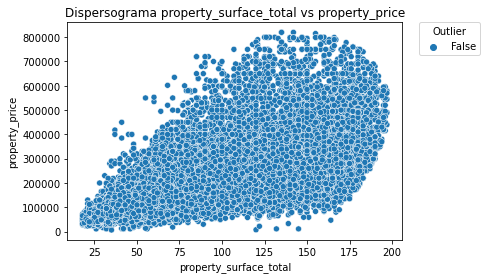

In [209]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

No llegamos a una buena conclusión para decidir el umbral por lo que tomaremos otro camino. Investigaremos acerca del precio por $m^2$ y realizaremos un análisis con el método de IQR sobre eso.

In [210]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 72920
outliers encontrados para los price_m2: 3384
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4279.545454545454, limite inf: 334.09090909090924


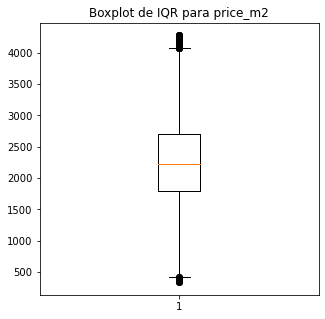

cantidad de datos del ds: 17668
outliers encontrados para los price_m2: 828
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4264.591063698207, limite inf: 329.9899505256644


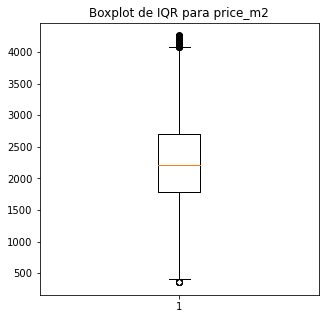

In [211]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3355 registros en train por encima del límite superior en train (4.600932528798683)
Hay 29 registros en train por debajo del límite inferior en train  (0.03976961053208996)
Hay 812 registros en train por encima del límite superior en train (1.113549094898519)%
Hay 9 registros en train por debajo del límite inferior en train  (0.012342292923752057%)


Text(0.5, 1.0, 'Distribución sin outliers')

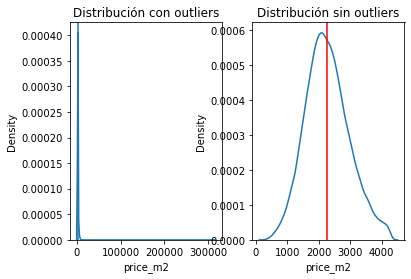

In [212]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

Como podemos ver, quitar estos outliers nos acerca el grafico a algo parecido a una distribución normal. Procederemos a borrar tanto los outliers superiores como inferiores.

In [213]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3355 registros en train
Se han eliminado: 812 registros en test


In [214]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 29 registros en train
Se han eliminado: 9 registros en test


#### LOF

In [215]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [216]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [217]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

##### Analisis de outliers para ambientes y habitaciones

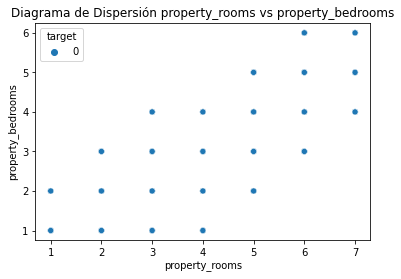

In [218]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [219]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date   end_date    latitud   longitud  \
111540  EVfGYQs2brb9gmtGnPiecA== 2021-10-19 2022-04-20 -34.569243 -58.487512   
167194  tSlWj8phl1kcX1IXRGj//g== 2021-04-30 2021-06-05 -34.581909 -58.424620   
398794  AngC3iBNNDkz1nr17EyImg== 2021-02-13 2021-03-01 -34.612366 -58.443922   
233796  rPQc/mdlEjobdWNkHrZAjw== 2021-03-20 2021-04-16 -34.572798 -58.484835   
434905  q04gjvuiMZJQj+7X9e156w== 2021-08-25 2021-09-17 -34.598315 -58.447165   
...                          ...        ...        ...        ...        ...   
162330  sfAfqnPZg2Cw2sKZpQij7g== 2021-10-07 2021-12-11 -34.592170 -58.398175   
301274  atNIB4cwaevK/uPqqlBi9Q== 2021-08-10 2022-02-09 -34.615445 -58.470933   
378238  7DKEsNa5nr7ZWdem4wItCw== 2021-03-16 2021-03-26 -34.593631 -58.435969   
257084  w+y6rMpPnoGzNV+4vK6lbg== 2021-11-03 2022-02-20 -34.594323 -58.399005   
96778   UJTEkmcC1mE3VAA/mkRsSw== 2021-07-02 2021-07-03 -34.571194 -58.477762   

                   place_l3 property_type  property_rooms  property_bedrooms  \
111540        Villa Urquiza  Departamento             2.0                1.0   
167194              Palermo  Departamento             3.0                2.0   
398794            Caballito  Departamento             4.0                3.0   
233796        Villa Urquiza  Departamento             3.0                2.0   
434905         Villa Crespo            PH             6.0                5.0   
...                     ...           ...             ...                ...   
162330             Recoleta  Departamento             2.0                1.0   
301274  Villa General Mitre            PH             3.0                2.0   
378238         Villa Crespo  Departamento             1.0                1.0   
257084             Recoleta  Departamento             3.0                2.0   
96778         Villa Urquiza  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
111540                    45.0                      40.0        164000.0   
167194                   138.0                     129.0        550000.0   
398794                   127.0                     122.0        489000.0   
233796                    72.0                      67.0        180000.0   
434905                   140.0                     140.0        260000.0   
...                        ...                       ...             ...   
162330                    32.0                      27.0         95000.0   
301274                   107.0                      73.0        120000.0   
378238                    41.0                      37.0         86655.0   
257084                    68.0                      68.0        185000.0   
96778                     82.0                      74.0        178000.0   

                                           property_title  target  scores  
111540                       Departamento - Villa Urquiza       0    -1.0  
167194                       Departamento - Palermo Chico       0    -1.0  
398794         Torre Pileta Tenis Gym Amenities Caballito       0    -1.0  
233796  VENTA DEPTO 3 AMB BALCON ,AMENITIES VILLA URQUIZA       0    -1.0  
434905                 PH entrada independiente y terraza       0    -1.0  
...                                                   ...     ...     ...  
162330  U$S 95.000 - 2 amb - Recoleta - Azcuénaga 1400...       0    -1.0  
301274  ARTIGAS Y GALICIA PH 3AMB CON PATIO A REFACCIO...       0    -1.0  
378238  Venta - Monoambiente con Balcón al frente -  V...       0    -1.0  
257084                                  1 - Arenales 2200       0    -1.0  
96778       VENTA DEPTO 3 AMB LAVADERO 80 MTS  V. URQUIZA       0    -1.0  

[69536 rows x 15 columns]

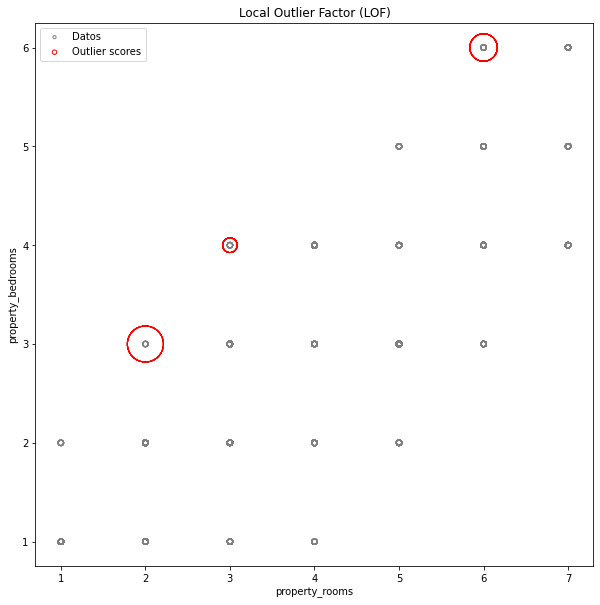

In [ ]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

Como podemos observar, LOF parece estar marcandonos 3 outliers. Pareceria estar cumpliendo que un ambiente no puede ser mayor o igual al numero de habitaciones. No vimos un patro grande en el dataset que se rija bajo este criterio asi que en prinicpio no vamos a tomar accion al respecto. Lo grueso fue eliminado con mahalanobis.

##### Analisis de outliers para superficie total y superficie cubierta

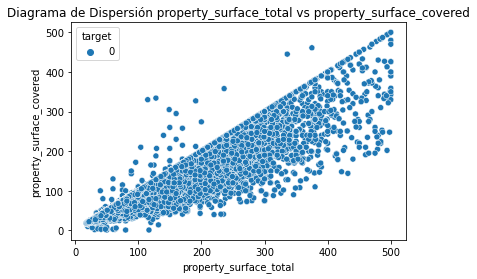

In [221]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [222]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date   end_date    latitud   longitud  \
111540  EVfGYQs2brb9gmtGnPiecA== 2021-10-19 2022-04-20 -34.569243 -58.487512   
167194  tSlWj8phl1kcX1IXRGj//g== 2021-04-30 2021-06-05 -34.581909 -58.424620   
398794  AngC3iBNNDkz1nr17EyImg== 2021-02-13 2021-03-01 -34.612366 -58.443922   
233796  rPQc/mdlEjobdWNkHrZAjw== 2021-03-20 2021-04-16 -34.572798 -58.484835   
434905  q04gjvuiMZJQj+7X9e156w== 2021-08-25 2021-09-17 -34.598315 -58.447165   
...                          ...        ...        ...        ...        ...   
162330  sfAfqnPZg2Cw2sKZpQij7g== 2021-10-07 2021-12-11 -34.592170 -58.398175   
301274  atNIB4cwaevK/uPqqlBi9Q== 2021-08-10 2022-02-09 -34.615445 -58.470933   
378238  7DKEsNa5nr7ZWdem4wItCw== 2021-03-16 2021-03-26 -34.593631 -58.435969   
257084  w+y6rMpPnoGzNV+4vK6lbg== 2021-11-03 2022-02-20 -34.594323 -58.399005   
96778   UJTEkmcC1mE3VAA/mkRsSw== 2021-07-02 2021-07-03 -34.571194 -58.477762   

                   place_l3 property_type  property_rooms  property_bedrooms  \
111540        Villa Urquiza  Departamento             2.0                1.0   
167194              Palermo  Departamento             3.0                2.0   
398794            Caballito  Departamento             4.0                3.0   
233796        Villa Urquiza  Departamento             3.0                2.0   
434905         Villa Crespo            PH             6.0                5.0   
...                     ...           ...             ...                ...   
162330             Recoleta  Departamento             2.0                1.0   
301274  Villa General Mitre            PH             3.0                2.0   
378238         Villa Crespo  Departamento             1.0                1.0   
257084             Recoleta  Departamento             3.0                2.0   
96778         Villa Urquiza  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
111540                    45.0                      40.0        164000.0   
167194                   138.0                     129.0        550000.0   
398794                   127.0                     122.0        489000.0   
233796                    72.0                      67.0        180000.0   
434905                   140.0                     140.0        260000.0   
...                        ...                       ...             ...   
162330                    32.0                      27.0         95000.0   
301274                   107.0                      73.0        120000.0   
378238                    41.0                      37.0         86655.0   
257084                    68.0                      68.0        185000.0   
96778                     82.0                      74.0        178000.0   

                                           property_title  target    scores  
111540                       Departamento - Villa Urquiza       0 -1.000000  
167194                       Departamento - Palermo Chico       0 -1.019267  
398794         Torre Pileta Tenis Gym Amenities Caballito       0 -0.981433  
233796  VENTA DEPTO 3 AMB BALCON ,AMENITIES VILLA URQUIZA       0 -1.000000  
434905                 PH entrada independiente y terraza       0 -1.000000  
...                                                   ...     ...       ...  
162330  U$S 95.000 - 2 amb - Recoleta - Azcuénaga 1400...       0 -1.000000  
301274  ARTIGAS Y GALICIA PH 3AMB CON PATIO A REFACCIO...       0 -1.004775  
378238  Venta - Monoambiente con Balcón al frente -  V...       0 -1.000000  
257084                                  1 - Arenales 2200       0 -1.000000  
96778       VENTA DEPTO 3 AMB LAVADERO 80 MTS  V. URQUIZA       0 -1.000000  

[69536 rows x 15 columns]

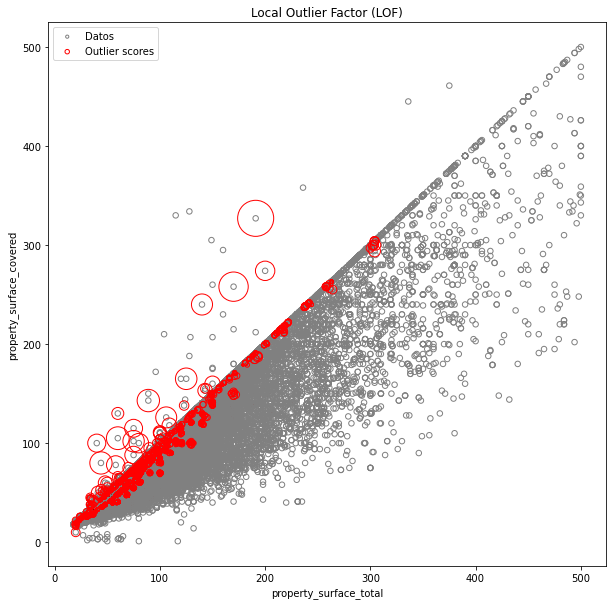

In [223]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

Como vemos en el grafico de LOF pareceria que la superifice total no puede ser exactamente igual a la superificie cubierta, por eso la deteccion de outiers a lo largo de la recta con pendiente creciente. Como no tenemos especificaciones tecnicas de cuantos metros menos deberia tener una superificie cubierta con respecto a la total, no vamos a tocar los datos.

#### Isolation Forest

##### Analisis de outliers para ambientes y habitaciones

In [224]:
rooms_bedrooms_iforest = ds_train[['property_rooms', 'property_bedrooms']]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_rooms'].isna())]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_bedrooms'].isna())]

iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=2,
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(rooms_bedrooms_iforest)
#Almaceno scores y etiquetas
rooms_bedrooms_iforest['scores'] = iforest.decision_function(rooms_bedrooms_iforest)
rooms_bedrooms_iforest['outlier_label'] = pred

#Observaciones anómalas
rooms_bedrooms_iforest[rooms_bedrooms_iforest.outlier_label == -1]

property_rooms  property_bedrooms    scores  outlier_label
434905             6.0                5.0 -0.147194             -1
7572               6.0                4.0 -0.070588             -1
93156              3.0                1.0 -0.051999             -1
209434             3.0                1.0 -0.051999             -1
387017             4.0                2.0 -0.041779             -1
...                ...                ...       ...            ...
275013             4.0                2.0 -0.041779             -1
95069              4.0                2.0 -0.041779             -1
225287             7.0                6.0 -0.182565             -1
327799             4.0                2.0 -0.041779             -1
34505              7.0                4.0 -0.125783             -1

[3250 rows x 4 columns]

In [225]:
rooms_bedrooms_iforest.outlier_label.value_counts()

 1    66286
-1     3250
Name: outlier_label, dtype: int64

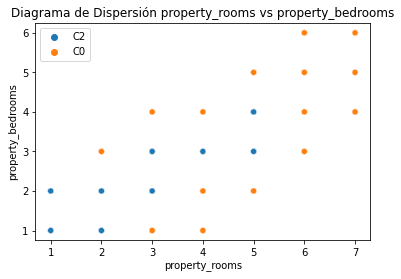

In [226]:
#Grafico dispersograma
color = [f"C{n + 1}" for n in (rooms_bedrooms_iforest['outlier_label'].values)]

sns.scatterplot(x=rooms_bedrooms_iforest['property_rooms'], y=rooms_bedrooms_iforest['property_bedrooms'], hue=color)
plt.title('Diagrama de Dispersión property_rooms vs property_bedrooms')
plt.show()

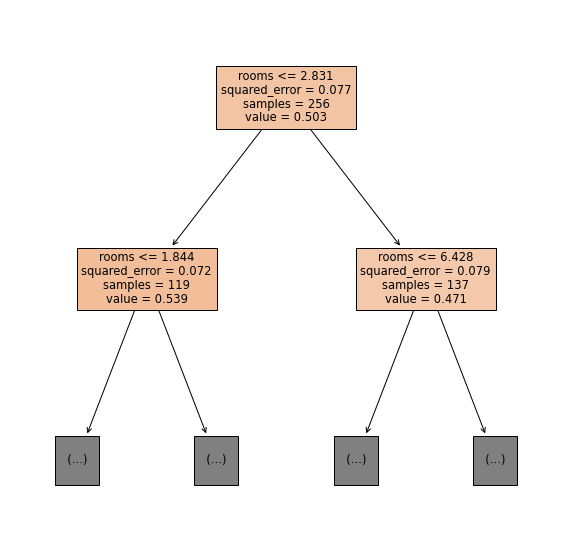

In [227]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['rooms', 'bedrooms'], filled=True, max_depth=1)
plt.show()

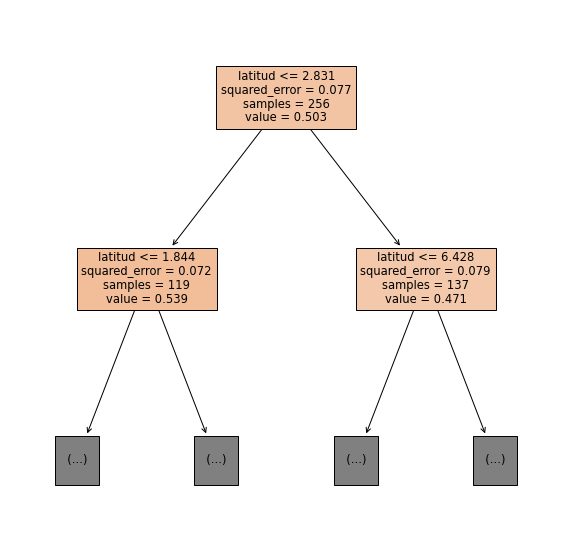

In [228]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['latitud', 'longitud'], filled=True, max_depth=1)
plt.show()

Habiendo hecho el análisis de valores atípicos y las imputaciones necesarias, finalmente eliminamos la columna id que usamos para hacer algunos merges.

In [229]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

## Reduccion de la Dimensionalidad

### Analisis PCA

Para poder realizar el análisis PCA del dataset es necesario que todos los campos sean numéricos.
Vamos a deshacernos de las siguientes columnas:
- ID: no aporta información
- Fechas y título: no pueden adaptarse a un formato numérico
- place_l3: es información redundante cuando tenemos latitud y longitud.
- property_price: es la variable que queremos predecir


In [230]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
111540 -34.569243 -58.487512             2.0                1.0   
167194 -34.581909 -58.424620             3.0                2.0   
398794 -34.612366 -58.443922             4.0                3.0   
233796 -34.572798 -58.484835             3.0                2.0   
434905 -34.598315 -58.447165             6.0                5.0   
...           ...        ...             ...                ...   
162330 -34.592170 -58.398175             2.0                1.0   
301274 -34.615445 -58.470933             3.0                2.0   
378238 -34.593631 -58.435969             1.0                1.0   
257084 -34.594323 -58.399005             3.0                2.0   
96778  -34.571194 -58.477762             3.0                2.0   

        property_surface_total  property_surface_covered  
111540                    45.0                      40.0  
167194                   138.0                     129.0  
398794                   127.0                     122.0  
233796                    72.0                      67.0  
434905                   140.0                     140.0  
...                        ...                       ...  
162330                    32.0                      27.0  
301274                   107.0                      73.0  
378238                    41.0                      37.0  
257084                    68.0                      68.0  
96778                     82.0                      74.0  

[69536 rows x 6 columns]

In [231]:
ds_reducido.shape

(69536, 6)

Procedemos ahora a normalizar las columnas del dataframe

In [232]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0      1.031948 -1.273864       -0.586333          -0.890013   
1      0.545672  0.412986        0.227042           0.175166   
2     -0.623641 -0.104725        1.040418           1.240344   
3      0.895452 -1.202065        0.227042           0.175166   
4     -0.084168 -0.191712        2.667169           3.370700   
...         ...       ...             ...                ...   
69531  0.151721  1.122292       -0.586333          -0.890013   
69532 -0.741854 -0.829197        0.227042           0.175166   
69533  0.095630  0.108585       -1.399709          -0.890013   
69534  0.069071  1.100034        0.227042           0.175166   
69535  0.957041 -1.012359        0.227042           0.175166   

       property_surface_total  property_surface_covered  
0                   -0.610619                 -0.618557  
1                    0.916782                  1.155030  
2                    0.736121                  1.015534  
3                   -0.167180                 -0.080502  
4                    0.949629                  1.374237  
...                       ...                       ...  
69531               -0.824126                 -0.877620  
69532                0.407648                  0.039065  
69533               -0.676313                 -0.678340  
69534               -0.232875                 -0.060574  
69535               -0.002943                  0.058993  

[69536 rows x 6 columns]

#### Replicamos para test las mismas transformaciones

In [233]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
270851 -34.610336 -58.410571             4.0                3.0   
257246 -34.583281 -58.402178             3.0                2.0   
18279  -34.599182 -58.381340             3.0                2.0   
459363 -34.574806 -58.440625             2.0                1.0   
254139 -34.539706 -58.470429             4.0                3.0   
...           ...        ...             ...                ...   
401402 -34.583251 -58.434060             3.0                2.0   
370810 -34.612884 -58.418946             3.0                2.0   
231088 -34.592179 -58.396279             3.0                2.0   
444308 -34.579233 -58.475907             1.0                1.0   
206002 -34.600985 -58.402854             4.0                3.0   

        property_surface_total  property_surface_covered  
270851                    97.0                      97.0  
257246                   113.0                      92.0  
18279                     57.0                      41.0  
459363                    38.0                      33.0  
254139                    73.0                      70.0  
...                        ...                       ...  
401402                    51.0                      44.0  
370810                    48.0                      48.0  
231088                    91.0                      84.0  
444308                    35.0                      30.0  
206002                   115.0                     115.0  

[16847 rows x 6 columns]

In [234]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test), columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -0.517903  0.785267        1.026641           1.220748   
1      0.502153  1.009611        0.218765           0.165543   
2     -0.097343  1.566586        0.218765           0.165543   
3      0.821680 -0.018074       -0.589112          -0.889661   
4      2.145048 -0.814722        1.026641           1.220748   
...         ...       ...             ...                ...   
16842  0.503280  0.157406        0.218765           0.165543   
16843 -0.613973  0.561399        0.218765           0.165543   
16844  0.166689  1.167262        0.218765           0.165543   
16845  0.654755 -0.961136       -1.396988          -0.889661   
16846 -0.165322  0.991526        1.026641           1.220748   

       property_surface_total  property_surface_covered  
0                    0.227506                  0.503042  
1                    0.484632                  0.405103  
2                   -0.415308                 -0.593873  
3                   -0.720645                 -0.750575  
4                   -0.158182                 -0.025828  
...                       ...                       ...  
16842               -0.511730                 -0.535110  
16843               -0.559941                 -0.456758  
16844                0.131084                  0.248401  
16845               -0.768856                 -0.809338  
16846                0.516772                  0.855621  

[16847 rows x 6 columns]

Armamos ahora la matriz de correlación del dataset normalizado

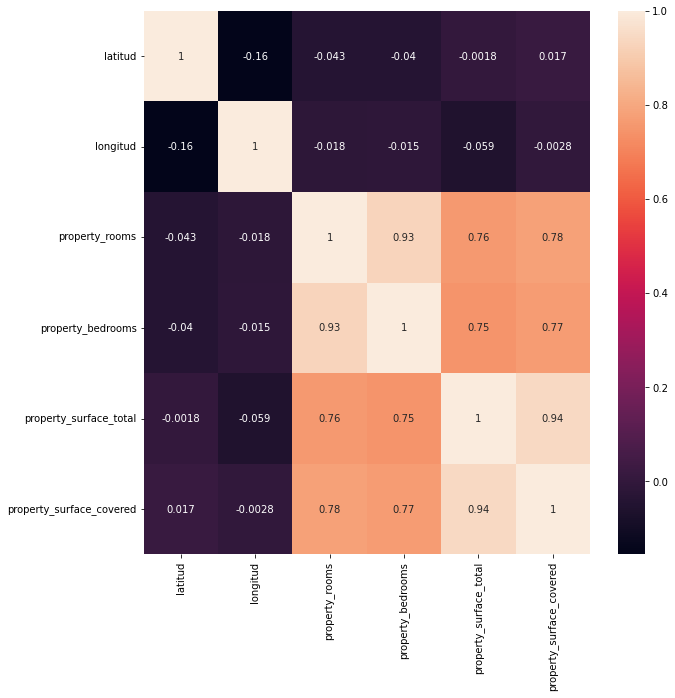

In [235]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

Como era de esperarse, podemos ver que existe una correlación muy fuerte entre property_surface_total y property_surface_covered y entre property_rooms y property_bedrooms

Ahora si comenzamos con PCA y calculamos las componentes principales, elegimos el mismo número de variables que en el dataframe anterior

In [236]:
ds_reducido_normalizado.shape

(69536, 6)

In [237]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0     -1.340824 -1.640095  0.202979  0.043493 -0.215653  0.041282
1      1.224938 -0.137811 -0.754638  0.779767 -0.011576  0.167370
2      2.025211  0.396002  0.472740 -0.233899  0.141894  0.193336
3      0.087993 -1.458607  0.237523 -0.404169 -0.046446  0.079072
4      4.180181  0.059761  0.189384 -1.883704  0.455637  0.200692
...         ...       ...       ...       ...       ...       ...
69531 -1.611022  0.681109 -0.859732 -0.104282 -0.225302 -0.088284
69532  0.447889 -0.062086  1.110214  0.087781 -0.030819 -0.205328
69533 -1.824916 -0.026974 -0.130790  0.453282  0.368387  0.021522
69534  0.033072  0.748049 -0.816650 -0.349434 -0.049115  0.053592
69535  0.235809 -1.377570  0.049239 -0.256294 -0.042282  0.057563

[69536 rows x 6 columns]

In [238]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [239]:
varianza_explicada.cumsum()

array([0.57759666, 0.77067053, 0.91174119, 0.97893693, 0.99086087,
       1.        ])

Podemos ver que con 3 componentes llegamos a un 91% de la varianza, trataremos de ver esto en un gráfico

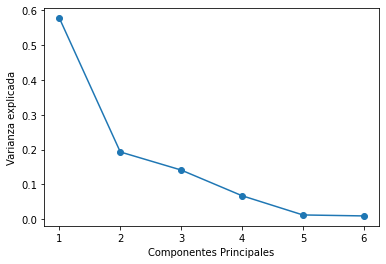

In [240]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

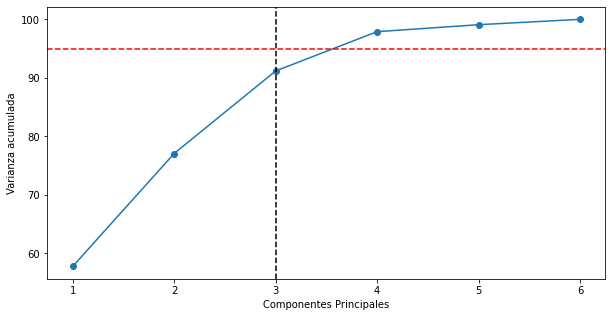

In [241]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

Con 3 componentes logramos explicar más del 90% de la varianza, por lo que nos quedaremos con esta reducción.

In [242]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0 -1.340824 -1.640095  0.202979
1  1.224938 -0.137811 -0.754638
2  2.025211  0.396002  0.472740
3  0.087993 -1.458607  0.237523
4  4.180181  0.059761  0.189384

## Agrupamiento

Importamos librerías de agrupamiento.

In [243]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from pyclustertend import hopkins

Para el analisis de agrupamiento incorporaremos el precio

In [244]:
ds_agrupamiento = ds_reducido.copy()
ds_agrupamiento['property_price'] = ds_train.property_price
ds_agrupamiento

latitud   longitud  property_rooms  property_bedrooms  \
111540 -34.569243 -58.487512             2.0                1.0   
167194 -34.581909 -58.424620             3.0                2.0   
398794 -34.612366 -58.443922             4.0                3.0   
233796 -34.572798 -58.484835             3.0                2.0   
434905 -34.598315 -58.447165             6.0                5.0   
...           ...        ...             ...                ...   
162330 -34.592170 -58.398175             2.0                1.0   
301274 -34.615445 -58.470933             3.0                2.0   
378238 -34.593631 -58.435969             1.0                1.0   
257084 -34.594323 -58.399005             3.0                2.0   
96778  -34.571194 -58.477762             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  
111540                    45.0                      40.0        164000.0  
167194                   138.0                     129.0        550000.0  
398794                   127.0                     122.0        489000.0  
233796                    72.0                      67.0        180000.0  
434905                   140.0                     140.0        260000.0  
...                        ...                       ...             ...  
162330                    32.0                      27.0         95000.0  
301274                   107.0                      73.0        120000.0  
378238                    41.0                      37.0         86655.0  
257084                    68.0                      68.0        185000.0  
96778                     82.0                      74.0        178000.0  

[69536 rows x 7 columns]

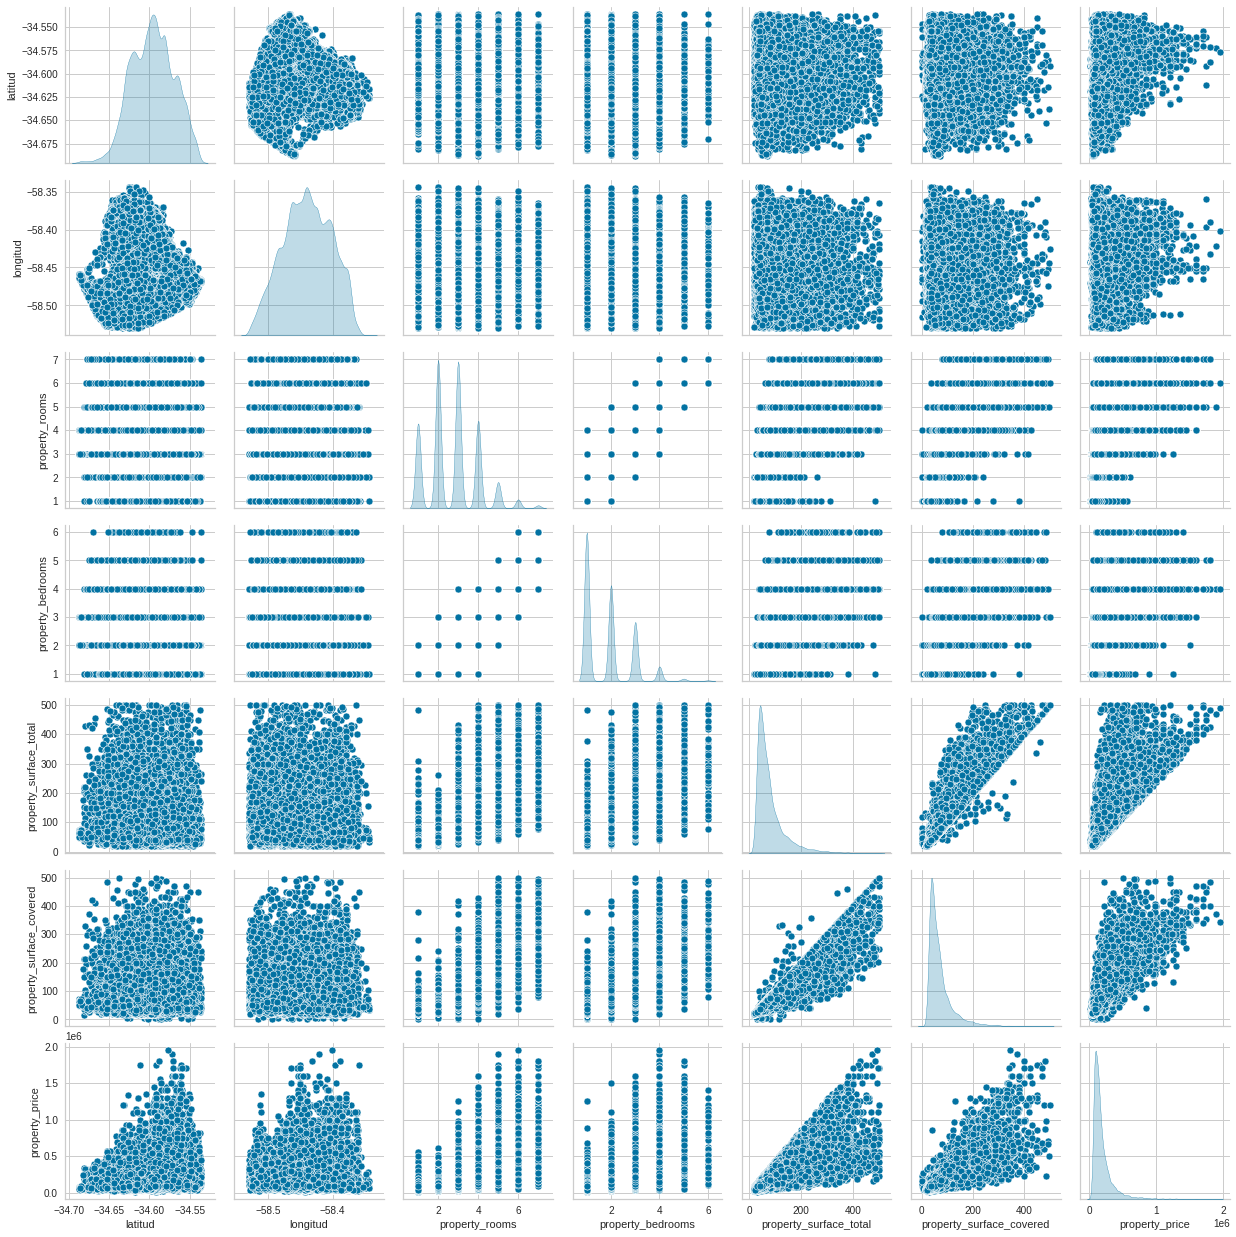

In [245]:
sns.pairplot(ds_agrupamiento, diag_kind='kde');

In [246]:
hopkins(ds_agrupamiento, ds_agrupamiento.shape[0])

0.0015522078342254638

Para la estadística de Hopkins, un valor cercano a cero indica que la distribución es bastante uniforme y que hay poca tendencia al clustering.

Si bien es dificil identificar agrupamientos en estos gráficos, probaremos buscarlos mediante el uso de KMeans

#### Método de Elbow

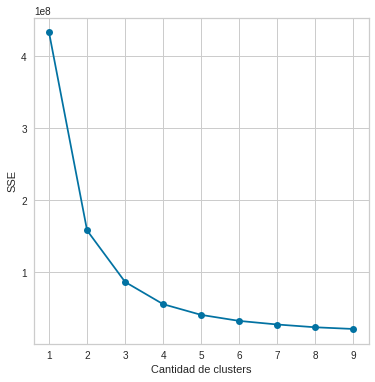

In [247]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_reducido)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos ver que para 2 o 3 clusters la pendiente cambia de forma bastante significativa. Probaremos predicciones con KMeans para esas cantidades.

#### KMeans

In [248]:
kmeans = KMeans(2, random_state=0)
kmeans.fit(ds_reducido)

y_2_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [249]:
y_2_clusters.value_counts()

0    60214
1     9322
Name: clusters, dtype: int64

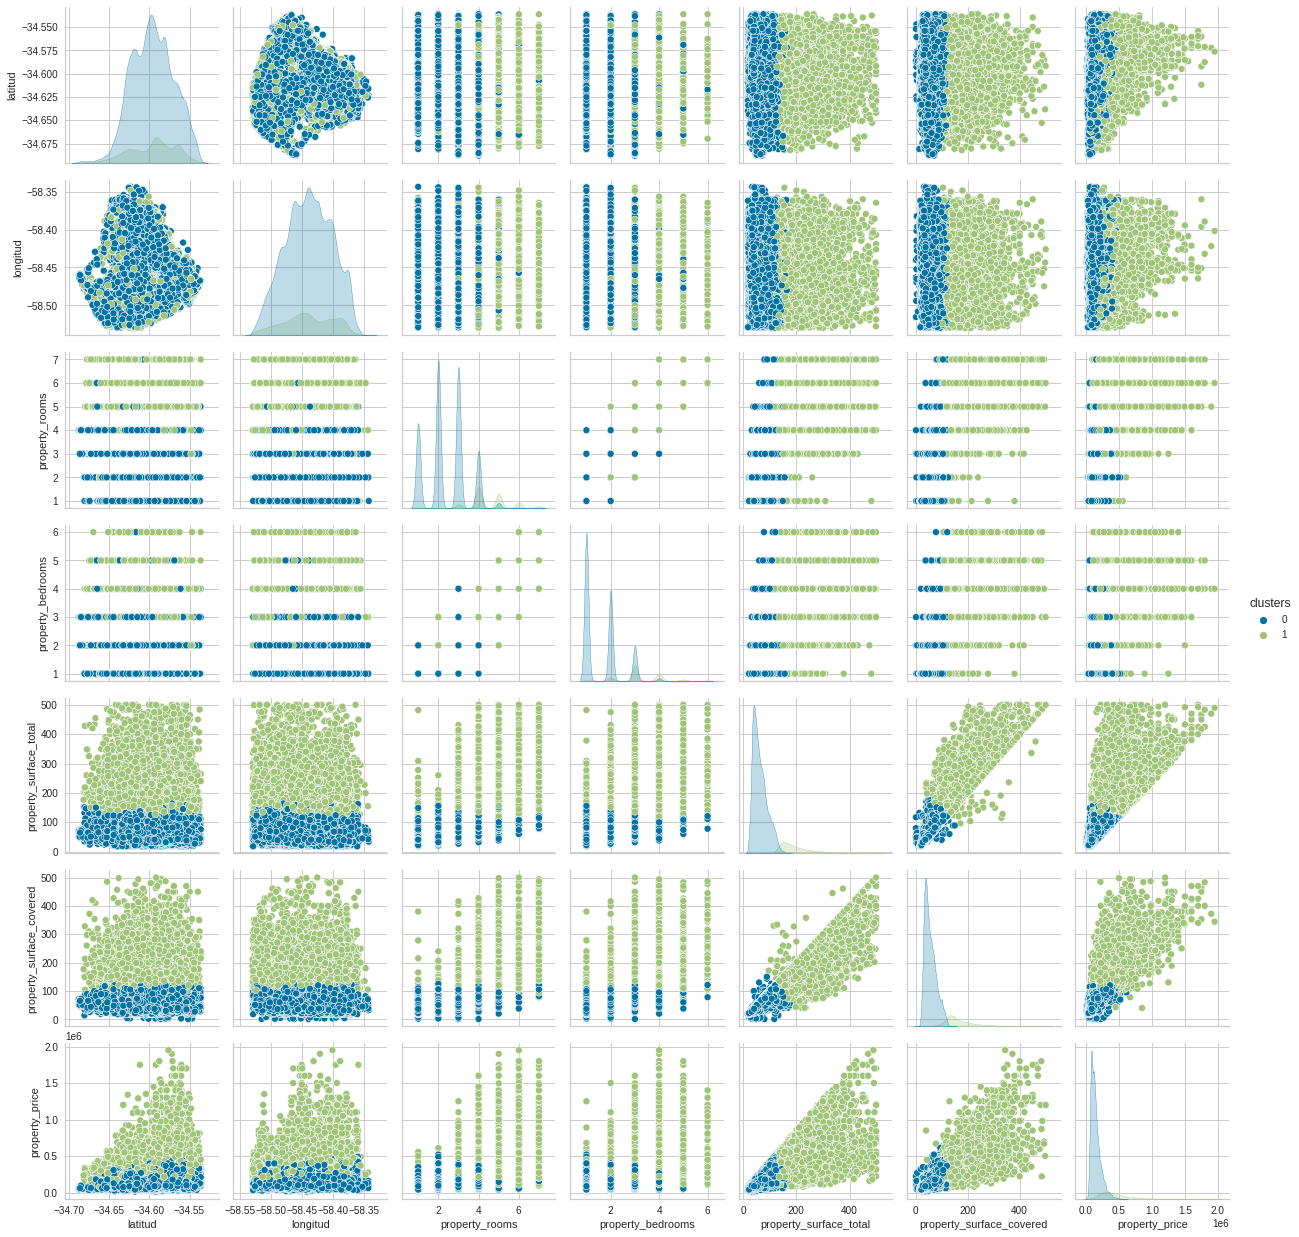

In [250]:
sns.pairplot(pd.concat([ds_agrupamiento, y_2_clusters], axis=1), hue='clusters');

In [251]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(ds_reducido)

y_3_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

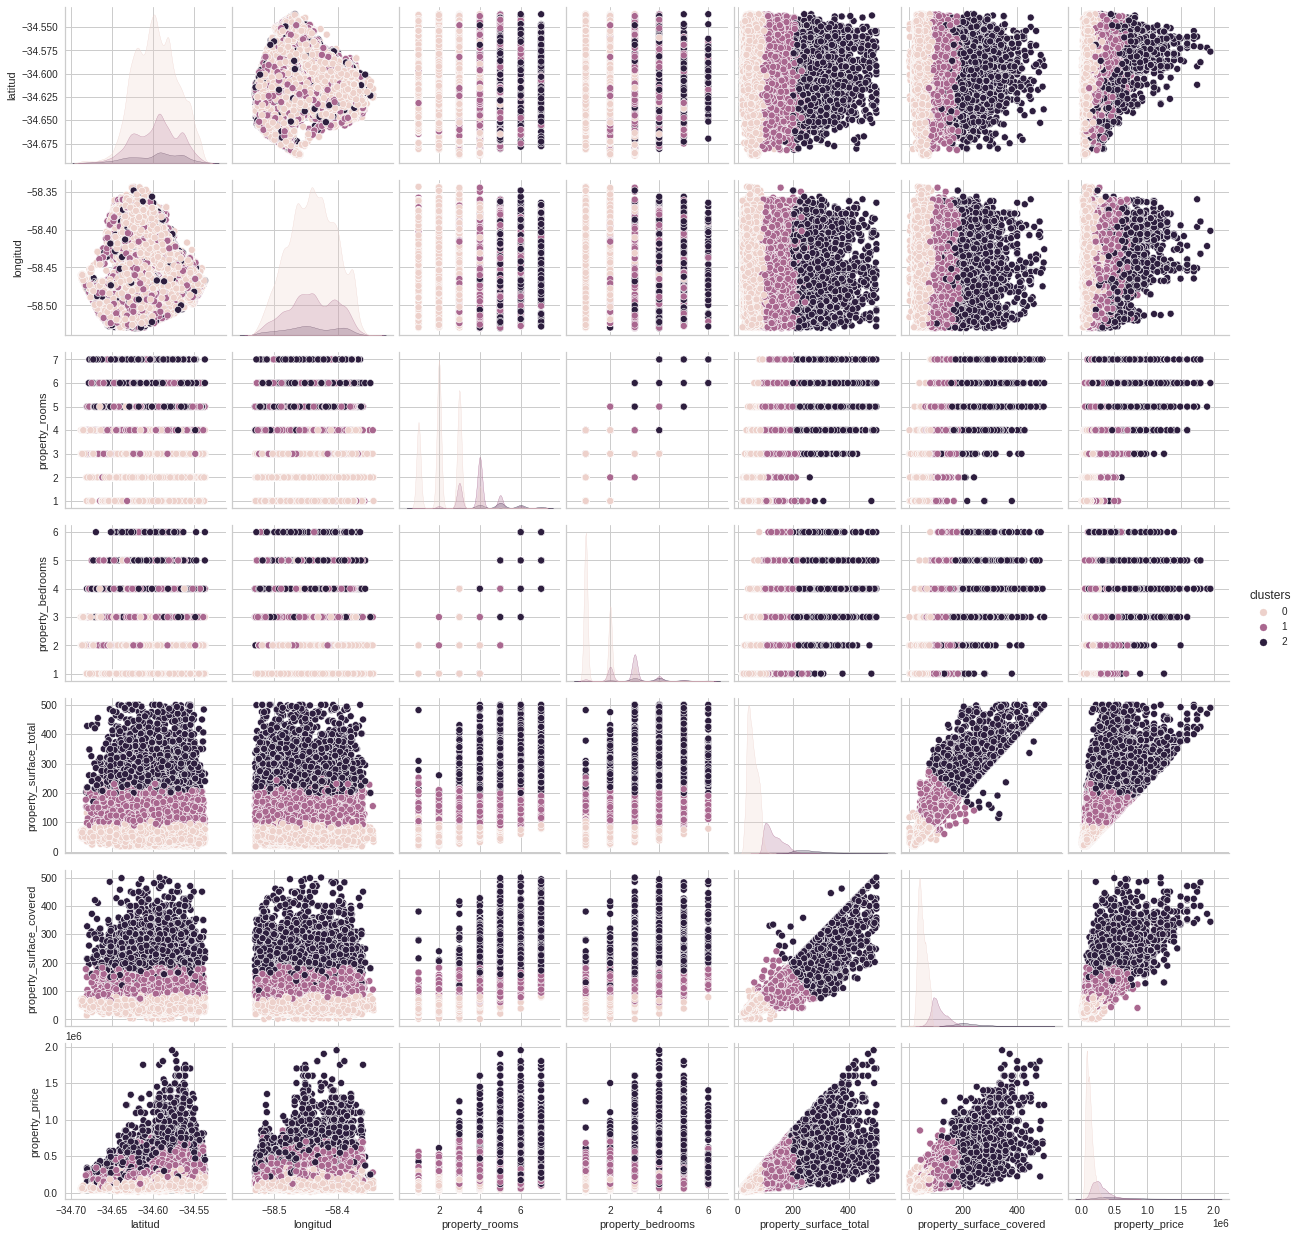

In [252]:
sns.pairplot(pd.concat([ds_agrupamiento, y_3_clusters], axis=1), hue='clusters');

Podemos ver como en varios de los graficos los datos se agrupan de la misma manera convirtiéndose en más caros a medida que crecen principialmente los ambientes y los metros cuadrados (superficie total y cubierta).

### Analisis de Silhouette

Realizaremos un analisis de Silhouette para evaluar la calidad de los clusters.

In [253]:
list_k = list(range(2, 5))
sse = []

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_agrupamiento)
    score = silhouette_score(ds_agrupamiento, preds)
    print(f"Para {n_clusters} el puntaje de Silhouette es " + str(score))

Para 2 el puntaje de Silhouette es 0.7430566149604713
Para 3 el puntaje de Silhouette es 0.657515979574838
Para 4 el puntaje de Silhouette es 0.6022115550697654


El mejor puntaje es el de 2 clusters. Cuanto más cerca de 1 mayor tendencia a agruparse. Evaluaremos la calidad de los clusters mediante el gráfico de silueta

#### Para 2 clusters

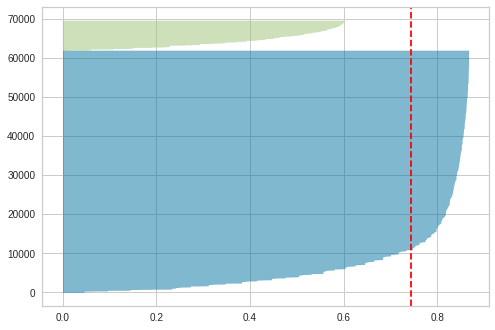

In [254]:
model = KMeans(2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(ds_agrupamiento)
plt.show()

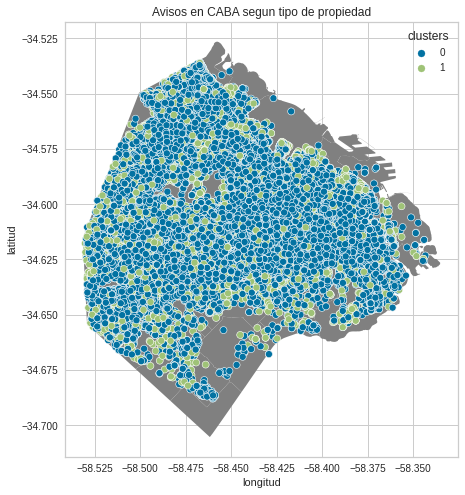

In [255]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_2_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

#### Para 3 clusters

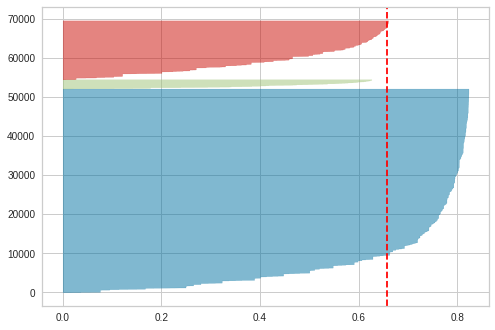

In [256]:
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')  # Instancio el visualizador
visualizer.fit(ds_agrupamiento)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_3_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

Luego de analizar los datos, vemos que en este dominio de problema se forman tres clusters a partir de la relacion de los ambientes y las habitaciones y la superifice total y cubierta. Es decir, vemos que se forman grupos con un precio acorde a a la cantidad de metros cuadrados que tenga la vivienda y a su vez, los metros cuadrados van a tener una estrecha correlacion con los metros cuadrados. Por ejemplo, dentro de un cluster podriamos encontrar un 2 ambientes con una habitacion de 70 metros cuadrados vendiendose a 70 usd.

## Clasificación

In [258]:
def precio_metro_cuadrado(dataset):
    pxm2 = dataset['property_price'] / dataset['property_surface_total']
    sorted_pxm2 = pxm2.sort_values(ascending=True)
    return (pxm2, sorted_pxm2)

(pxm2, sorted_pxm2) = precio_metro_cuadrado(ds_train)
pxm2.describe()

count    69536.000000
mean      2272.016660
std        693.448733
min        334.736842
25%       1791.666667
50%       2225.000000
75%       2708.333333
max       4278.846154
dtype: float64

Definiremos la variable tipo_precio con 3 valores posibles, alto, medio y bajo.

#### Primera variable (33% bajo, 33% medio, 33% alto)

La primera clasificación tiene que tener la misma cantidad de registros en las 3 diferentes categorias

In [259]:
def agregar_variable(dataset, categoria, nombre_categoria, pxm2, sorted_pxm2):
    nueva_categoria = pd.DataFrame()
    nueva_categoria['pxm2'] = sorted_pxm2
    nueva_categoria[nombre_categoria] = categoria
    dataset[nombre_categoria] = pxm2
    dataset[nombre_categoria] = nueva_categoria[nombre_categoria]
    return dataset

def imprimir_limites(dataset, categoria):
    valores_bajos = dataset[dataset[categoria]== 'Bajo']
    valores_medios = dataset[dataset[categoria] == 'Medio']
    valores_altos = dataset[dataset[categoria] == 'Alto']
    print(f'Minimo bajo: {valores_bajos.pxm2.min()}, Maximo bajo: {valores_bajos.pxm2.max()}')
    print(f'Minimo medio: {valores_medios.pxm2.min()}, Maximo medio: {valores_medios.pxm2.max()}')
    print(f'Minimo alto: {valores_altos.pxm2.min()}, Maximo alto: {valores_altos.pxm2.max()}')

In [260]:
ds_train['pxm2'] = pxm2
categoria = []
for i in range(0, len(sorted_pxm2) // 3):
    categoria.append('Bajo')
for i in range(len(sorted_pxm2) // 3, 2 * len(sorted_pxm2) // 3):
    categoria.append('Medio')
for i in range(2 * len(sorted_pxm2) // 3, len(sorted_pxm2)):
    categoria.append('Alto')

ds_train = agregar_variable(ds_train, categoria, 'clasificacion_1', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de la categoria 1'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

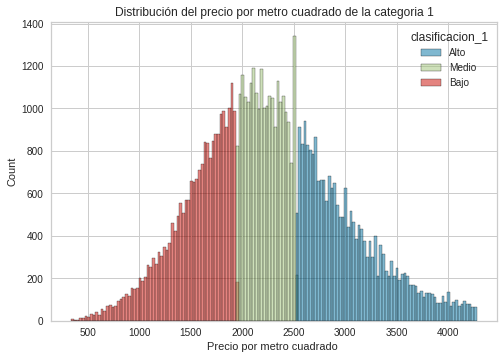

In [261]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_1, bins=150).set(title='Distribución del precio por metro cuadrado de la categoria 1', xlabel='Precio por metro cuadrado ')

In [262]:
ds_train.clasificacion_1.value_counts()

Alto     23179
Medio    23179
Bajo     23178
Name: clasificacion_1, dtype: int64

In [263]:
imprimir_limites(ds_train,'clasificacion_1')

Minimo bajo: 334.7368421052632, Maximo bajo: 1944.4444444444443
Minimo medio: 1944.4444444444443, Maximo medio: 2527.2727272727275
Minimo alto: 2527.2727272727275, Maximo alto: 4278.846153846154


#### Segunda variable (25% bajo, 50% medio, 25% alto)

In [264]:
def separar_25_50_25(dataset):
    categoria = []
    for i in range(0, len(dataset) // 4):
        categoria.append('Bajo')
    for i in range(len(dataset) // 4, 3 * len(dataset) // 4):
        categoria.append('Medio')
    for i in range(3 * len(dataset) // 4, len(dataset)):
        categoria.append('Alto')

    return categoria

In [265]:
categoria = separar_25_50_25(ds_train)
ds_train = agregar_variable(ds_train, categoria, 'clasificacion_2', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución de las categorías en relación al precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado'),
 Text(0, 0.5, 'Cantidad')]

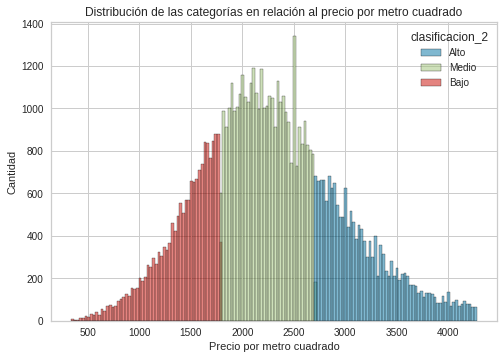

In [266]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_2, bins=150).set(title='Distribución de las categorías en relación al precio por metro cuadrado', xlabel='Precio por metro cuadrado', ylabel='Cantidad')

In [267]:
ds_train.clasificacion_2.value_counts()

Medio    34768
Alto     17384
Bajo     17384
Name: clasificacion_2, dtype: int64

In [268]:
imprimir_limites(ds_train, 'clasificacion_2')

Minimo bajo: 334.7368421052632, Maximo bajo: 1791.6666666666667
Minimo medio: 1791.6666666666667, Maximo medio: 2708.3333333333335
Minimo alto: 2708.3333333333335, Maximo alto: 4278.846153846154


#### Tercera variable (25-50-25 por tipo de propiedad)

##### Casas

In [269]:
casas = ds_train[ds_train.property_type == 'Casa'].copy()
dptos = ds_train[ds_train.property_type == 'Departamento'].copy()
phs = ds_train[ds_train.property_type == 'PH'].copy()

<AxesSubplot:xlabel='pxm2', ylabel='Count'>

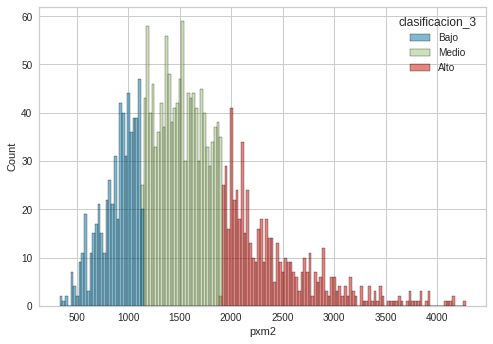

In [270]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(casas)
categoria = separar_25_50_25(casas)
casas = agregar_variable(casas, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=casas, x=casas.pxm2, hue=casas.clasificacion_3, bins=150)

##### Departamentos

<AxesSubplot:xlabel='pxm2', ylabel='Count'>

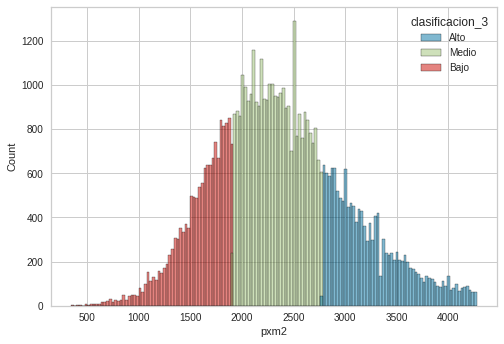

In [271]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(dptos)
categoria = separar_25_50_25(dptos)
dptos = agregar_variable(dptos, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de departamentos'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

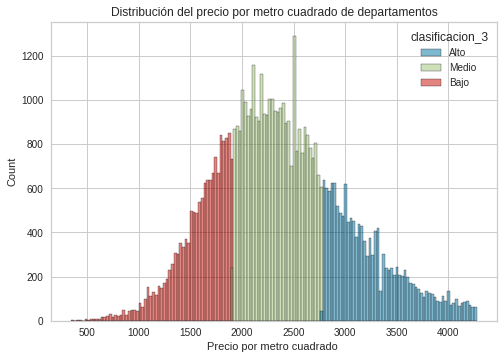

In [272]:
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de departamentos', xlabel='Precio por metro cuadrado ')

##### PH

<AxesSubplot:xlabel='pxm2', ylabel='Count'>

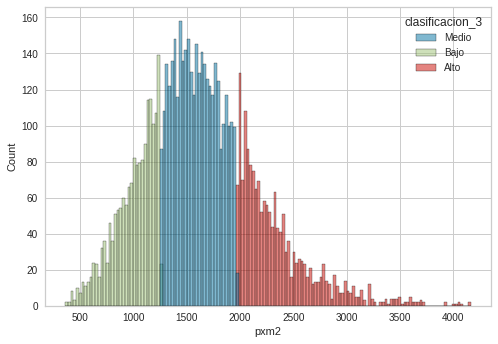

In [273]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(phs)
categoria = separar_25_50_25(phs)
phs = agregar_variable(phs, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de Phs'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

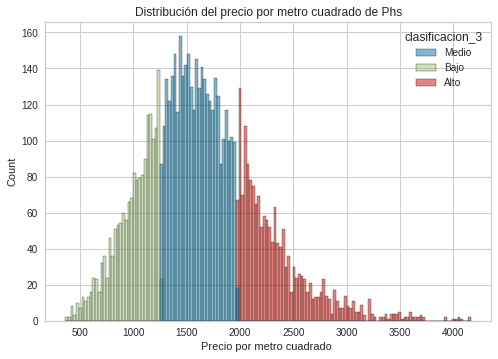

In [274]:
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de Phs', xlabel='Precio por metro cuadrado ')

##### Union de las 3 al dataset

In [275]:
nueva_categoria = pd.concat([casas,dptos, phs])
ds_train['clasificacion_3'] = nueva_categoria['clasificacion_3']

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de toda propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

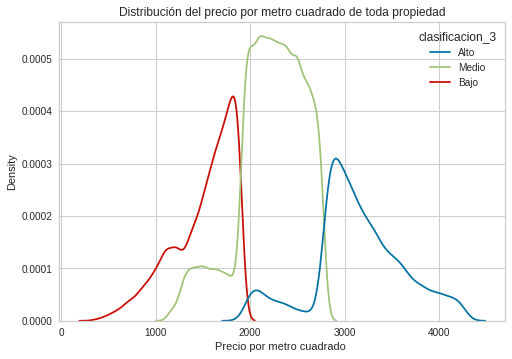

In [276]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_3).set(title='Distribución del precio por metro cuadrado de toda propiedad', xlabel='Precio por metro cuadrado ')

In [277]:
ds_train.clasificacion_3.value_counts()

Medio    34769
Alto     17385
Bajo     17382
Name: clasificacion_3, dtype: int64

##### Distribución del precio por metro cuadrado

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado de departamentos')]

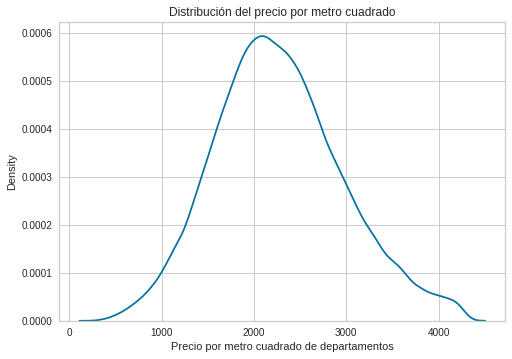

In [278]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2).set(title='Distribución del precio por metro cuadrado', xlabel='Precio por metro cuadrado de departamentos')

##### Distribución del precio por metro cuadrado por tipo de propiedad

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de cada tipo de propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

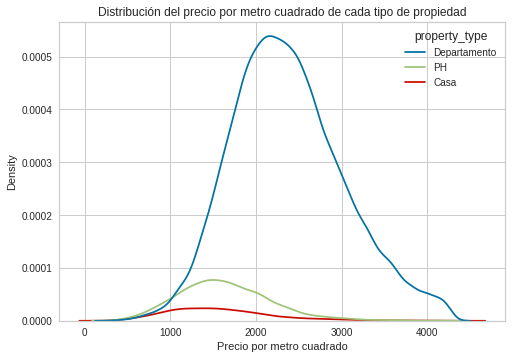

In [279]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.property_type).set(title='Distribución del precio por metro cuadrado de cada tipo de propiedad', xlabel='Precio por metro cuadrado')

#### Conclusión

Viendo como el precio por metro cuadrado de departamentos es mayor al de casas y phs tiene sentido el tomar la tercera variable por sobre las otras 2. Ya que caso contrario la categorización de las casas y phs se vería contaminada por el de los departamentos, ya que algunos casos de casas que serían caras por si mismas terminan siendo de precio medio ya que el mismo número para los
departamentos no es caro.

In [280]:
ds_train.drop(axis=1, columns=['clasificacion_1', 'clasificacion_2'], inplace=True)
ds_train.rename(columns= {'clasificacion_3':'tipo_precio'}, inplace=True)

#### Construccion de la variable en Test

In [281]:
ds_test['pxm2'] = ds_test['property_price'] / ds_test['property_surface_total']

In [282]:
lista_tipo_precio_test = []
for registro in ds_test.itertuples():
    #print(registro.Index)
    if registro.property_type == 'Casa':
        if registro.pxm2 < casas[casas['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > casas[casas['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'Departamento':
        if registro.pxm2 < dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'PH':
        if registro.pxm2 < phs[phs['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > phs[phs['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')




In [283]:
len(lista_tipo_precio_test)

16847

In [284]:
len(ds_test)

16847

In [285]:
ds_test['tipo_precio'] = pd.Series(data=lista_tipo_precio_test, name='tipo_precio', index=ds_test.index)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado en el dataset de testeo'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

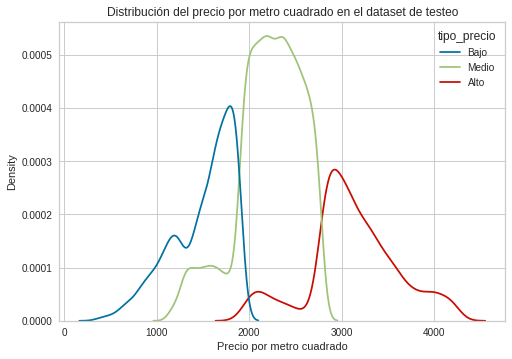

In [286]:
sns.kdeplot(data=ds_test, x=ds_test.pxm2, hue=ds_test.tipo_precio).set(title='Distribución del precio por metro cuadrado en el dataset de testeo', xlabel='Precio por metro cuadrado')

#### Comparación con los resultados de Kmeans

In [287]:
copia_3_clusters = y_3_clusters.copy()
copia_3_clusters.replace(to_replace=0, value='Medio', inplace= True)
copia_3_clusters.replace(to_replace=1, value='Bajo', inplace= True)
copia_3_clusters.replace(to_replace=2, value='Alto', inplace= True)
ds_comparacion = pd.concat([ds_train, copia_3_clusters], axis=1)
print(f"Porcentaje de semejanza de clusters: {round(len(np.where(ds_comparacion.tipo_precio == ds_comparacion.clusters)[0]) / len(ds_comparacion) * 100, 2)} %")

Porcentaje de semejanza de clusters: 45.42 %


In [288]:
y_3_clusters.value_counts()

0    50801
1    15187
2     3548
Name: clusters, dtype: int64

Vemos que el porcentaje no parece ser lo suficientemente alto (Tomando el cluster más chico como el 'Alto', el más grande como el 'Medio' y como bajo el tercero, siendo esta la combinación que mejor porcentaje de semejanza da con 45,9 %) como para intuir que están relacionados los clusters.
Vamos a recrear uno de los gráficos hechos arriba de precio total contra superficie esta vez coloreando la clasificación de precio en vez a ver si los graficos se parecen.

[Text(0.5, 1.0, 'Analisis del tipo de precio en relacion al precio total y la superficie'),
 Text(0.5, 0, 'Superficie total'),
 Text(0, 0.5, 'Precio de la propiedad')]

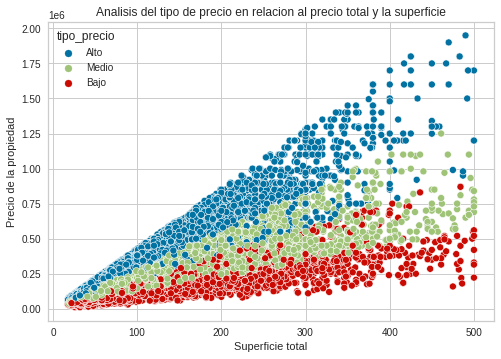

In [289]:
sns.scatterplot(data=ds_train, x=ds_train.property_surface_total, y=ds_train.property_price, hue=ds_train.tipo_precio).set(title='Analisis del tipo de precio en relacion al precio total y la superficie', xlabel='Superficie total', ylabel= 'Precio de la propiedad')

En efecto comparando el gráfico de tipo_precio con el de clusters de superficie total contra precio vemos que se tratan de 2 clasificaciones diferentes

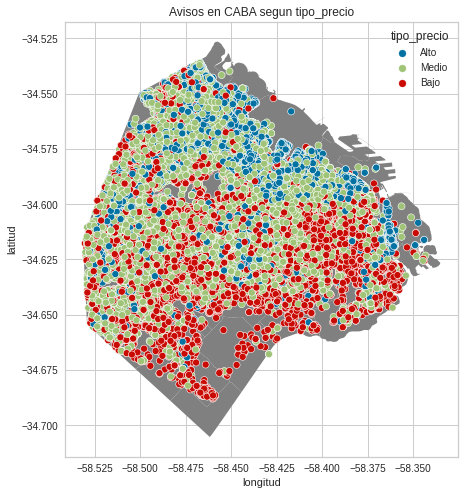

In [290]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=ds_train['tipo_precio'])

ax.set(title='Avisos en CABA segun tipo_precio')
plt.show()

## Arbol de Decision - Clasificacion

In [291]:
#One hot encoding para variables categoricas
ds_train_copy = ds_train.copy()
ds_train_copy = pd.get_dummies(ds_train_copy, columns=['place_l3', 'property_type'])
ds_train_copy.head()

start_date   end_date    latitud   longitud  property_rooms  \
111540 2021-10-19 2022-04-20 -34.569243 -58.487512             2.0   
167194 2021-04-30 2021-06-05 -34.581909 -58.424620             3.0   
398794 2021-02-13 2021-03-01 -34.612366 -58.443922             4.0   
233796 2021-03-20 2021-04-16 -34.572798 -58.484835             3.0   
434905 2021-08-25 2021-09-17 -34.598315 -58.447165             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
111540                1.0                    45.0                      40.0   
167194                2.0                   138.0                     129.0   
398794                3.0                   127.0                     122.0   
233796                2.0                    72.0                      67.0   
434905                5.0                   140.0                     140.0   

        property_price                                     property_title  \
111540        164000.0                       Departamento - Villa Urquiza   
167194        550000.0                       Departamento - Palermo Chico   
398794        489000.0         Torre Pileta Tenis Gym Amenities Caballito   
233796        180000.0  VENTA DEPTO 3 AMB BALCON ,AMENITIES VILLA URQUIZA   
434905        260000.0                 PH entrada independiente y terraza   

        ...  place_l3_Villa Pueyrredón place_l3_Villa Real  \
111540  ...                          0                   0   
167194  ...                          0                   0   
398794  ...                          0                   0   
233796  ...                          0                   0   
434905  ...                          0                   0   

        place_l3_Villa Riachuelo  place_l3_Villa Santa Rita  \
111540                         0                          0   
167194                         0                          0   
398794                         0                          0   
233796                         0                          0   
434905                         0                          0   

        place_l3_Villa Soldati  place_l3_Villa Urquiza  \
111540                       0                       1   
167194                       0                       0   
398794                       0                       0   
233796                       0                       1   
434905                       0                       0   

        place_l3_Villa del Parque  property_type_Casa  \
111540                          0                   0   
167194                          0                   0   
398794                          0                   0   
233796                          0                   0   
434905                          0                   0   

        property_type_Departamento  property_type_PH  
111540                           1                 0  
167194                           1                 0  
398794                           1                 0  
233796                           1                 0  
434905                           0                 1  

[5 rows x 72 columns]

In [292]:
#Creo un dataset con los features que voy a usar para clasificar
ds_train_x = ds_train_copy.drop(['property_price', 'start_date', 'end_date', 'property_title', 'pxm2', 'tipo_precio'], axis='columns', inplace=False)

#Creo un dataset con la variable target
#ds_train_y = ds_train_copy['tipo_precio_Bajo'].copy()
#ds_train_y = ds_train_copy['tipo_precio_Medio'].copy()
#ds_train_y = ds_train_copy['tipo_precio_Alto'].copy()

ds_train_y = pd.Series(pd.factorize(ds_train_copy.tipo_precio)[0], index=ds_train_copy.index)

#Genero los conjuntos de train y de test
#proporcion 80/20
x_train, x_test, y_train, y_test = train_test_split(ds_train_x, ds_train_y, test_size=0.2, random_state=2) #semilla

In [293]:
#Creo un clasificador
tree_model = tree.DecisionTreeClassifier(max_depth = 10)

#Entreno el modelo
model = tree_model.fit(X = x_train, y = y_train)
y_train

170939    2
30660     0
186761    2
439415    1
120663    2
         ..
371533    1
385415    2
404796    1
206120    0
236647    2
Length: 55628, dtype: int64

In [294]:
#Creamos un clasificador con hiperparámetros 
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 10, 
                                         min_samples_leaf=10) 
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [295]:
#Realizamos una predicción sobre el set de test
y_test_pred = model.predict(x_test)
#Valores Predichos
y_test_pred

array([2, 1, 1, ..., 1, 1, 1])

In [296]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_test_pred),columns=['test','pred'])
ds_resultados.head()

test  pred
0     1     2
1     2     1
2     1     1
3     2     2
4     2     1

Text(51.0, 0.5, 'True')

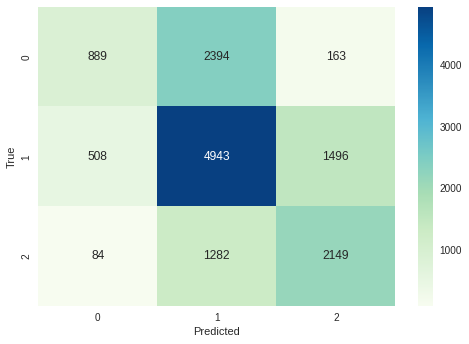

In [297]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_test_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [298]:
#Calculo las métricas en el conjunto de evaluación

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.60      0.26      0.36      3446
           1       0.57      0.71      0.64      6947
           2       0.56      0.61      0.59      3515

    accuracy                           0.57     13908
   macro avg       0.58      0.53      0.53     13908
weighted avg       0.58      0.57      0.55     13908



In [299]:
#Realizamos una predicción sobre el set de train
y_train_pred = model.predict(x_train)
#Valores Predichos          
        
print(classification_report(y_train, y_train_pred))
                            

              precision    recall  f1-score   support

           0       0.65      0.28      0.39     13939
           1       0.59      0.73      0.65     27822
           2       0.59      0.64      0.61     13867

    accuracy                           0.60     55628
   macro avg       0.61      0.55      0.55     55628
weighted avg       0.60      0.60      0.58     55628



In [300]:
model.classes_

array([0, 1, 2])

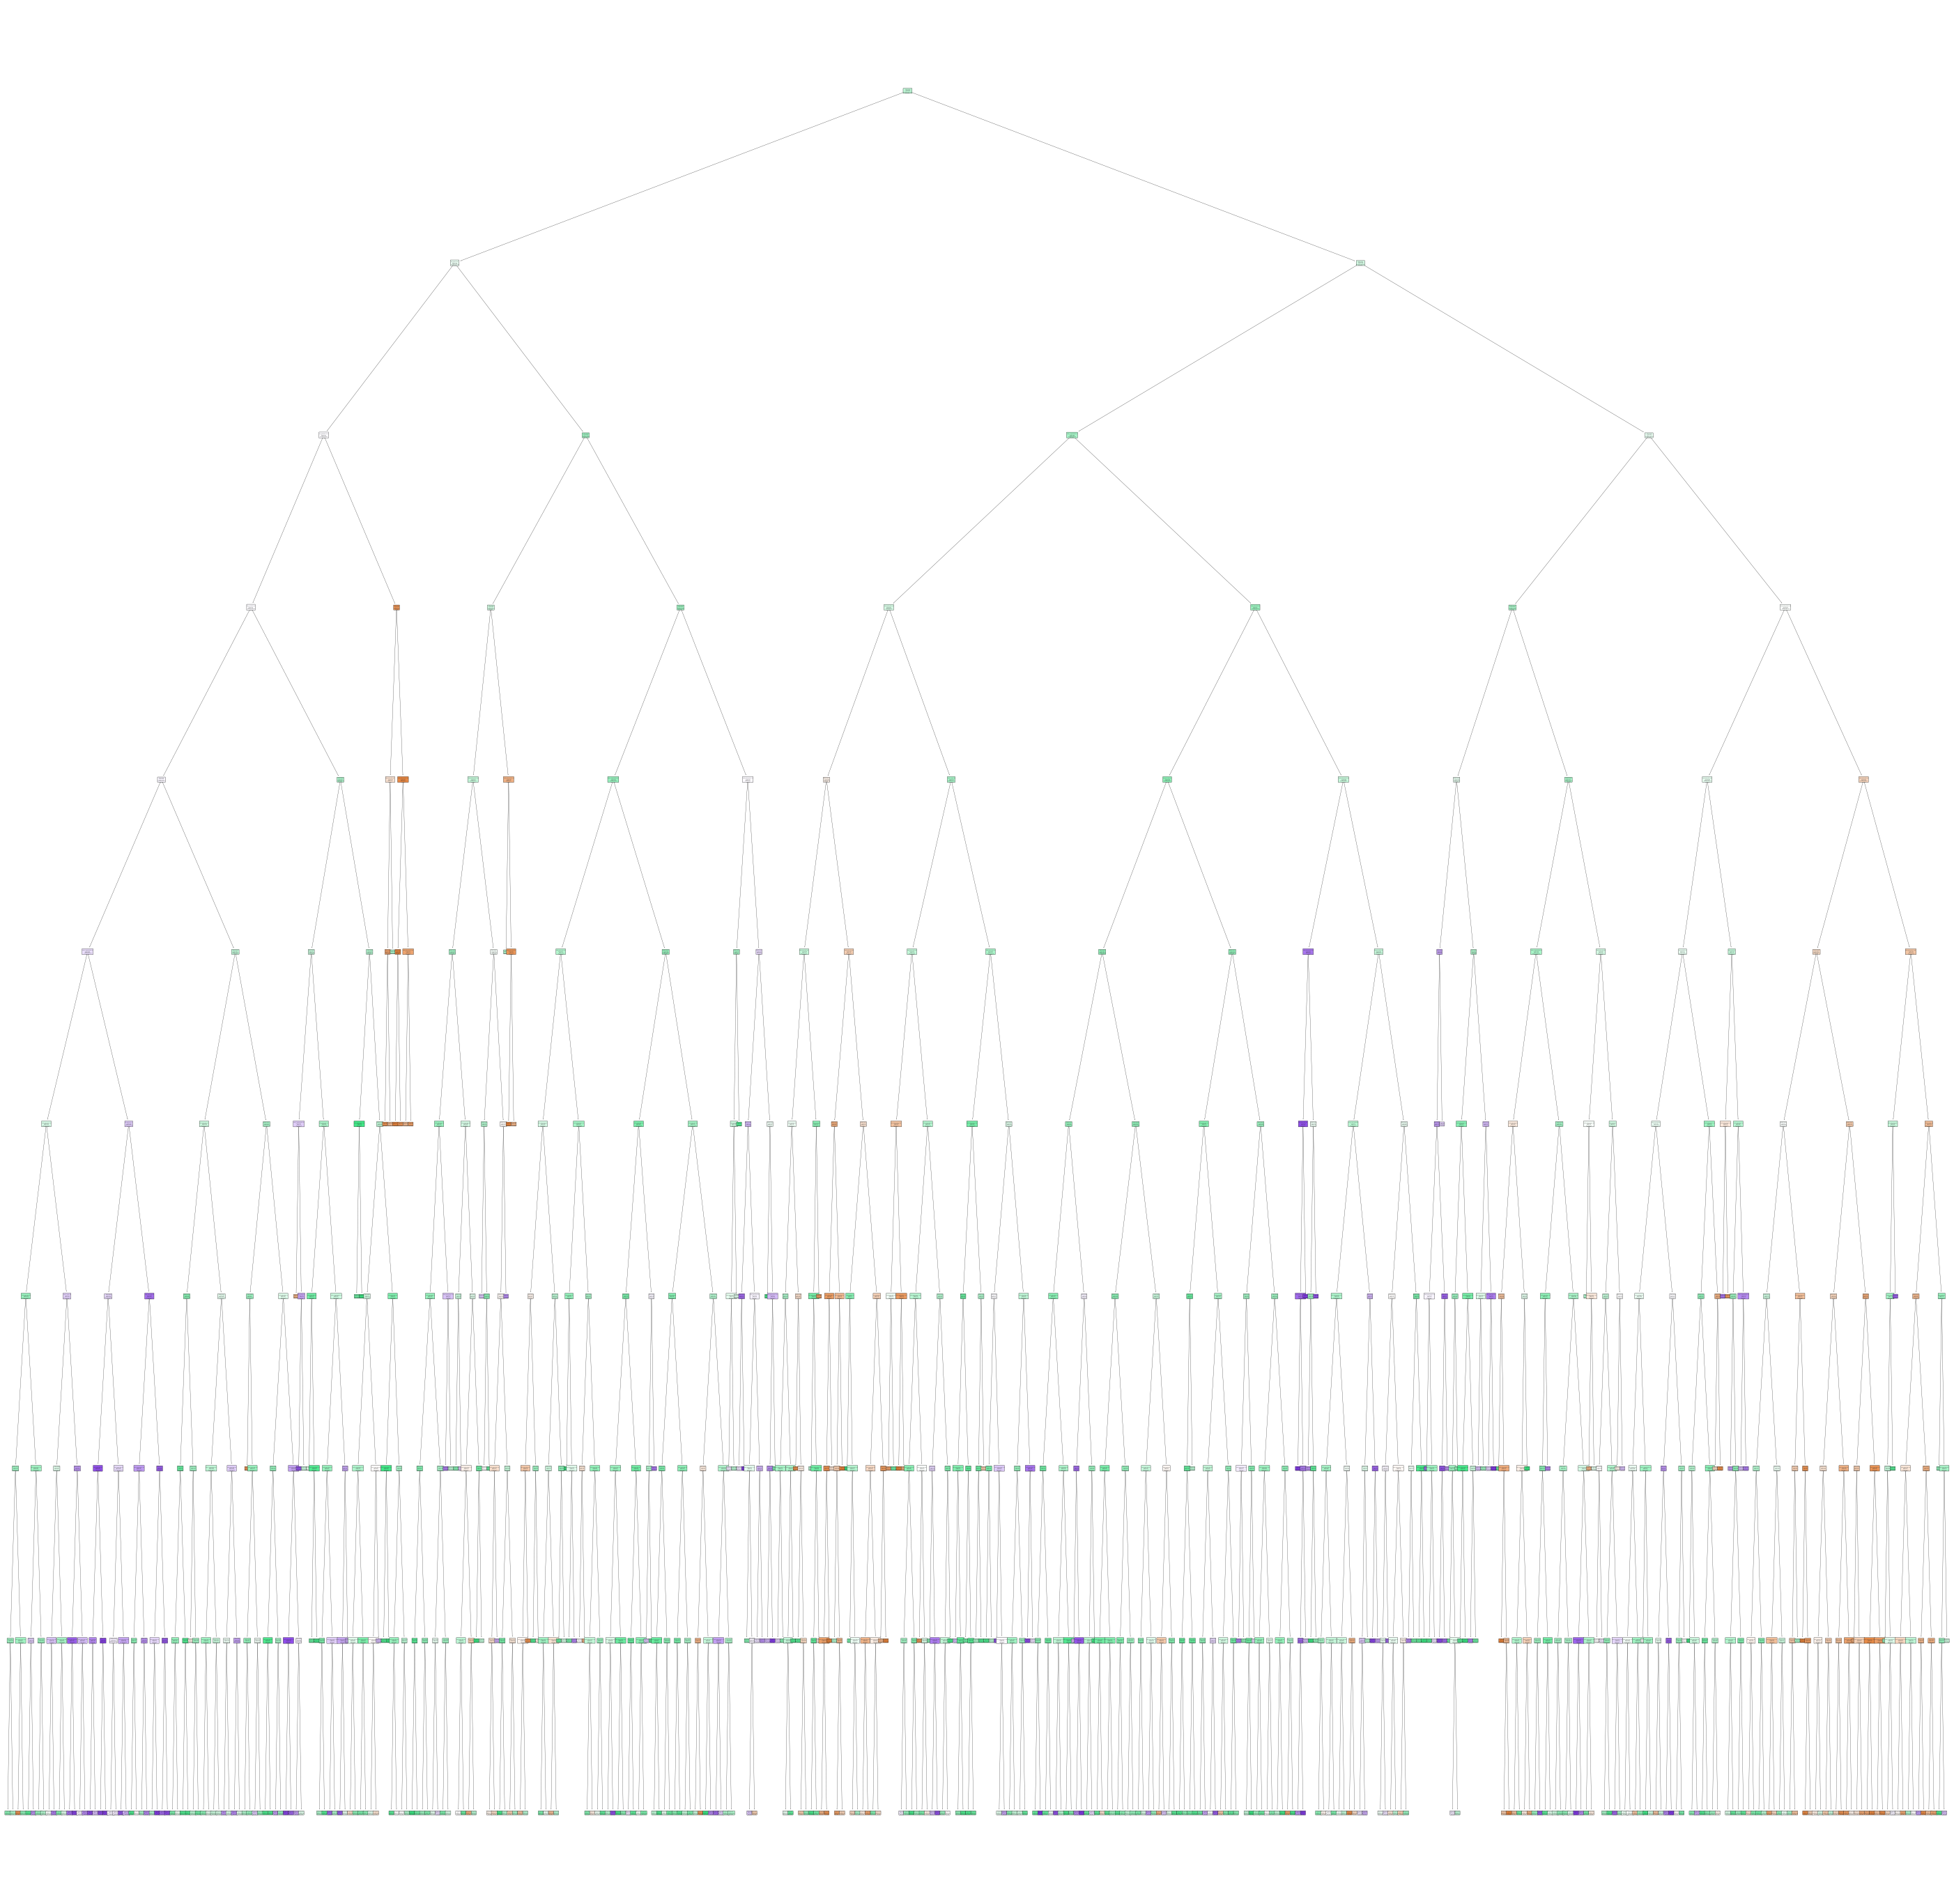

In [301]:
plt.figure(figsize=(50,50))

tree_plot_completo=tree.plot_tree(model,
                                 feature_names=ds_train_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['Bajo','Medio', 'Alto']) #model.classes_
plt.show(tree_plot_completo)

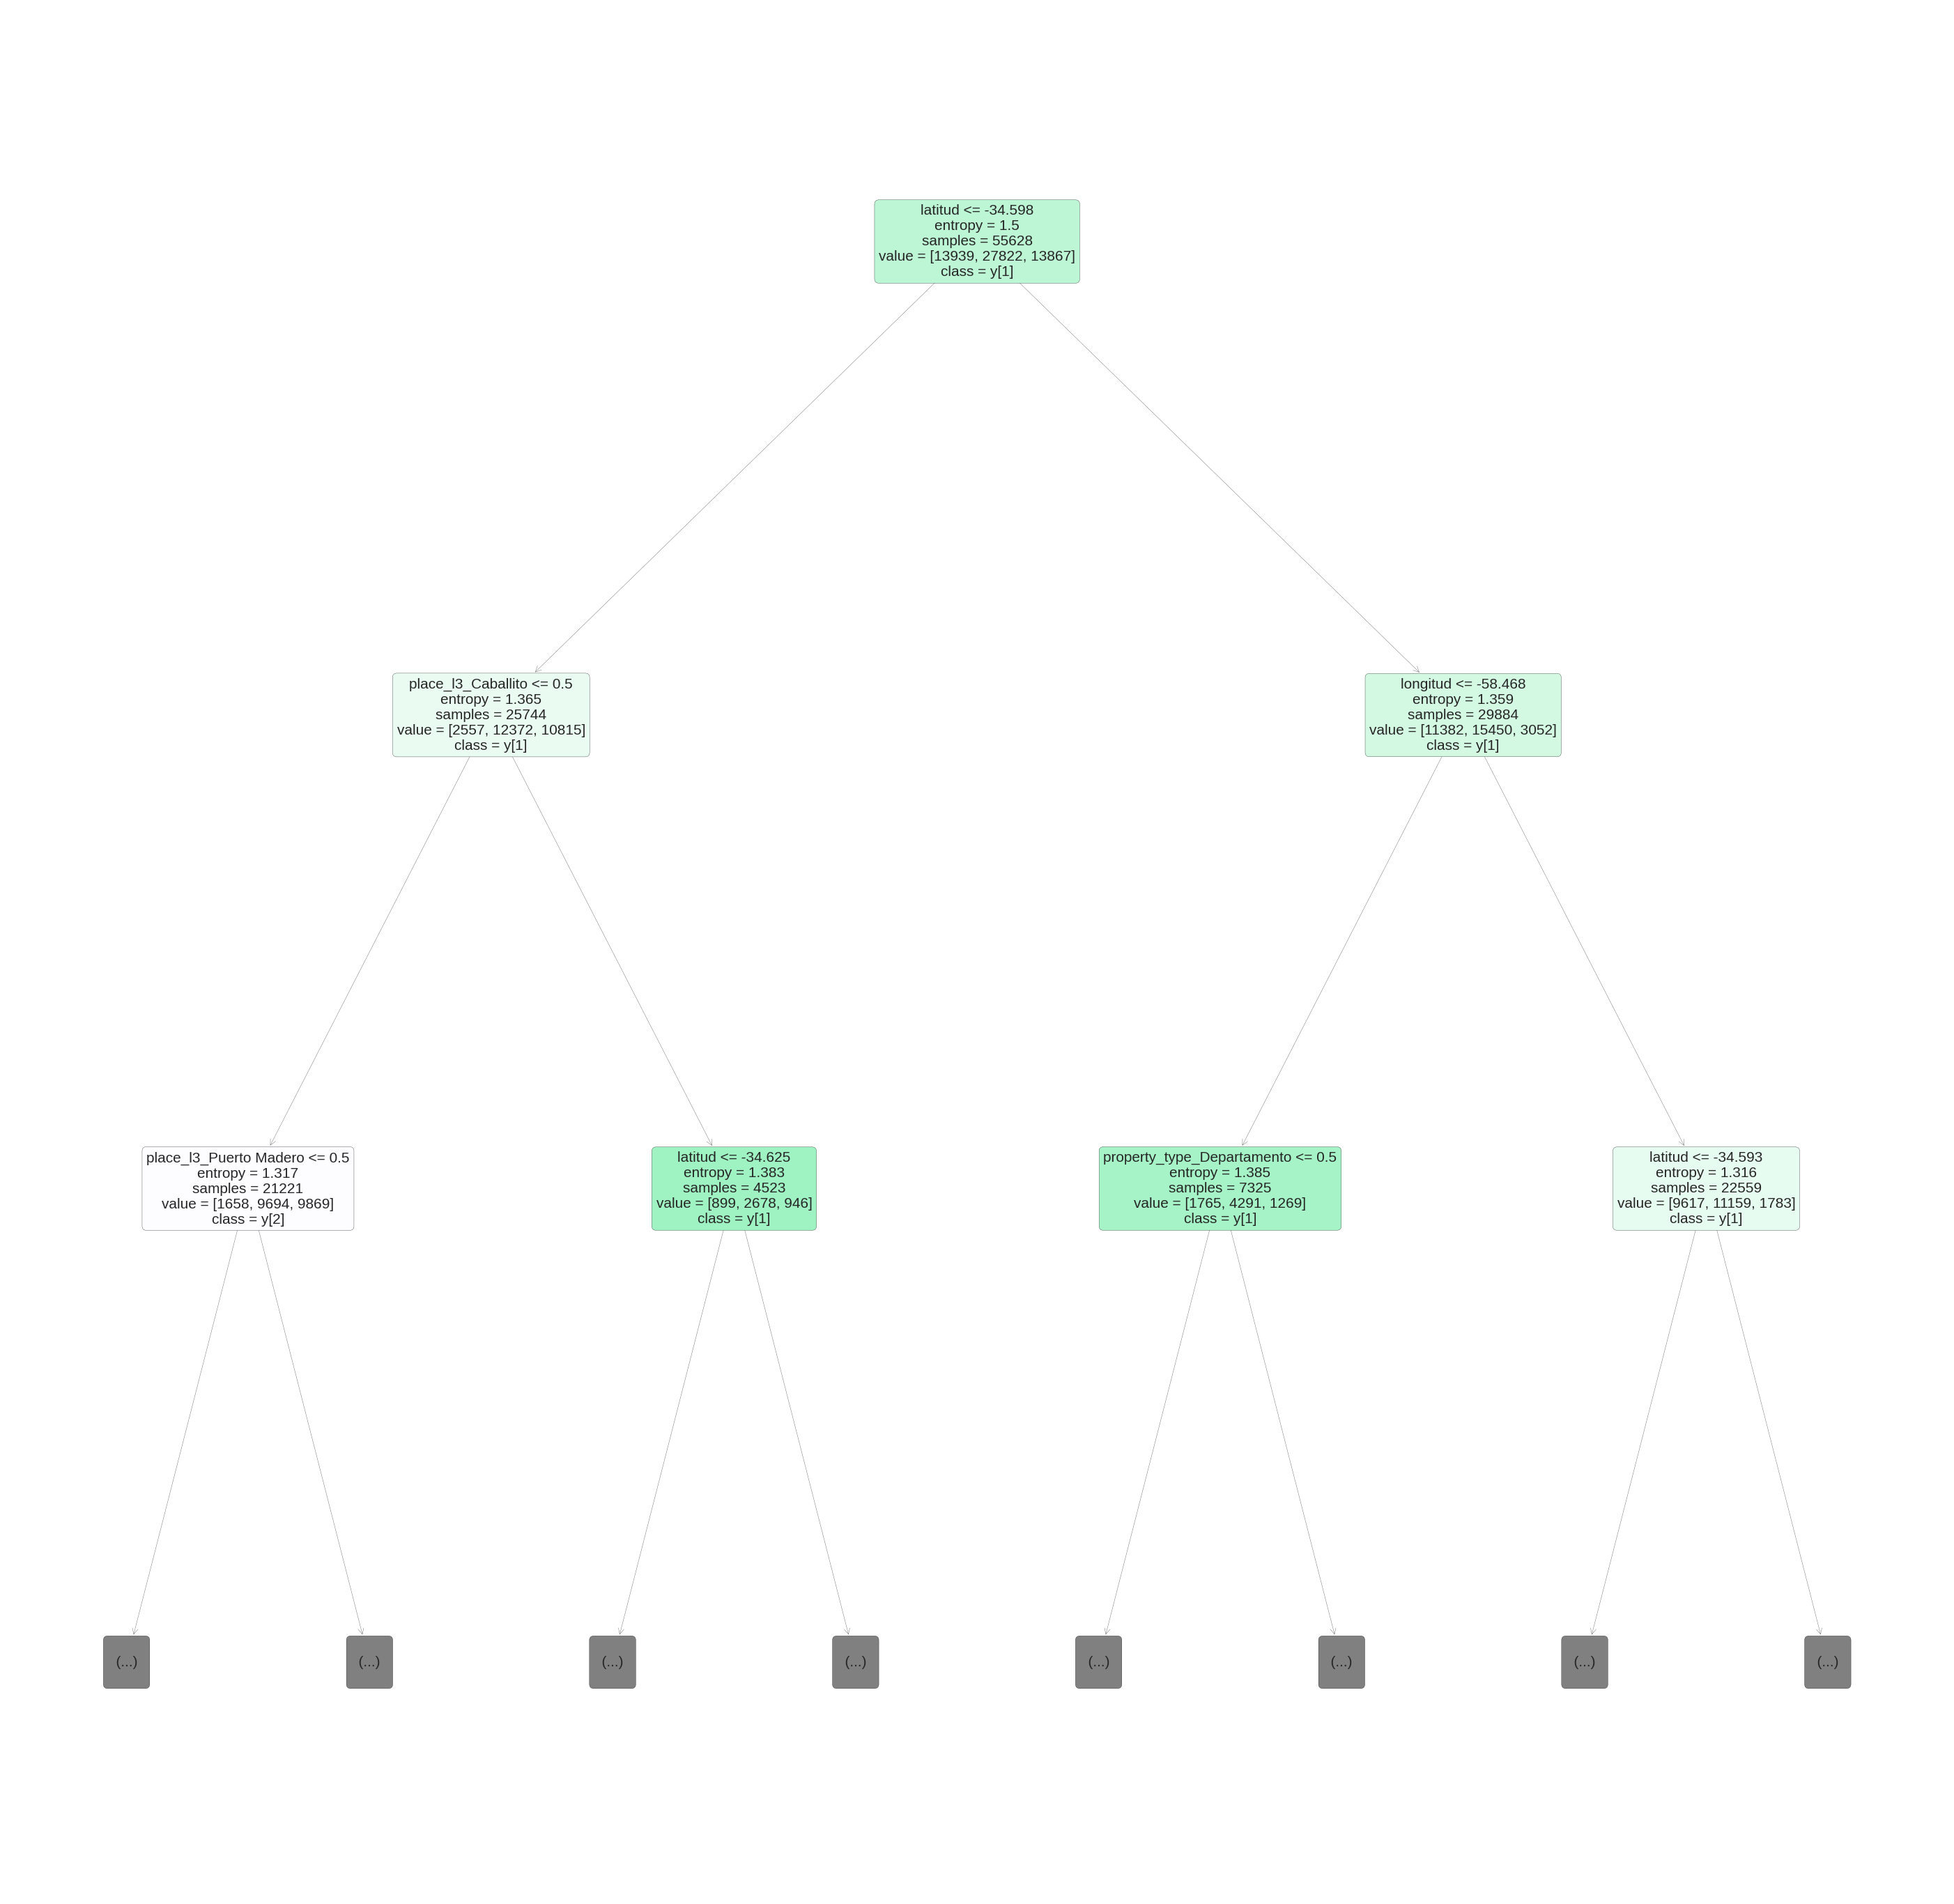

In [302]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

In [303]:
#viz = dtreeviz.dtreeviz(
#    model,
#    ds_trabajo_x,
#    ds_trabajo_y,
#    class_names=['Bajo','Medio'], 
#    title="Arbol de Decisión - Properati dataset",
#    target_name='tipo_precio',
#    feature_names=ds_train_x.columns.to_list(),
#    scale=1.5
#)

#display(viz)

In [304]:
features = ds_train_copy.columns
          
target = 'tipo_precio'

In [305]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=10 

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,6))}
                
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);

#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

In [306]:
randomcv.cv_results_['mean_test_score']

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [307]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps, features)):
  if feat_imp > 0:
    print('{}: {}'.format(feat,feat_imp))

place_l3_Villa Riachuelo: 0.01245328628813368
property_rooms: 0.023746859629044745
property_bedrooms: 0.035430788158837836
place_l3_Parque Centenario: 0.041080535833317285
place_l3_Balvanera: 0.08351076768635675
end_date: 0.11244412735212551
start_date: 0.6913336350521841


Exportamos el modelo

In [339]:
from joblib import dump
dump(model, 'modelos/arbol-decision.joblib')

['modelos/arbol-decision.joblib']

## Random Forest - Clasificacion


In [308]:
def indice_mayor(array):
    max = 0
    for i in range(len(array)):
        if array[max] < array[i]:
            max = i

    return max


param_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [2, 4, 8, 16],
               "n_estimators": [20, 50, 100]}

kfold = KFold(n_splits=5)
base_tree = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)
gs = RandomizedSearchCV(estimator=base_tree, param_distributions = param_grid, scoring='accuracy', cv=kfold, n_iter=10)

gs.fit(X=ds_reducido, y=ds_train.tipo_precio);
mejores_parametros = gs.best_params_
print(mejores_parametros)
print(gs.best_score_)

{'n_estimators': 20, 'min_samples_split': 8, 'min_samples_leaf': 1, 'criterion': 'entropy'}
0.6956541170744756


In [309]:
arbol = RandomForestClassifier().set_params(**mejores_parametros)
results = cross_validate(estimator=arbol, X=ds_reducido, y=ds_train.tipo_precio, cv=5, n_jobs=-1, return_estimator=True)
mejor_arbol = results['estimator'][indice_mayor(results['test_score'])]

##### Importancia de atributos

Esta lista ya nos da información interesante. Termina siendo bastante más importante la localización de la vivienda para el modelo que su superficie. Y concretamente la latitud parece ser más relevante que la lognitud. Mientras que la cantidad de habitaciones y baños no terminan siendo muy relevantes.

In [310]:
sorted(list(zip(ds_reducido.columns.to_list(), mejor_arbol.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.3689335322969494),
 ('longitud', 0.2680373320223226),
 ('property_surface_total', 0.1656383630264785),
 ('property_surface_covered', 0.1531380567846563),
 ('property_rooms', 0.02739992134467451),
 ('property_bedrooms', 0.016852794524918644)]

##### Gráfico de un arbol

Vemos como para el arbol 17 su criterio principal es la longitud. De ser menor a 58.409 se fija si la superficie cubierta aes menor a 99.5 metros cuadrados, caso contrario en la primera condición se fija si la superficie total es menor a 108.5 metros cuadrados. Así hasta llegar a una hoja que indique si se trata de una propiedad de precio bajo, medio o alto.

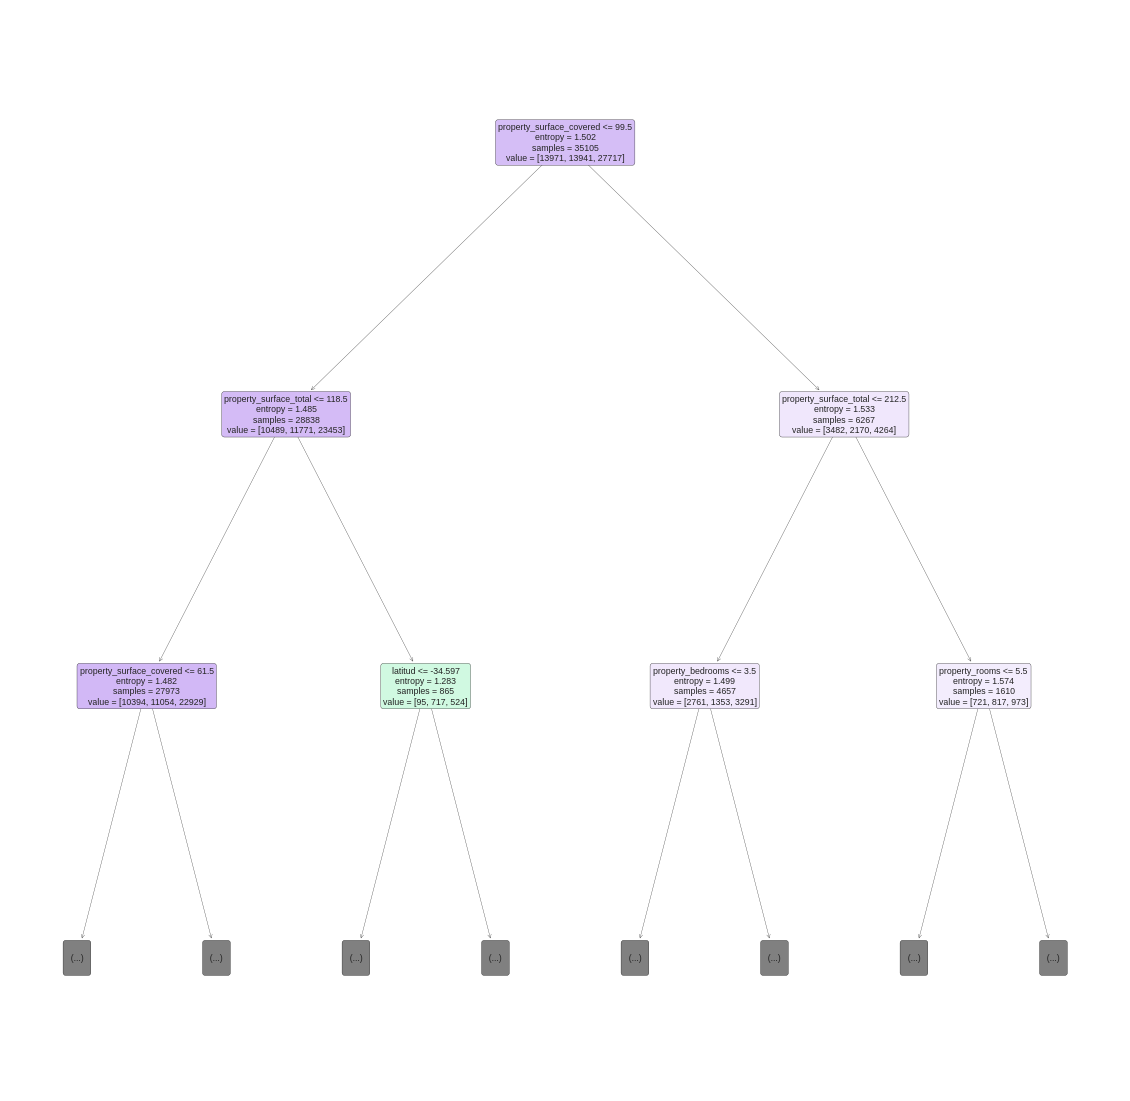

In [311]:
from sklearn import tree
plt.figure(figsize=(20, 20))
tree_plot_=tree.plot_tree(mejor_arbol.estimators_[17], feature_names=ds_reducido.columns.to_list(), filled=True, rounded=True, max_depth= 2)
plt.show(tree_plot_)

##### Evaluación de performance con test

In [312]:
target = ds_test.tipo_precio
ds_test_reducido = ds_test.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'tipo_precio', 'pxm2'], axis=1)

In [313]:
predicted = mejor_arbol.predict(ds_test_reducido)

Text(51.0, 0.5, 'True')

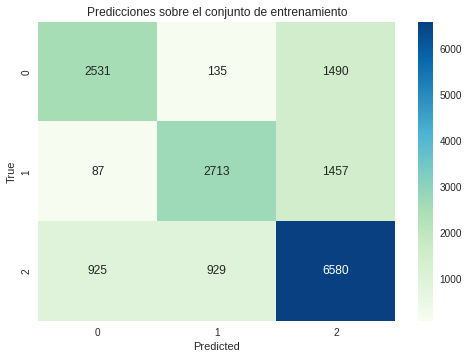

In [314]:
from sklearn.metrics import confusion_matrix


ds_resultados = pd.DataFrame(zip(target, predicted), columns=['test', 'pred'])
tabla = confusion_matrix(target, predicted)
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g', ).set(title='Predicciones sobre el conjunto de entrenamiento')
plt.xlabel('Predicted')
plt.ylabel('True')

In [315]:
from sklearn.metrics import classification_report

metrics = classification_report(target, predicted)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.71      0.61      0.66      4156
        Bajo       0.72      0.64      0.68      4257
       Medio       0.69      0.78      0.73      8434

    accuracy                           0.70     16847
   macro avg       0.71      0.68      0.69     16847
weighted avg       0.70      0.70      0.70     16847



###### Métricas con el dataset de train

In [316]:
predicted = mejor_arbol.predict(ds_reducido)
metrics = classification_report(ds_train.tipo_precio, predicted)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.90      0.81      0.85     17385
        Bajo       0.89      0.83      0.86     17382
       Medio       0.85      0.92      0.88     34769

    accuracy                           0.87     69536
   macro avg       0.88      0.85      0.86     69536
weighted avg       0.87      0.87      0.87     69536



Notamos como el modelo está overfitteando

In [340]:
dump(mejor_arbol, 'modelos/random-forest.joblib')

['modelos/random-forest.joblib']

## Regresion Logistica - Clasificacion

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score, accuracy_score


from yellowbrick.classifier import ROCAUC

Entrenamos un regresor con nuestro dataset reducido y cross validation en 5 folds.

In [318]:
ds_test.tipo_precio

270851     Bajo
257246    Medio
18279      Bajo
459363     Alto
254139    Medio
          ...  
401402     Alto
370810     Bajo
231088    Medio
444308    Medio
206002     Bajo
Name: tipo_precio, Length: 16847, dtype: object

In [319]:
estimator = LogisticRegression(random_state=0, multi_class='multinomial').fit(ds_reducido_normalizado, ds_train_y)
preds = estimator.predict(ds_reducido_normalizado)


accuracy_score(ds_train_y, preds)

0.5383110906580764

In [320]:
estimator_pca = LogisticRegression(random_state=0, multi_class='multinomial').fit(ds_pca, ds_train_y)
preds_pca = estimator_pca.predict(ds_pca)

accuracy_score(ds_train_y, preds_pca)

0.5261591118269673

Evaluaremos los parámetros que podemos mejorar

In [321]:
print(classification_report(pred, ds_train_y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      3250
           0       0.00      0.00      0.00         0
           1       0.96      0.50      0.66     66286
           2       0.00      0.00      0.00         0

    accuracy                           0.48     69536
   macro avg       0.24      0.13      0.17     69536
weighted avg       0.92      0.48      0.63     69536



Buscaremos hiperparámetros mediante random search

Como usamos el dataset de PCA, debemos aplicar el mismo PCA al ds de test.

Podemos ver que el score de test es similar al de train. Sin embargo, ninguno de los dos es un buen puntaje

Test score: 0.53
Cohen Kappa score: 0.14


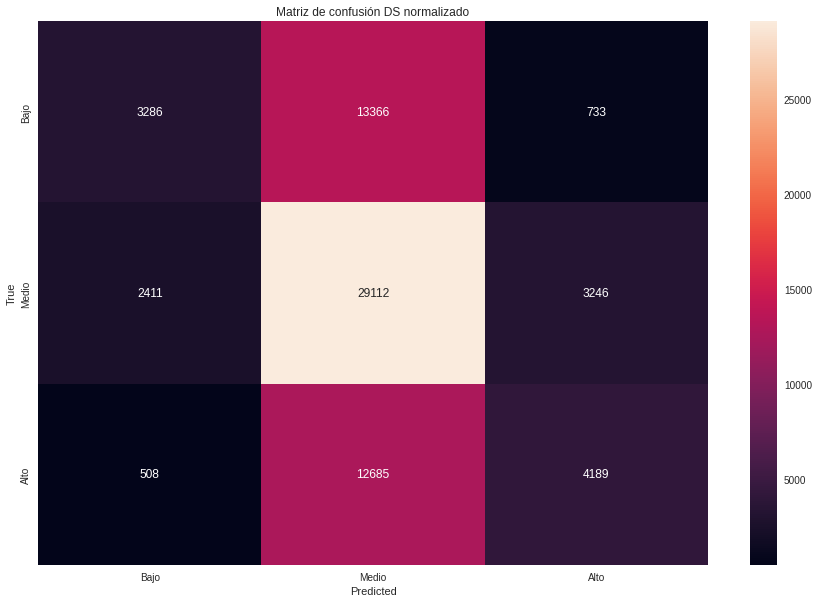

In [322]:
print("Test score: {:.2f}".format(accuracy_score(ds_train_y, preds_pca)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(ds_train_y, preds_pca)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(ds_train_y, preds_pca),annot=True, fmt='g')
ax = ax.set(xlabel='Predicted',ylabel='True',title='Matriz de confusión DS normalizado',
            xticklabels=(['Bajo', 'Medio', 'Alto']),
            yticklabels=(['Bajo', 'Medio', 'Alto']))

Test score: 0.53
Cohen Kappa score: 0.14


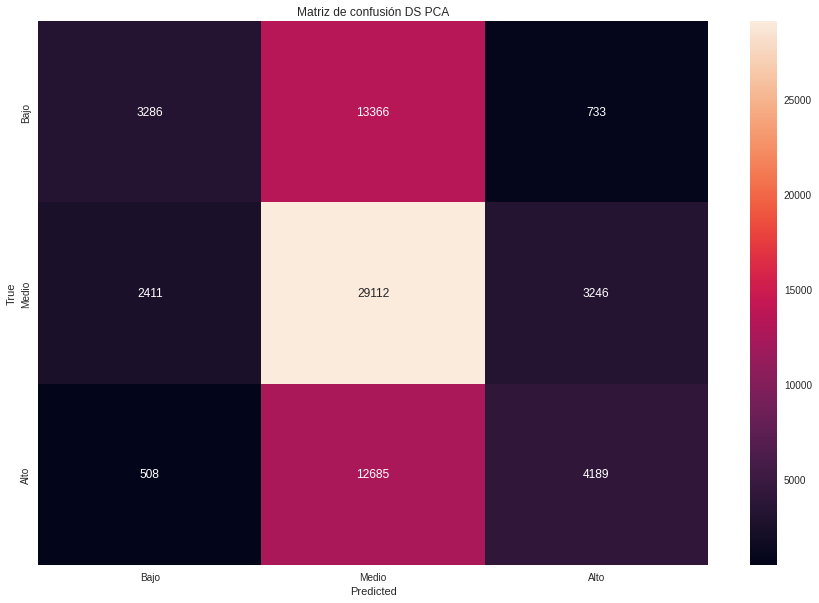

In [323]:
print("Test score: {:.2f}".format(accuracy_score(ds_train_y, preds_pca)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(ds_train_y, preds_pca)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(ds_train_y, preds_pca),annot=True, fmt='g')
ax = ax.set(xlabel='Predicted',ylabel='True',title='Matriz de confusión DS PCA',
            xticklabels=(['Bajo', 'Medio', 'Alto']),
            yticklabels=(['Bajo', 'Medio', 'Alto']))

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades? - Responder Despues

In [341]:
dump(estimator, 'modelos/regresion-logistica.joblib')

['modelos/regresion-logistica.joblib']

## KNN - Regresión

In [324]:
# Heatmap de correlacion
ds_train.corr().style.background_gradient(cmap='coolwarm')

In [325]:
X_train = ds_reducido
X_test = ds_test.drop(columns=['start_date', 'end_date', 'place_l3', 'property_type', 'property_title', 'property_price', 'pxm2', 'tipo_precio'], axis=1)
Y_train = ds_train.property_price
Y_test = ds_test.property_price

[Text(0.5, 0, 'Variable')]

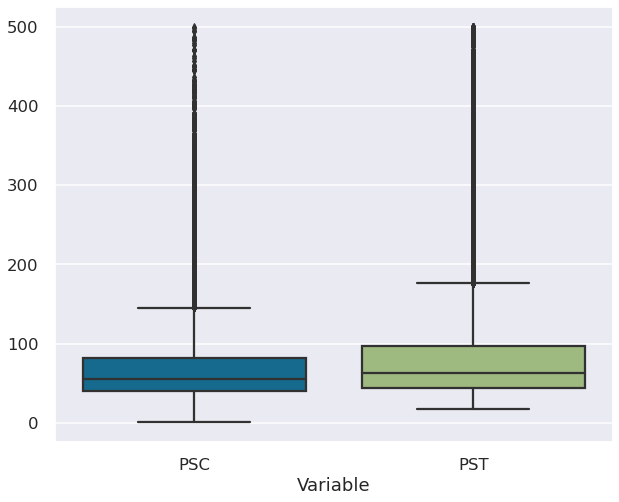

In [326]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables = []
valores = []

variables = ['PSC']*len(list(X_train.property_surface_covered)) + ['PST']*len(list(X_train.property_surface_total))

valores = list(X_train.property_surface_covered) + list(X_train.property_surface_total)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

In [327]:
# Medidas train
X_train.describe().T

count       mean        std        min        25%  \
latitud                   69536.0 -34.596122   0.026047 -34.687956 -34.616012   
longitud                  69536.0 -58.440018   0.037284 -58.530391 -58.466585   
property_rooms            69536.0   2.720864   1.229453   1.000000   2.000000   
property_bedrooms         69536.0   1.835553   0.938817   1.000000   1.000000   
property_surface_total    69536.0  82.179217  60.888207  18.000000  44.000000   
property_surface_covered  69536.0  71.039677  50.181175   1.000000  40.000000   

                                50%        75%         max  
latitud                  -34.595977 -34.577634  -34.535964  
longitud                 -58.440045 -58.410981  -58.343239  
property_rooms             3.000000   3.000000    7.000000  
property_bedrooms          2.000000   2.000000    6.000000  
property_surface_total    63.000000  97.000000  500.000000  
property_surface_covered  55.000000  82.000000  500.000000

In [328]:
#Calculo los cuantiles
x_q3, x_q1 = np.percentile(X_train.property_surface_total, [75 ,25])
y_q3, y_q1 = np.percentile(X_train.property_surface_covered, [75 ,25])

#Calculo el rango intercuartil
iqr_x = x_q3 - x_q1
iqr_y = y_q3 - y_q1

In [329]:
# Elimino outliers de la variable 'property_surface_total'
X_train = X_train.query(' property_surface_total >= (@x_q1 - @iqr_x*1.5) & property_surface_total <= (@x_q3 + @iqr_x*1.5) ')
Y_train = Y_train[X_train.index]

# Elimino outliers de la variable 'property_surface_covered'
X_train = X_train.query(' property_surface_covered >= (@y_q1 - @iqr_y*1.5) & property_surface_covered <= (@y_q3 + @iqr_y*1.5) ')
Y_train = Y_train[X_train.index]

In [330]:
# Heatmap correlación
X_train.corr().style.background_gradient(cmap='coolwarm')

[Text(0.5, 0, 'Variable')]

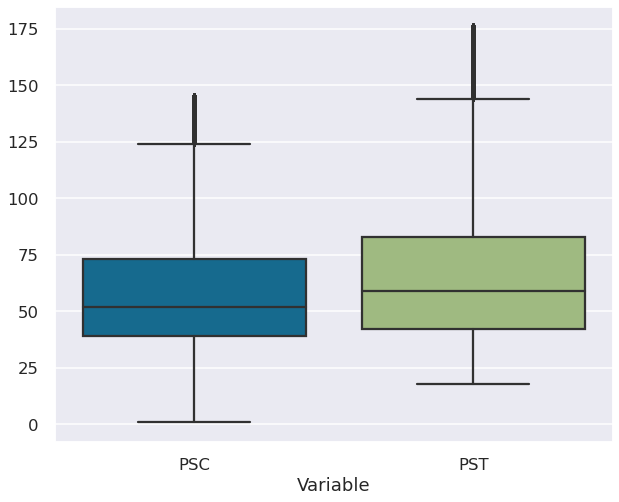

In [331]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables = []
valores = []

variables = ['PSC']*len(list(X_train.property_surface_covered)) + ['PST']*len(list(X_train.property_surface_total))

valores = list(X_train.property_surface_covered) + list(X_train.property_surface_total)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

<AxesSubplot:xlabel='property_surface_covered', ylabel='property_price'>

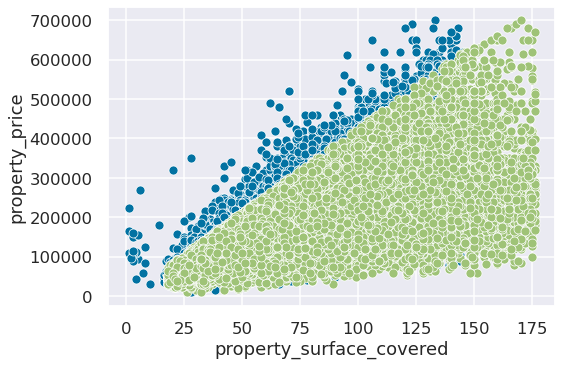

In [332]:
sns.scatterplot(x=X_train.property_surface_covered,y=Y_train)
sns.scatterplot(x=X_train.property_surface_total,y=Y_train)

In [333]:
# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().fit(X_train, Y_train)

#Hago una predicción
Y_pred=knn_regressor.predict(X_test)
Y_pred

array([159360. , 259600. , 112814. , ..., 225600. ,  79158.2, 250400. ])

In [334]:
# Performance
performance = pd.DataFrame({'Valor Real': Y_test, 'Prediccion': Y_pred, 'Error': Y_test - Y_pred})

# View
performance.head()

Valor Real  Prediccion    Error
270851     80000.0    159360.0 -79360.0
257246    225000.0    259600.0 -34600.0
18279      85000.0    112814.0 -27814.0
459363    112500.0    126000.0 -13500.0
254139    149000.0    162200.0 -13200.0

In [335]:
# Metricas para evaluar modelos
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = Y_test,
        y_pred  = Y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = Y_test,
        y_pred  = Y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 8935322096.069878
El error (rmse) de test es: 94526.8326776576


In [336]:
#Coef. de Determinación R2
score_knn = knn_regressor.score(X_test, Y_test)
score_knn

0.591833103619609

In [342]:
dump(knn_regressor, 'modelos/knn.joblib')

['modelos/knn.joblib']

## XGBoost - Regresión

## a elección - Regresión

¿Qué modelo elegirían para predecir el precio de venta de las propiedades? - Responder Despues

## Conclusiones

En primera instancia, queremos mencionar que una de las cosas que nos resultó mas interesante es poder entender mas el dominio de problema de la venta de propiedades.
Nosotros teníamos un conocimiento previo y mas intuitivo de este dominio pero hacer este trabajo nos sirvió para reafirmar conceptos sobre los cuales no teniamos datos veridicos como para realmente justificar.

Por ejemplo, suponiamos que habia algunos barrios de la capital que tenian precios mas caros que otros pero no sabiamos exactamente cuales eran esos barrios. 
Despues de terminado este analisis, notamos que Palermo (tal y como pensabamos) era uno de los barrios de CABA que tenia mas anuncios y varias publicaciones en venta.
Dicho sea de paso, este barrio tenia gran parte de sus propiedades mas caras que otros barrios en relacion a los mismos metros cuadrados.
Es decir, si tenemos dos departamentos de 70 m2 en Villa Santa Rita vs Palermo, notaremos que efectivamente el departamento de Palermo se impone en precio por sobre el departamento de Villa Santa Rita.
Tambien pudimos identificar como varian los precios dependiendo del tipo de vivienda que estemos analizando.
Serian mas caras las casas y los PHs que los departamentos a similar rango de m2 para un mismo barrio. Luego vemos como estas variables se alteran dependiendo de la zona, los m2 y otras variables.

Por otro lado, tambien pudimos desmitificar pensamientos que teniamos con lo que respecta a cantidad de anuncios de propiedades.
Barrios que pensabamos que quizas no era tan "populares" resultaban tener varias publicaciones con varios tipos de viviendas.

Algo que quisimos agregar mediante una imputacion es la distancia de las propiedades a la estacion de subte mas cercana para utilizarla como feature en base a uno de los datasets del gobierno de la ciudad. No tuvimos tiempo para hacerlo pero creemos que podria tener un valor agreagado.

Finalmente, no terminamos con todos los incisos requeridos para esta entrega, pero en los siguientes dias antes de llegar a la fecha de reentrega vamos a estar trabajando en ellos.